# NOPT PLOTS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import glob
import matplotlib as mpl
mpl.rcParams['figure.autolayout'] = True
import warnings; warnings.simplefilter('ignore')


## COLOR CODES

In [2]:
colors={'Tum-main-b': (0, 101, 189),'Tum-main-W': (255, 255, 255),
'Tum-main-K': (0, 0, 0),
'Tum-sec-db': (0, 82, 147),
'Tum-sec-b': (100, 160, 200),
'Tum-sec-lb': (152, 198, 234),
'Tum-sec-g': (153, 153, 153),
'Tum-acc-o': (227, 114, 34),
'Tum-acc-y': (162, 173, 0),
'Tum-acc-g': (218, 215, 203),
'Photovoltaics': (255,140,0),
'Onshore wind': (22,145,178),
'Offshore wind':(34,62,146),
'Gas':(180,31,115),
'Decoration': (128, 128, 128),
'CCS NGCC':(255,153,153), 
'Geothermal Powerplant':(255,102,0), 
'Fuelcell':(0, 255, 0),
'Hydropower':(198, 188, 240), 
'Hard Coal':(100, 100, 100), 
'Lignite':(116, 66, 65), 
'Nuclear':(153, 153, 0),
'Electrolyzer':(255, 0, 0),
'Biogas + Biomass':(85,107,47),
'CCGT + GT':(180,31,115),
'EL_80':(128,21,0),
'EL_95':(255,42,0),
'TM_80':(51,102,0),
'TM_95':(103,207,0)}
shade={
'Photovoltaics':[(0,0,0),(255,140,0),(255,165,0),(255,215,0)],
'Onshore wind':[(0,0,0),(22,145,178),(17,174,207),(113,206,227)],
'Offshore wind':[(0,0,0),(34,62,146),(44,87,166),(112,141,199)],
'CCGT + GT':[(0,0,0),(180,31,115),(203,30,138),(218,117,175)]
}
def to_color(obj=None):
    if obj is None:
        obj = 'Tum-main-b'
    try:
        color = tuple(rgb / 255.0 for rgb in colors[obj])
    except KeyError:
        # random deterministic color
        import hashlib
        color = '#' + hashlib.sha1(obj.encode()).hexdigest()[-6:]
    return color

def to_shade(obj=None):
    if obj is None:
        obj = [100, 160, 200]
    try:
        color = tuple(rgb / 255.0 for rgb in obj)
    except KeyError:
        # random deterministic color
        import hashlib
        color = 'orange'
    return color

In [3]:
list_of_technologies=['Photovoltaics','Onshore wind','Offshore wind','Bio Energy', 'Gas','CCS NGCC',
                      'Geothermal Powerplant',  'Electrolyzer', 'Fuelcell','Hydropower','Hard Coal',
                      'Lignite','Nuclear' ] 
changing_cap_raw=['Photovoltaics','Onshore wind', 'Offshore wind', 'CCGT + GT','Electrolyzer','CCS NGCC']# ,'Electrolyzer','Biogas + Biomass'
constant_cap=['Geothermal Powerplant', 'Fuelcell','Hydropower', 'Hard Coal', 'Lignite','Biogas + Biomass']
obj_list=['Offshore wind', 'Onshore wind', 'Photovoltaics','CCGT + GT']
sto_tech=['Battery', 'H2 Storage', 'Pump storage']
slack_list=[0.5,1,2,3,4,5,7.5,10]

## MERGE AND TIDY

In [4]:
def merge_processes(data,list_of_technologies):
    #data=data[data.Stf.isin(year_list)]
    columns = list(data.columns[4:])
    columns.append('Stf')
    columns.append('Process')
    plot_df = pd.DataFrame(columns=columns)
    for process in list_of_technologies:
        if process=='Photovoltaics':
            pro_df = data[(data.Process == 'Photovoltaics') | (data.Process == 'Photovoltaics-30') | (data.Process == 'Photovoltaics-40') | ( data.Process == 'Photovoltaics-50')].copy(deep=True)
            pro = pro_df.groupby(by='Stf', as_index=False).sum()
            pro['Process'] = 'Photovoltaics'
            plot_df=pd.concat([plot_df,pro],sort=False,ignore_index=True)
        elif process == 'Onshore wind':
            pro_df = data[(data.Process == 'Onshore wind') | (data.Process == 'Onshore wind-30') | (
                      data.Process == 'Onshore wind-40') | (data.Process == 'Onshore wind-50')].copy(deep=True)
            pro = pro_df.groupby(by='Stf', as_index=False).sum()
            pro['Process'] = 'Onshore wind'
            plot_df = pd.concat([plot_df, pro], sort=False,ignore_index=True)
        elif process == 'Offshore wind':
            pro_df = data[(data.Process == 'Offshore wind') | (data.Process == 'Offshore wind-40') | (
                      data.Process == 'Offshore wind-50')].copy(deep=True)
            pro = pro_df.groupby(by='Stf', as_index=False).sum()
            pro['Process'] = 'Offshore wind'
            plot_df = pd.concat([plot_df, pro], sort=False,ignore_index=True)
        elif process == 'Biogas':
            pro_df = data[(data.Process == 'Biogas') | ( data.Process == 'Biogas-40')].copy(deep=True)
            pro = pro_df.groupby(by='Stf', as_index=False).sum()
            pro['Process'] = 'Biogas'
            plot_df = pd.concat([plot_df, pro], sort=False,ignore_index=True)
        elif process == 'CCGT':
            pro_df = data[(data.Process == 'CCGT') | (data.Process == 'CCGT-30') | (
                  data.Process == 'CCGT-40')| (data.Process == 'CCGT-50')].copy(deep=True)
            pro = pro_df.groupby(by='Stf', as_index=False).sum()
            pro['Process'] = 'CCGT'
        elif process == 'Gas Turbine':
            pro_df = data[(data.Process == 'Gas Turbine') | (data.Process == 'Gas Turbine-30') | (
                  data.Process == 'Gas Turbine-40')| (data.Process == 'Gas Turbine-50')].copy(deep=True)
            pro = pro_df.groupby(by='Stf', as_index=False).sum()
            pro['Process'] = 'Gas Turbine'
            plot_df = pd.concat([plot_df, pro], sort=False,ignore_index=True)
        elif process == 'Gas':
            pro_df = data[(data.Process == 'CCGT') | (data.Process == 'CCGT-30') | (data.Process == 'CCGT-40') | (
                    data.Process == 'CCGT-50')|(data.Process == 'Gas Turbine') | (data.Process == 'Gas Turbine-30') | (
                    data.Process == 'Gas Turbine-40')| (data.Process == 'Gas Turbine-50')].copy(deep=True)
            pro = pro_df.groupby(by='Stf', as_index=False).sum()
            pro['Process'] = 'CCGT + GT'
            plot_df = pd.concat([plot_df, pro], sort=False,ignore_index=True)
        elif process == 'Coal':
            pro_df = data[(data.Process == 'Hard Coal') | ( data.Process == 'Hard Coal-30')|(
                data.Process == 'Lignite') | ( data.Process == 'Lignite-30')].copy(deep=True)
            pro = pro_df.groupby(by='Stf', as_index=False).sum()
            pro['Process'] = 'Hard Coal + Lignite'
        elif process == 'Hard Coal':
            pro_df = data[(data.Process == 'Hard Coal') | ( data.Process == 'Hard Coal-30')].copy(deep=True)
            pro = pro_df.groupby(by='Stf', as_index=False).sum()
            pro['Process'] = 'Hard Coal'
            plot_df = pd.concat([plot_df, pro], sort=False,ignore_index=True)
        elif process == 'Lignite':
            pro_df = data[(data.Process == 'Lignite') | ( data.Process == 'Lignite-30')].copy(deep=True)
            pro = pro_df.groupby(by='Stf', as_index=False).sum()
            pro['Process'] = 'Lignite'
            plot_df = pd.concat([plot_df, pro], sort=False,ignore_index=True)
        elif process == 'Bio Energy':
            pro_df = data[(data.Process == 'Biogas') | ( data.Process == 'Biogas-40')| ( data.Process == 'Biomass')].copy(deep=True)
            pro = pro_df.groupby(by='Stf', as_index=False).sum()
            pro['Process'] = 'Biogas + Biomass'
            plot_df = pd.concat([plot_df, pro], sort=False,ignore_index=True)
        else:
            pro_df= data[data.Process == process].copy(deep=True)
            pro=pro_df[columns]
            plot_df = pd.concat([plot_df, pro], sort=False,ignore_index=True)
    return plot_df

In [5]:
def tidy_data (df):
    data_set = df.copy(deep=True)
    data_set = data_set.reset_index(drop=True)
    data_set = data_set.melt(id_vars=["Stf", "Process"], var_name=["Optimization"], value_name="Capacities")
    data_set.loc[(data_set.Optimization == 'Minimum Cost'), 'Optimization'] = 'Min-0.0'
    data_set[['Objective', 'Slack']] = data_set.Optimization.str.split("-", expand=True)
    data_set.drop(columns='Optimization', inplace=True)
    data_set['Slack'] = data_set.Slack.astype(float)
    data_set['Slack'] = data_set['Slack'] * 100
    return data_set

In [6]:
def tidy_storage (df):
    data_set = df.copy(deep=True)
    data_set = data_set.reset_index()
    data_set=data_set[['Stf','Storage',
           'Minimum Cost_capacity', 'Minimum Cost_power', 'Max-0.005_capacity',
           'Max-0.005_power', 'Min-0.005_capacity', 'Min-0.005_power',
           'Max-0.01_capacity', 'Max-0.01_power', 'Min-0.01_capacity',
           'Min-0.01_power', 'Max-0.02_capacity', 'Max-0.02_power',
           'Min-0.02_capacity', 'Min-0.02_power', 'Max-0.03_capacity',
           'Max-0.03_power', 'Min-0.03_capacity', 'Min-0.03_power',
           'Max-0.04_capacity', 'Max-0.04_power', 'Min-0.04_capacity',
           'Min-0.04_power', 'Max-0.05_capacity', 'Max-0.05_power',
           'Min-0.05_capacity', 'Min-0.05_power', 'Max-0.075_capacity',
           'Max-0.075_power', 'Min-0.075_capacity', 'Min-0.075_power',
           'Max-0.1_capacity', 'Max-0.1_power', 'Min-0.1_capacity',
           'Min-0.1_power']]
    data_set = data_set.melt(id_vars=["Stf", "Storage"], var_name=["Optimization"], value_name="Capacities")
    data_set.loc[(data_set.Optimization == 'Minimum Cost_capacity'), 'Optimization'] = 'Min-0.0_capacity'
    data_set.loc[(data_set.Optimization == 'Minimum Cost_power'), 'Optimization'] = 'Min-0.0_power'
    data_set[['Objective', 'slack_cp']] = data_set.Optimization.str.split("-", expand=True)
    data_set[['Slack', 'Entity']] = data_set.slack_cp.str.split("_", expand=True)
    data_set.drop(columns=['Optimization','slack_cp'], inplace=True)
    data_set['Slack'] = data_set.Slack.astype(float)
    data_set['Slack'] = data_set['Slack'] * 100
    data_set.rename(columns={'Storage':'Process'},inplace=True)
    return data_set

## READ FILES FOR CAPACITY PLOTS

In [48]:
root=r'C:\Thesis\urbs\result'
sec=['EL_80','EL_95','TM_95']
tech_names=['PHOTOVOLTAICS','ONSHORE','OFFSHORE','GAS']
rest= 'capacities.xlsx'
sce_dict={'EL_80':[],'EL_95':[],'TM_80':[],'TM_95':[]}
sto_dict={'EL_80':[],'EL_95':[],'TM_80':[],'TM_95':[]}
result_dict={'EL_80':[],'EL_95':[],'TM_80':[],'TM_95':[]}
list_of_technologies=['Photovoltaics','Onshore wind','Offshore wind','Bio Energy', 'Gas','CCS NGCC',
                      'Geothermal Powerplant',  'Electrolyzer', 'Fuelcell','Hydropower','Hard Coal',
                      'Lignite']


for s in sec:
    result_dict[s]=os.path.join(root,'result_plots',s)

    for pro in tech_names:
        path= os.path.join(root,s,pro,rest)
        with pd.ExcelFile(path) as xls:
                df_1=xls.parse('Near-Optimal Process Capacities').ffill()
                df_sto=xls.parse('Near-Optimal Storage Capacities').ffill()
        pro_cap=df_1.copy(deep=True)
        sto_cap=df_sto.copy(deep=True)
        plot_cap = merge_processes(pro_cap, list_of_technologies)
        df = tidy_data(plot_cap)
        df_s=tidy_storage(sto_cap)
        df_2= df.copy(deep=True)
        df_2['Sce']=s
        df_s['Sce']=s
        if pro=='PHOTOVOLTAICS':
            df_2['obj']='Photovoltaics'
            df_s['obj']='Photovoltaics'
        if pro=='ONSHORE':
            df_2['obj']='Onshore wind'
            df_s['obj']='Onshore wind'
        if pro=='OFFSHORE':
            df_2['obj']='Offshore wind'
            df_s['obj']='Offshore wind'
        if pro=='GAS':
            df_2['obj']='CCGT + GT'
            df_s['obj']='CCGT + GT'
        sce_dict[s].append(df_2)
        sto_dict[s].append(df_s)

## Merge Solutions Together

In [49]:
merging=[]
merging_s=[]
try:
    del df_capacities,df_storage,df_all
except:
    pass
for s in sec:
    for df in sce_dict[s]:
        merging.append(df)
    for df in sto_dict[s]:
        merging_s.append(df)
df_capacities=pd.concat(merging)
df_storage=pd.concat(merging_s)
df_storage_cap=df_storage[df_storage.Entity=='capacity'].drop(columns=['Entity'])
df_storage_pow=df_storage[df_storage.Entity=='power'].drop(columns=['Entity'])
df_storage_pow.Process=df_storage_pow.Process.apply(lambda x: x+' Pow')
df_storage_cap.Process=df_storage_cap.Process.apply(lambda x: x+' Cap')
df_all=pd.concat([df_capacities,df_storage_cap,df_storage_pow])
to_pivot=df_all.copy(deep=True)#[df_capacities.Stf==2050]
solutions=to_pivot.groupby(['Sce','obj','Slack','Objective','Stf','Process'])['Capacities'].aggregate('mean').unstack()
storage_solutions=df_storage.groupby(['Sce','obj','Slack','Objective','Stf','Process','Entity'])['Capacities'].aggregate('mean').unstack()

### Technology Ranges

In [73]:
sto_plot= storage_solutions.copy(deep=True)
pro_plot= df_capacities.copy(deep=True)
sto_plot=sto_plot.reset_index()
text= "Range of technologies 2050 only:\n "

for s in sec:
    
    for obj in obj_list:
        text=text+'\n'+'\n'+s
        text=text+': '+obj+'\n'
        text2=""
        text3=""
        df_cap_plot = sto_plot[(sto_plot.Sce==s)&(sto_plot.obj==obj)].copy(deep=True)
        for item in  sto_tech:
            cap= df_cap_plot[df_cap_plot.Process == item].groupby('Stf').agg({"Process": {'pro':'first'},
                                                                                          "capacity": {"min": np.min, "max": np.max}})
            power= df_cap_plot[df_cap_plot.Process == item].groupby('Stf').agg({"Process": {'pro':'first'},
                                                                                "power": {"min": np.min, "max": np.max}})
            cap.columns=cap.columns.droplevel(0)
            cap=cap.reset_index()
            power.columns=power.columns.droplevel(0)
            power=power.reset_index()                                                                              
            min_cap= round(cap[cap.Stf==2050]['min'].values[0]/1000,2)
            max_cap= round(cap[cap.Stf==2050]['max'].values[0]/1000,2)
            min_pow= round(power[power.Stf==2050]['min'].values[0]/1000,2)
            max_pow= round(power[power.Stf==2050]['max'].values[0]/1000,2)
            if max_cap==min_cap:
                text2= text2+'\n'+item+'\nCap: '+f'{min_cap} GWh'
            else:
                text2= text2+'\n'+item+'\nCap: 'f'{min_cap} GWh - {max_cap} GWh'
            if max_pow==min_pow:
                text2= text2+'\nPower: '+f'{min_pow} GW'
            else:
                text2= text2+'\nPower: '+f'{min_pow} GW - {max_pow} GW'
        df_cap_plot2 = pro_plot[(pro_plot.Sce==s)&(pro_plot.obj==obj)].copy(deep=True)
        for item in df_capacities.Process.unique():
            cap= df_cap_plot2[df_cap_plot2.Process == item].groupby('Stf').agg({"Process": {'pro':'first'},
                                                                                      "Capacities": {"min": np.min, "max": np.max}})
            
            cap.columns=cap.columns.droplevel(0)
            cap=cap.reset_index()
            min_cap= round(cap[cap.Stf==2050]['min'].values[0]/1000,2)
            max_cap= round(cap[cap.Stf==2050]['max'].values[0]/1000,2)
            if max_cap==min_cap:
                text3= text3+'\n'+item+': '+f'{min_cap} GW'
            else:
                text3= text3+'\n'+item+': '+f'{min_cap} GW - {max_cap} GW'
        text=text+text3+text2
print(text)
#fig=plt.figure()
#plt.text(0,0,text,fontsize =12)
            

Range of technologies 2050 only:
 

EL_80: Offshore wind

Photovoltaics: 186.84 GW - 250.0 GW
Onshore wind: 106.8 GW - 200.0 GW
Offshore wind: 0.0 GW - 181.64 GW
Biogas + Biomass: 0.0 GW - 10.78 GW
CCGT + GT: 102.8 GW - 113.34 GW
CCS NGCC: 0.0 GW - 1.0 GW
Geothermal Powerplant: 0.0 GW
Electrolyzer: 0.0 GW - 32.18 GW
Fuelcell: 0.0 GW - 0.36 GW
Hydropower: 5.6 GW
Hard Coal: 0.0 GW
Lignite: 0.0 GW
Battery
Cap: 64.51 GWh - 95.47 GWh
Power: 16.13 GW - 23.87 GW
H2 Storage
Cap: 0.0 GWh - 12972.77 GWh
Power: 0.0 GW - 4367.98 GW
Pump storage
Cap: 99.89 GWh - 100.0 GWh
Power: 6.7 GW - 8.58 GW

EL_80: Onshore wind

Photovoltaics: 136.42 GW - 250.0 GW
Onshore wind: 0.0 GW - 822.82 GW
Offshore wind: 0.0 GW - 76.02 GW
Biogas + Biomass: 0.0 GW
CCGT + GT: 104.09 GW - 115.48 GW
CCS NGCC: 0.0 GW
Geothermal Powerplant: 0.0 GW
Electrolyzer: 0.0 GW - 40.56 GW
Fuelcell: 0.0 GW
Hydropower: 5.6 GW
Hard Coal: 0.0 GW
Lignite: 0.0 GW
Battery
Cap: 67.5 GWh - 93.4 GWh
Power: 16.87 GW - 23.35 GW
H2 Storage
Cap: 0.0

## PER SCENARIO

### BOX -  GENERATION

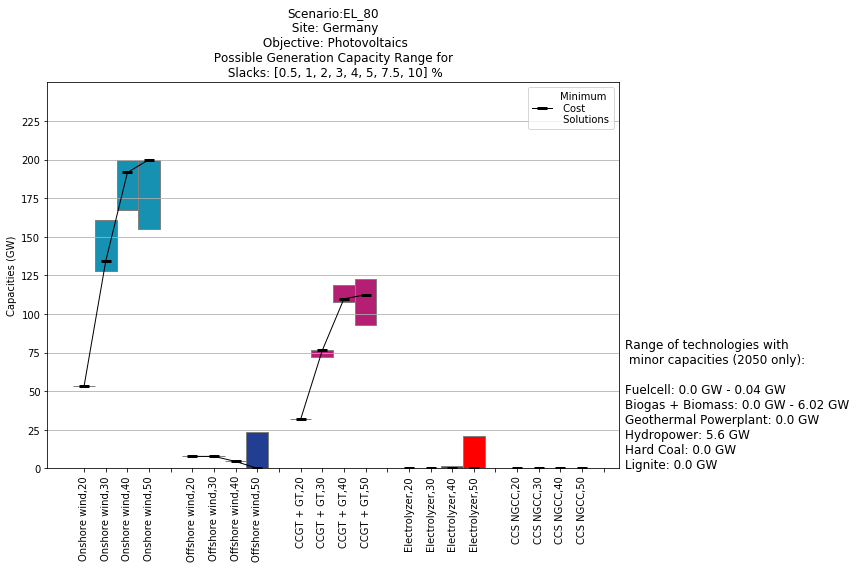

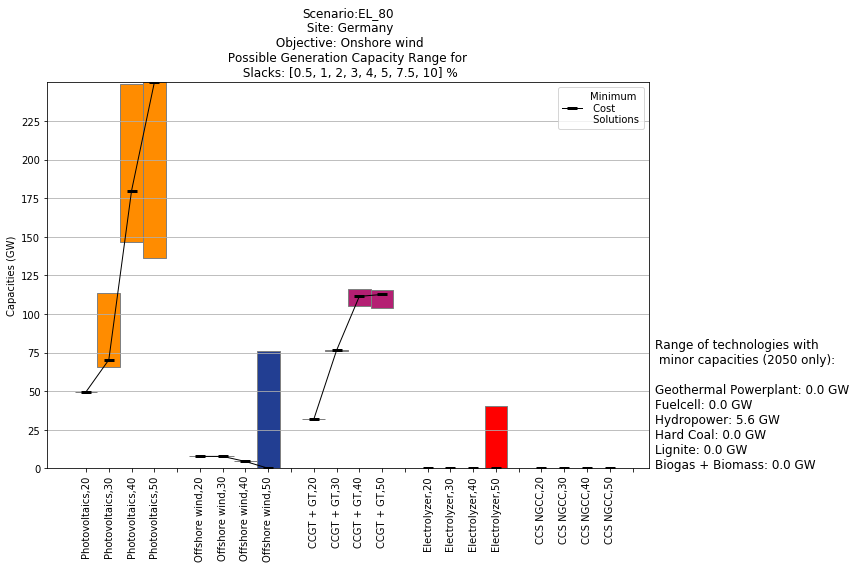

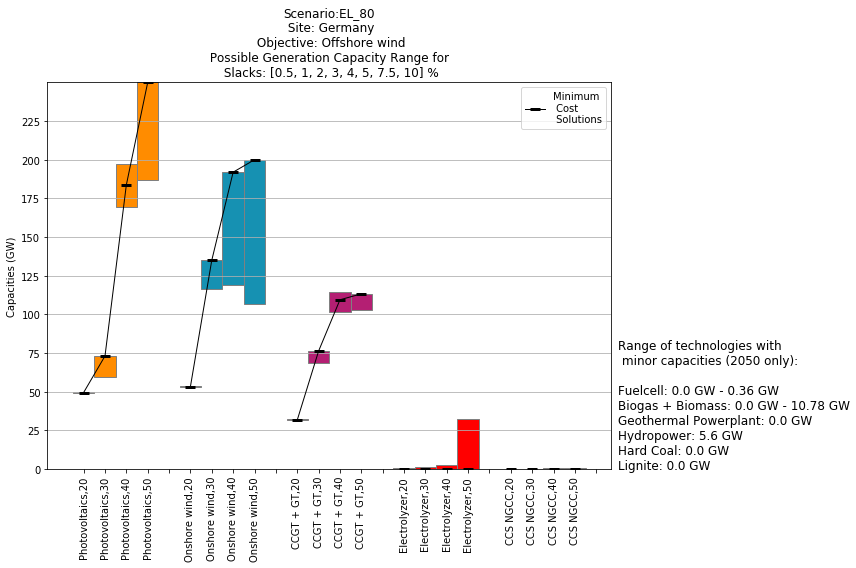

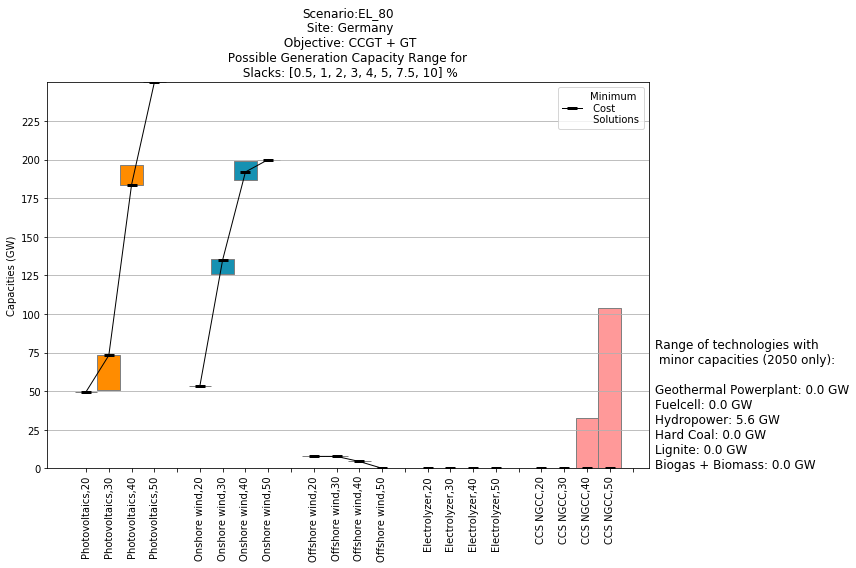

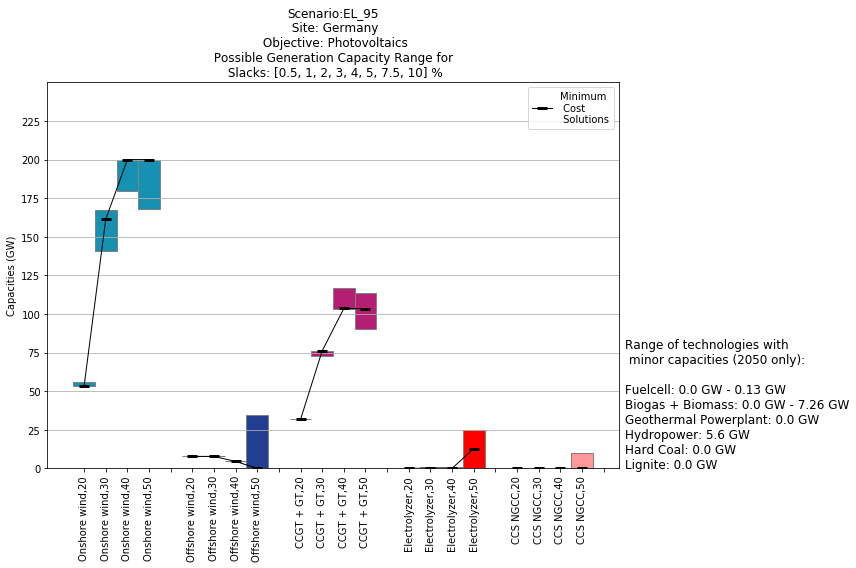

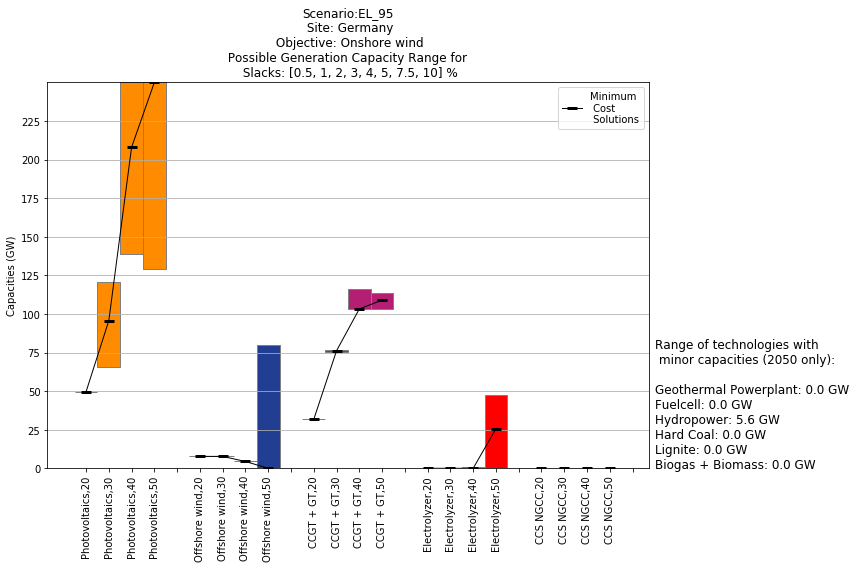

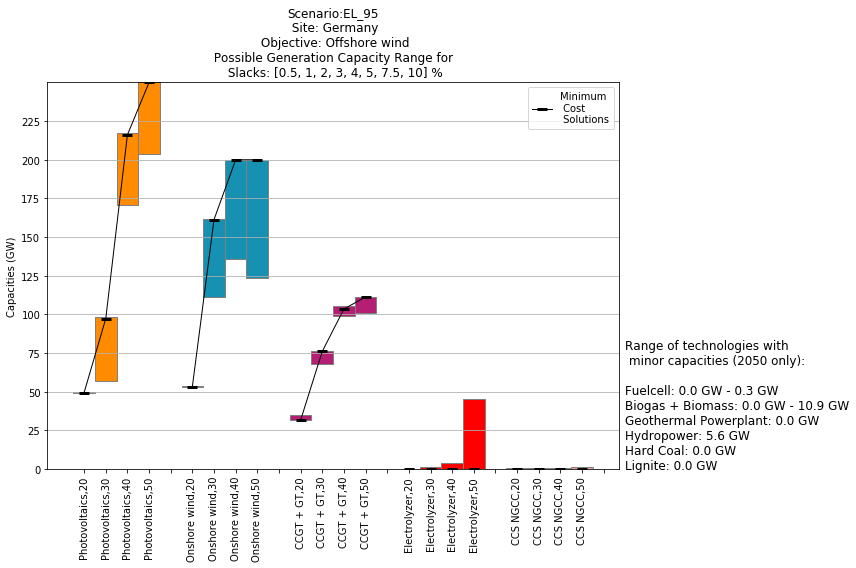

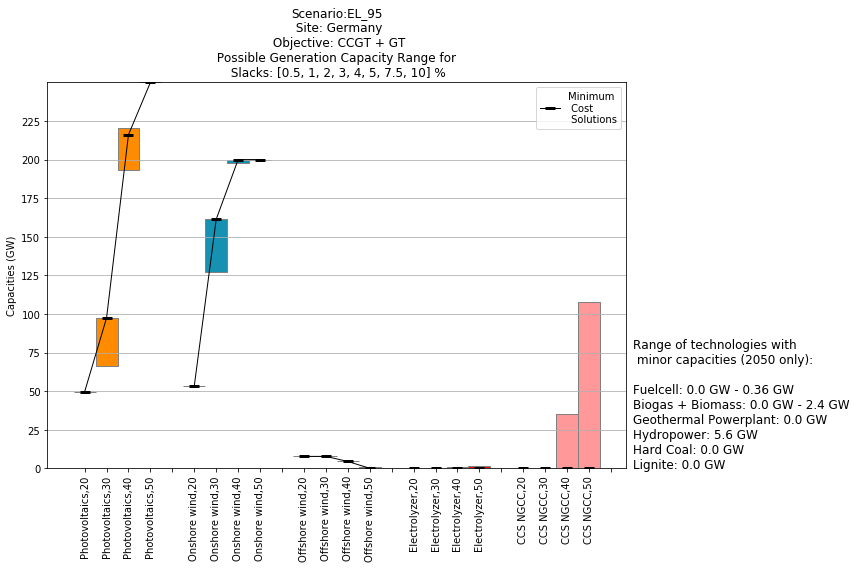

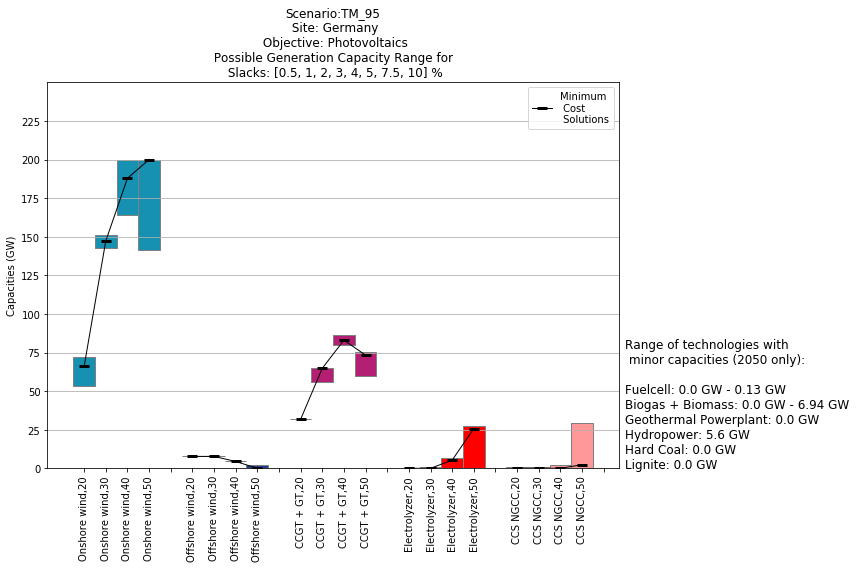

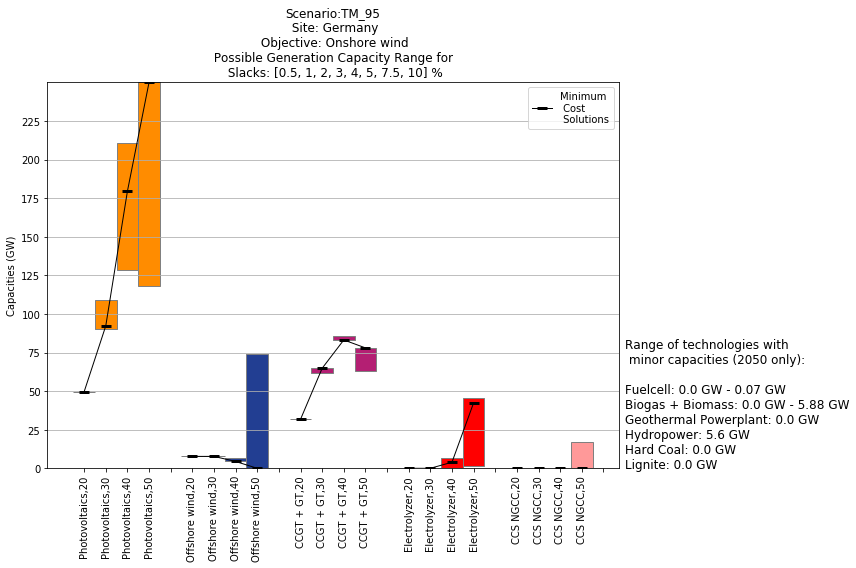

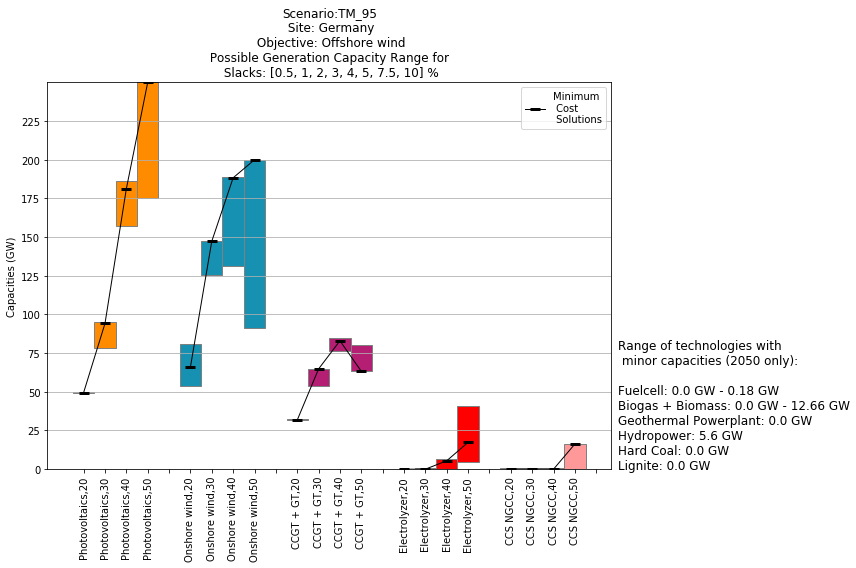

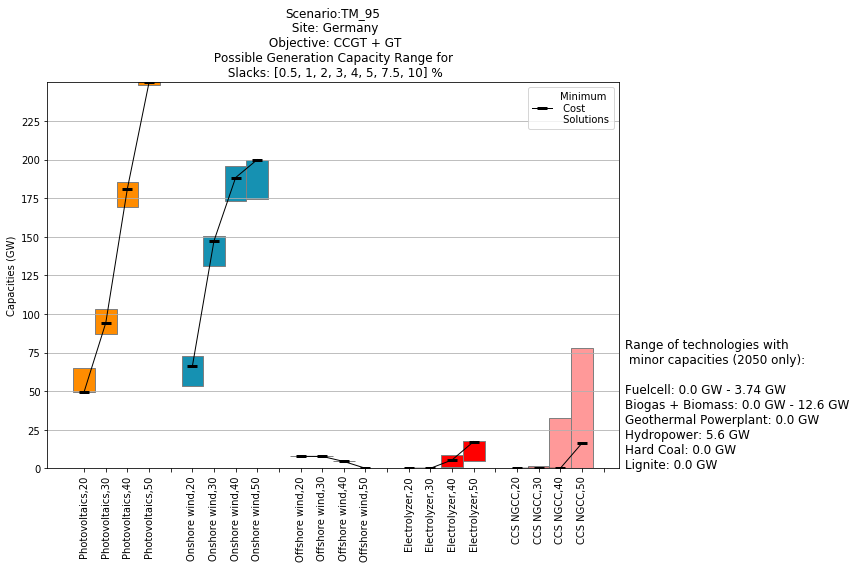

In [50]:
slack_list=[0.5,1,2,3,4,5,7.5,10]
for s in sec:
    scenario_dfs=sce_dict[s]
    result_dir= result_dict[s]
    for df in scenario_dfs:
        objective_info= df.obj.values[0]
        changing_cap=changing_cap_raw.copy()
        changing_cap.remove(objective_info)
        df_cap_plot= df.copy(deep=True)
        df_cap_plot = df_cap_plot[df_cap_plot.Process.isin(changing_cap)]
        con_df=df[df.Process.isin(constant_cap)].copy(deep=True)
        noplot_df= con_df.groupby(by=['Process','Stf']).agg({"Capacities": {"min": np.min, "max": np.max}})
        noplot_df.columns=noplot_df.columns.droplevel(0)
        noplot_df=noplot_df.reset_index()
        text_df= noplot_df[noplot_df.Stf==2050]
        fig, ax = plt.subplots(figsize=(12,8))
        axis_name_list=[]
        indices= tuple(range(1,(len(changing_cap)*5+1)))
        for i, item in enumerate(changing_cap):

                b=5*i
                x=[b+1,b+2,b +3,b+4]
                plot_df= df_cap_plot[df_cap_plot.Process == item].groupby('Stf').agg({"Process": {'pro':'first'},
                                                                                      "Capacities": {"min": np.min, "max": np.max}})
                plot_df.columns=plot_df.columns.droplevel(0)
                plot_df=plot_df.reset_index()

                ax.bar(x,(plot_df['max']-plot_df['min'])/1000,width=1,bottom=(plot_df['min'])/1000,color=to_color(item),edgecolor=to_color('Decoration'))
                cost_min = df_cap_plot[(df_cap_plot.Process == item)&(df_cap_plot.Slack == 0)].copy(deep=True)
                    #cost_min['Capacities_gw']=cost_min['Capacities']/1000
                line1,=ax.plot(x, (cost_min['Capacities'])/1000,marker="_", linewidth=1,markersize=10,color='k',markeredgecolor='k',markeredgewidth=3)

                ticks=[item+',20',item+',30',item+',40',item+',50','']
                axis_name_list.extend(ticks)
        text= "Range of technologies with \n minor capacities (2050 only):\n "
        text2=""
        for line in constant_cap:
            min= round(text_df[text_df.Process==line]['min'].values[0]/1000,2)
            max= round(text_df[text_df.Process==line]['max'].values[0]/1000,2)
            if max==min:
                text2= text2+'\n'+line+': '+f'{min} GW'
            else:
                text= text+'\n'+line+': '+f'{min} GW - {max} GW'
        text=text+text2 
        ax.text(26,0,text,fontsize =12) 
        ax.set_ylim(0,250)
        ax.set_yticks(np.arange(0,250,25))
        ax.set_xticks(indices)
        ax.set_xticklabels(axis_name_list)
        plt.xticks(rotation=90)
        ax.legend([line1], ['Minimum \n Cost \n Solutions'], loc=1)
        #plt.legend()
        ax.grid(axis='y')
        ax.set_ylabel('Capacities (GW)')
        ax.set_title(
            'Scenario:'+s+ '\n Site: Germany' + '\n Objective: '+
            objective_info + '\n Possible Generation Capacity Range for \n Slacks: ' + 
            str(slack_list)+' %')
        #fig_filename = os.path.join(result_dir,objective_info+'others_box_env.png')
        fig_filename = os.path.join(root,'result_plots','box plots',objective_info+s+'others_box_env.png')
        fig.savefig(fig_filename, bbox_inches='tight')

### BOX - STORAGE

In [41]:
list_of_technologies

['Photovoltaics',
 'Onshore wind',
 'Offshore wind',
 'Bio Energy',
 'Gas',
 'CCS NGCC',
 'Geothermal Powerplant',
 'Electrolyzer',
 'Fuelcell',
 'Hydropower',
 'Hard Coal',
 'Lignite']

In [60]:
df_cap_plot2 = pro_plot[(pro_plot.Sce==s)&(pro_plot.obj==obj)].copy(deep=True)
for s in sec:
    for obj in obj_list:
        for item in df_capacities.Process.unique():
            cap= df_cap_plot2[df_cap_plot2.Process == item].groupby('Stf').agg({"Process": {'pro':'first'},
                                                                                      "Capacities": {"min": np.min, "max": np.max}})
            cap.columns=cap.columns.droplevel(0)
            cap=cap.reset_index()
            print(s,obj,item,cap[cap.Stf==2050]['min'])

EL_80 Offshore wind Photovoltaics 3    248459.433004
Name: min, dtype: float64
EL_80 Offshore wind Onshore wind 3    174154.590085
Name: min, dtype: float64
EL_80 Offshore wind Offshore wind 3    0.0
Name: min, dtype: float64
EL_80 Offshore wind Biogas + Biomass 3    0.0
Name: min, dtype: float64
EL_80 Offshore wind CCGT + GT 3    0.0
Name: min, dtype: float64
EL_80 Offshore wind CCS NGCC 3    0.0
Name: min, dtype: float64
EL_80 Offshore wind Geothermal Powerplant 3    0.0
Name: min, dtype: float64
EL_80 Offshore wind Electrolyzer 3    4546.180355
Name: min, dtype: float64
EL_80 Offshore wind Fuelcell 3    0.0
Name: min, dtype: float64
EL_80 Offshore wind Hydropower 3    5595.0
Name: min, dtype: float64
EL_80 Offshore wind Hard Coal 3    0.0
Name: min, dtype: float64
EL_80 Offshore wind Lignite 3    0.0
Name: min, dtype: float64
EL_80 Onshore wind Photovoltaics 3    248459.433004
Name: min, dtype: float64
EL_80 Onshore wind Onshore wind 3    174154.590085
Name: min, dtype: float64
EL_8

TM_95 Photovoltaics Onshore wind 3    174154.590085
Name: min, dtype: float64
TM_95 Photovoltaics Offshore wind 3    0.0
Name: min, dtype: float64
TM_95 Photovoltaics Biogas + Biomass 3    0.0
Name: min, dtype: float64
TM_95 Photovoltaics CCGT + GT 3    0.0
Name: min, dtype: float64
TM_95 Photovoltaics CCS NGCC 3    0.0
Name: min, dtype: float64
TM_95 Photovoltaics Geothermal Powerplant 3    0.0
Name: min, dtype: float64
TM_95 Photovoltaics Electrolyzer 3    4546.180355
Name: min, dtype: float64
TM_95 Photovoltaics Fuelcell 3    0.0
Name: min, dtype: float64
TM_95 Photovoltaics Hydropower 3    5595.0
Name: min, dtype: float64
TM_95 Photovoltaics Hard Coal 3    0.0
Name: min, dtype: float64
TM_95 Photovoltaics Lignite 3    0.0
Name: min, dtype: float64
TM_95 CCGT + GT Photovoltaics 3    248459.433004
Name: min, dtype: float64
TM_95 CCGT + GT Onshore wind 3    174154.590085
Name: min, dtype: float64
TM_95 CCGT + GT Offshore wind 3    0.0
Name: min, dtype: float64
TM_95 CCGT + GT Biogas +

In [59]:
df_capacities.Process.unique()

array(['Photovoltaics', 'Onshore wind', 'Offshore wind',
       'Biogas + Biomass', 'CCGT + GT', 'CCS NGCC',
       'Geothermal Powerplant', 'Electrolyzer', 'Fuelcell', 'Hydropower',
       'Hard Coal', 'Lignite'], dtype=object)

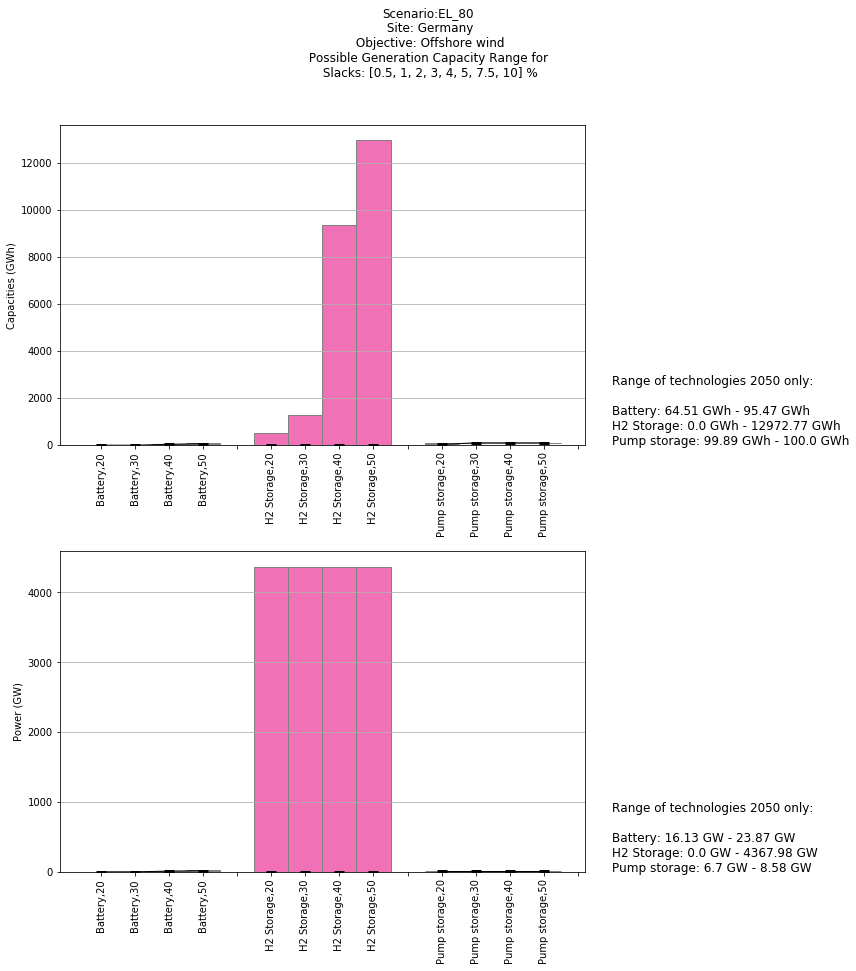

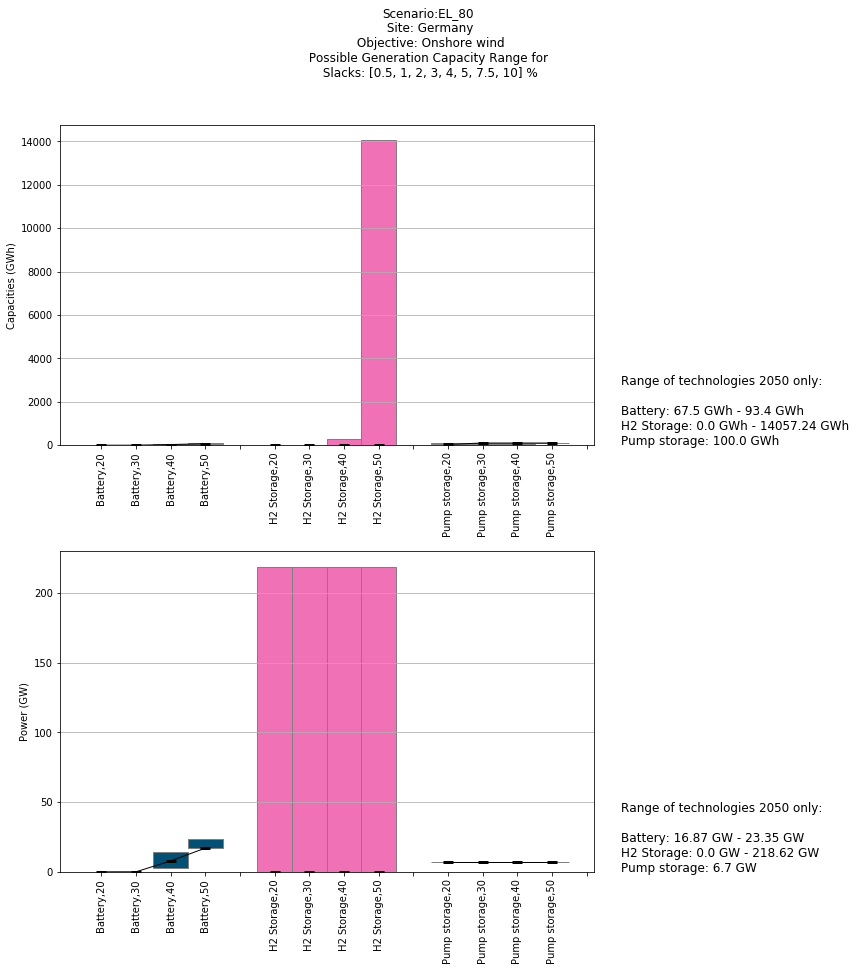

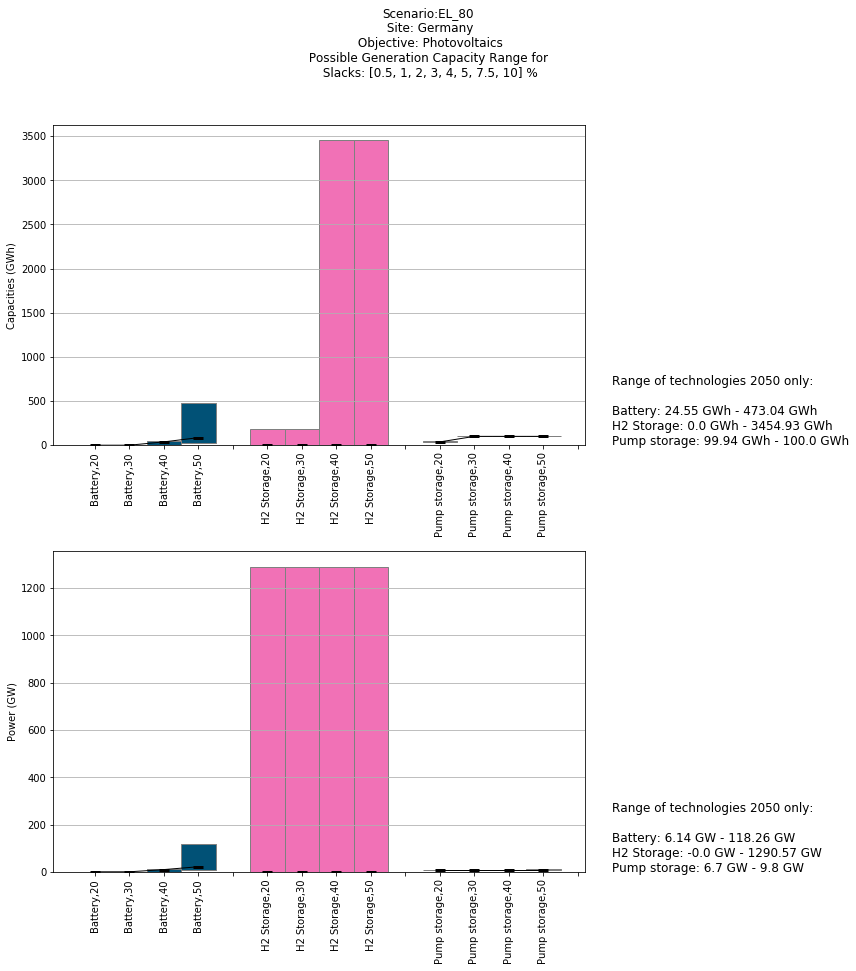

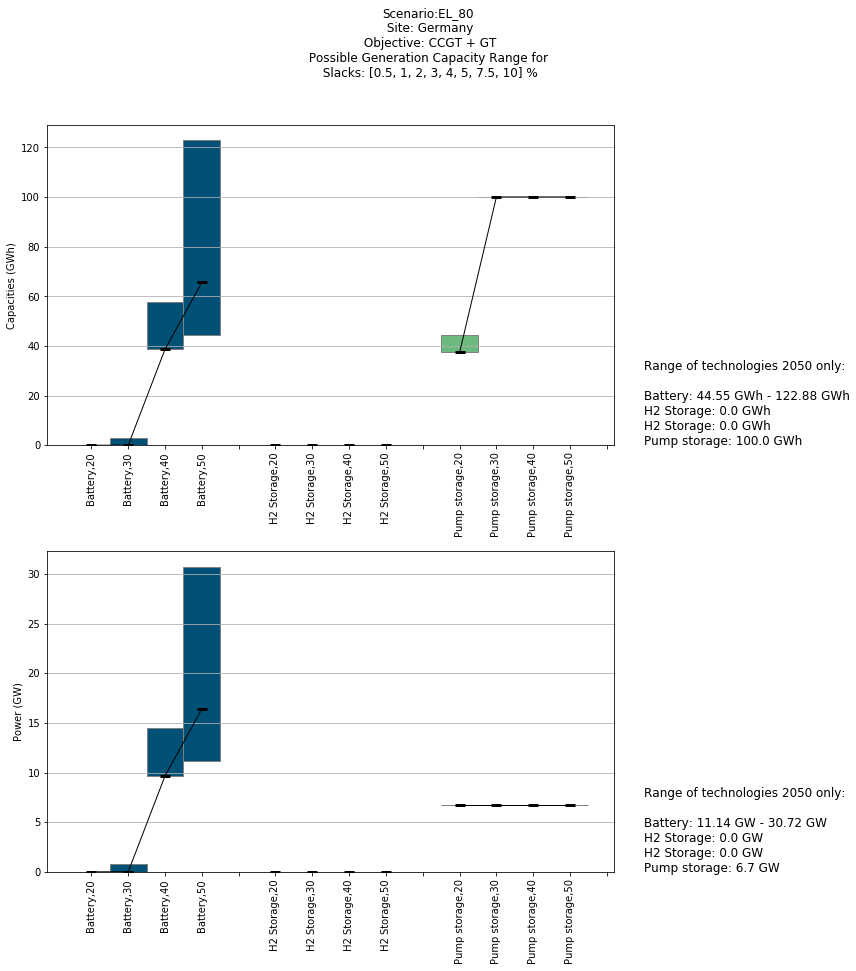

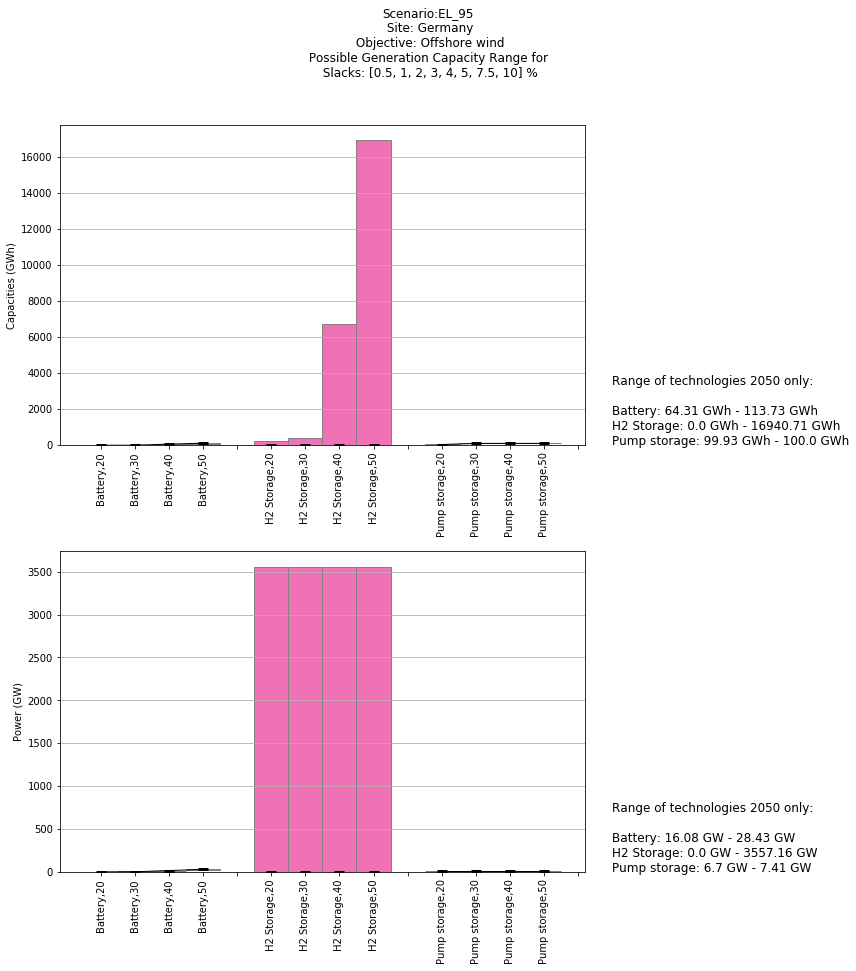

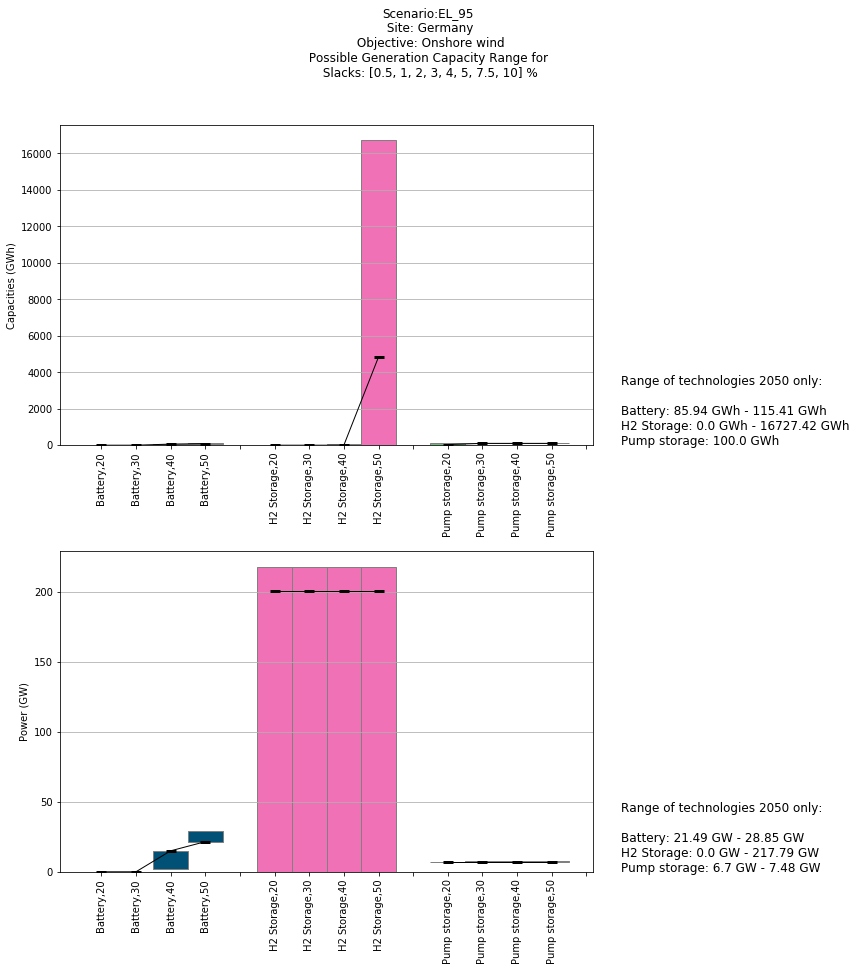

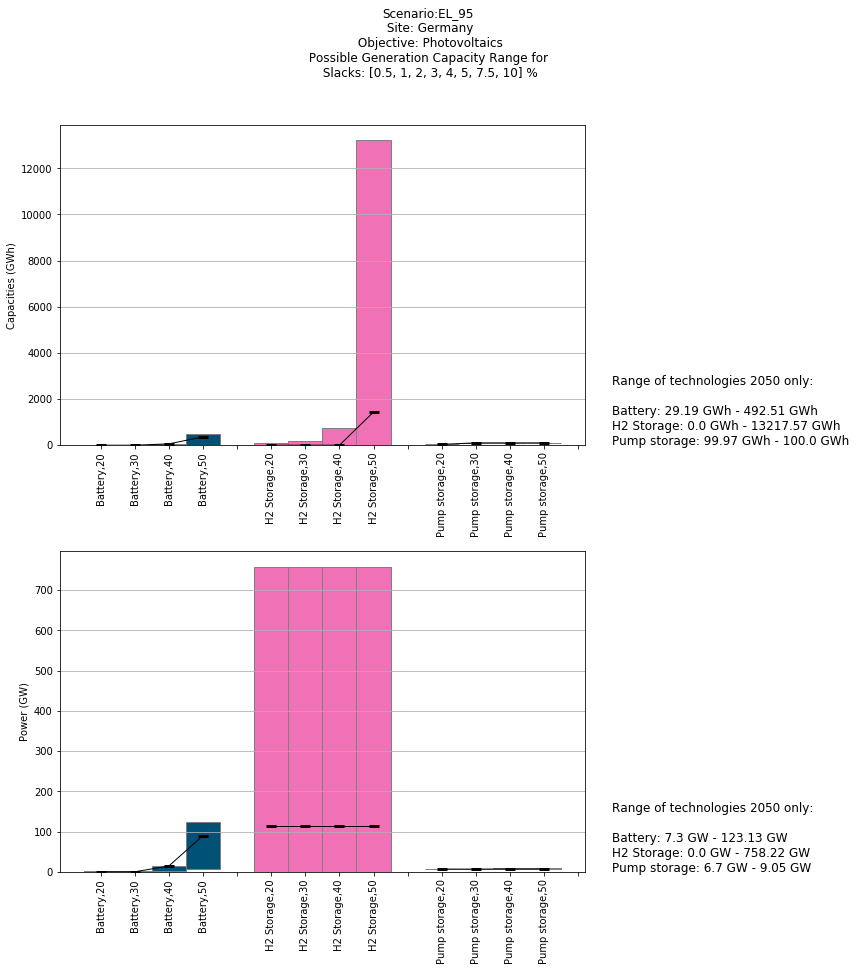

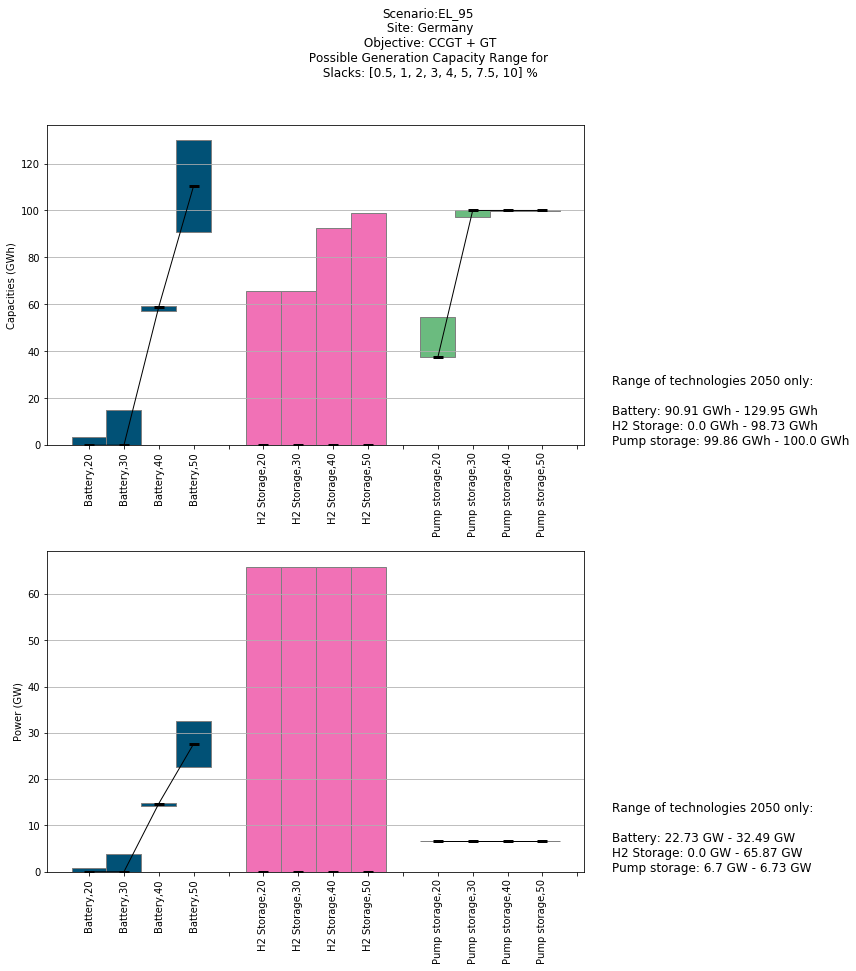

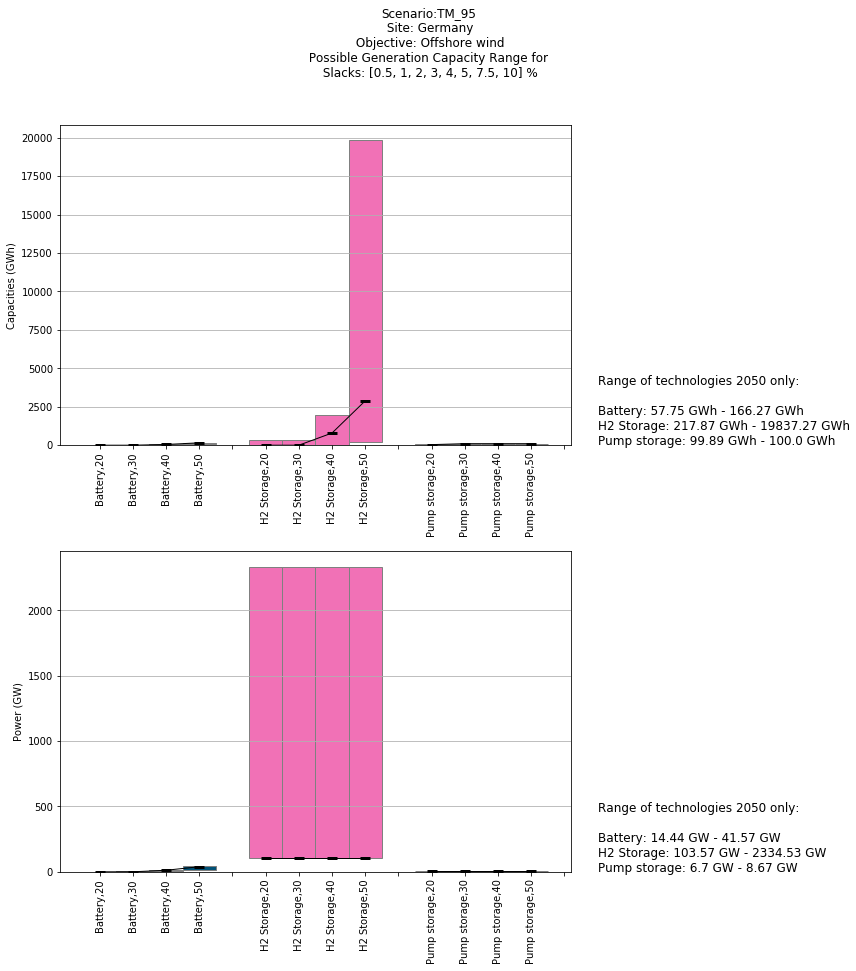

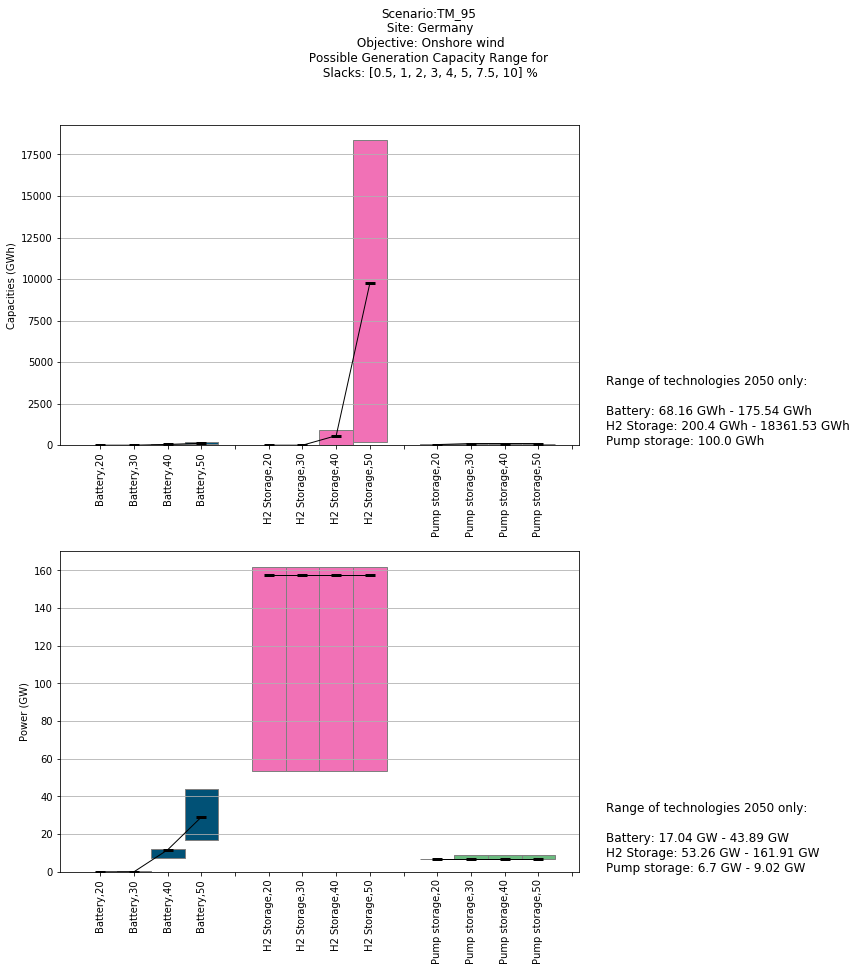

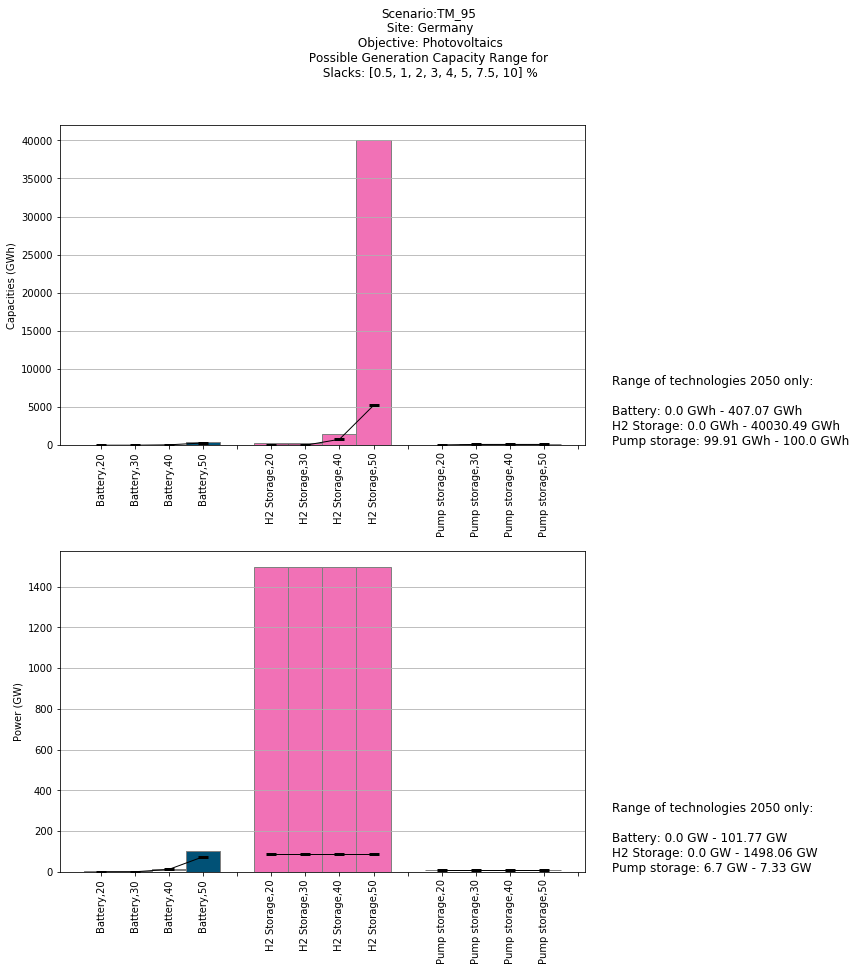

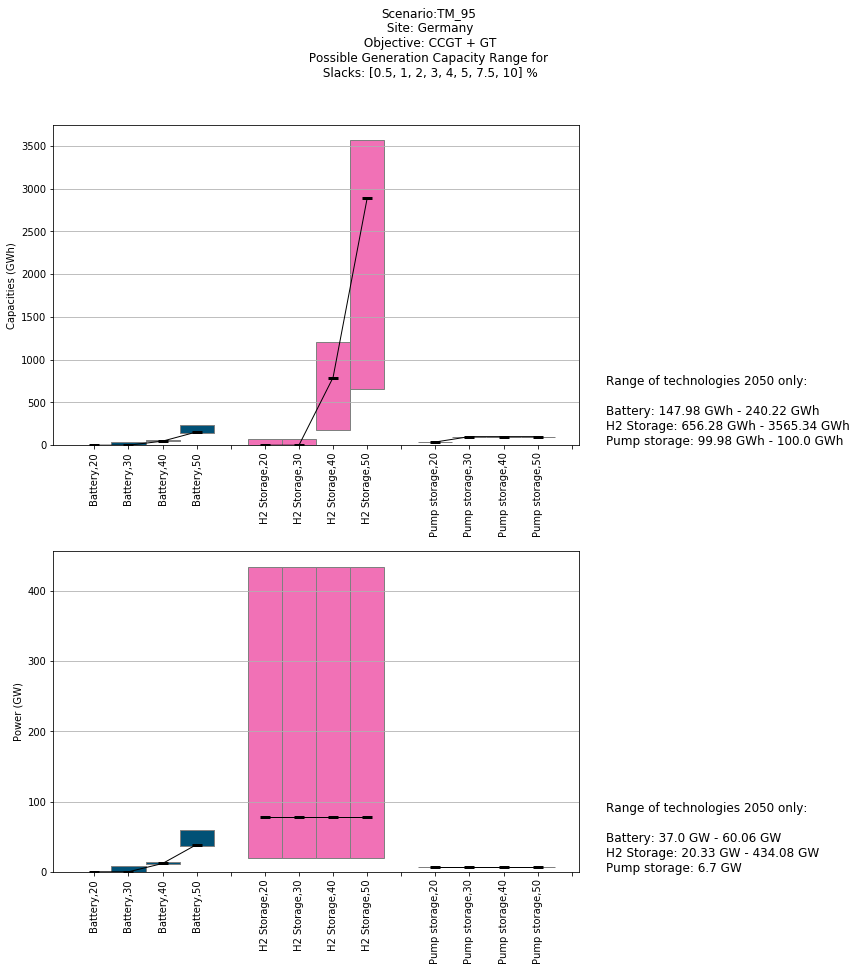

In [16]:
sto_plot= storage_solutions.reset_index()

for s in sec:
    for obj in obj_list:
        text21= "Range of technologies 2050 only:\n "
        text31= "Range of technologies 2050 only:\n "
        text2=""
        text3=""
        df_cap_plot = sto_plot[(sto_plot.Sce==s)&(sto_plot.obj==obj)]
        fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12,12))
        axis_name_list=[]
        indices= tuple(range(1,(len(sto_tech)*5+1)))
        axes=[ax1,ax2]
        for i, item in enumerate(sto_tech):

                b=5*i
                x=[b+1,b+2,b+3,b+4]
                cap= df_cap_plot[df_cap_plot.Process == item].groupby('Stf').agg({"Process": {'pro':'first'},
                                                                                      "capacity": {"min": np.min, "max": np.max}})
                power= df_cap_plot[df_cap_plot.Process == item].groupby('Stf').agg({"Process": {'pro':'first'},
                                                                                      "power": {"min": np.min, "max": np.max}})
                cap.columns=cap.columns.droplevel(0)
                cap=cap.reset_index()
                power.columns=power.columns.droplevel(0)
                power=power.reset_index()
                
                

                ax1.bar(x,(cap['max']-cap['min'])/1000,width=1,bottom=(cap['min'])/1000,color=to_color(item),edgecolor=to_color('Decoration'))
                ax2.bar(x,(power['max']-power['min'])/1000,width=1,bottom=(power['min'])/1000,color=to_color(item),edgecolor=to_color('Decoration'))
                cost_min = df_cap_plot[(df_cap_plot.Process == item)&(df_cap_plot.Slack == 0)].copy(deep=True)
                    #cost_min['Capacities_gw']=cost_min['Capacities']/1000
                line1,=ax1.plot(x, (cost_min['capacity'])/1000,marker="_", linewidth=1,markersize=10,color='k',markeredgecolor='k',markeredgewidth=3)
                line2,=ax2.plot(x, (cost_min['power'])/1000,marker="_", linewidth=1,markersize=10,color='k',markeredgecolor='k',markeredgewidth=3)

                ticks=[item+',20',item+',30',item+',40',item+',50','']
                axis_name_list.extend(ticks)

                
                min_cap= round(cap[cap.Stf==2050]['min'].values[0]/1000,2)
                max_cap= round(cap[cap.Stf==2050]['max'].values[0]/1000,2)
                min_pow= round(power[power.Stf==2050]['min'].values[0]/1000,2)
                max_pow= round(power[power.Stf==2050]['max'].values[0]/1000,2)
                if max_cap==min_cap:
                    text2= text2+'\n'+item+': '+f'{min_cap} GWh'
                else:
                    text21= text21+'\n'+item+': '+f'{min_cap} GWh - {max_cap} GWh'
                if max_pow==min_pow:
                    text3= text3+'\n'+item+': '+f'{min_pow} GW'
                else:
                    text31= text31+'\n'+item+': '+f'{min_pow} GW - {max_pow} GW'
                
                text21=text21+text2 
                text31=text31+text3 
        ax1.text(16,0,text21,fontsize =12) 
        ax2.text(16,0,text31,fontsize =12)
        ax1.set_ylabel('Capacities (GWh)')
        ax2.set_ylabel('Power (GW)')
        
        for ax in axes:
            
            #ax.set_ylim(0,250)
            #ax.set_yticks(np.arange(0,250,25))
            ax.set_xticks(indices)
            ax.set_xticklabels(axis_name_list,rotation=90)
            
            #ax.legend([line1], ['Minimum \n Cost \n Solutions'], loc=1)
            #plt.legend()
            ax.grid(axis='y')
            #ax.set_ylabel('Capacities (GW)')
            fig.suptitle(
                'Scenario:'+s+ '\n Site: Germany' + '\n Objective: '+
                obj + '\n Possible Generation Capacity Range for \n Slacks: ' + 
                str(slack_list)+' %',y=1.12)
        result_dir= os.path.join(root,'result_plots')
        fig_filename = os.path.join(result_dir,'box plots',obj+s+'storage.png')
        fig.savefig(fig_filename,bbox_inches='tight')

### ENVELOPE OBJECTED

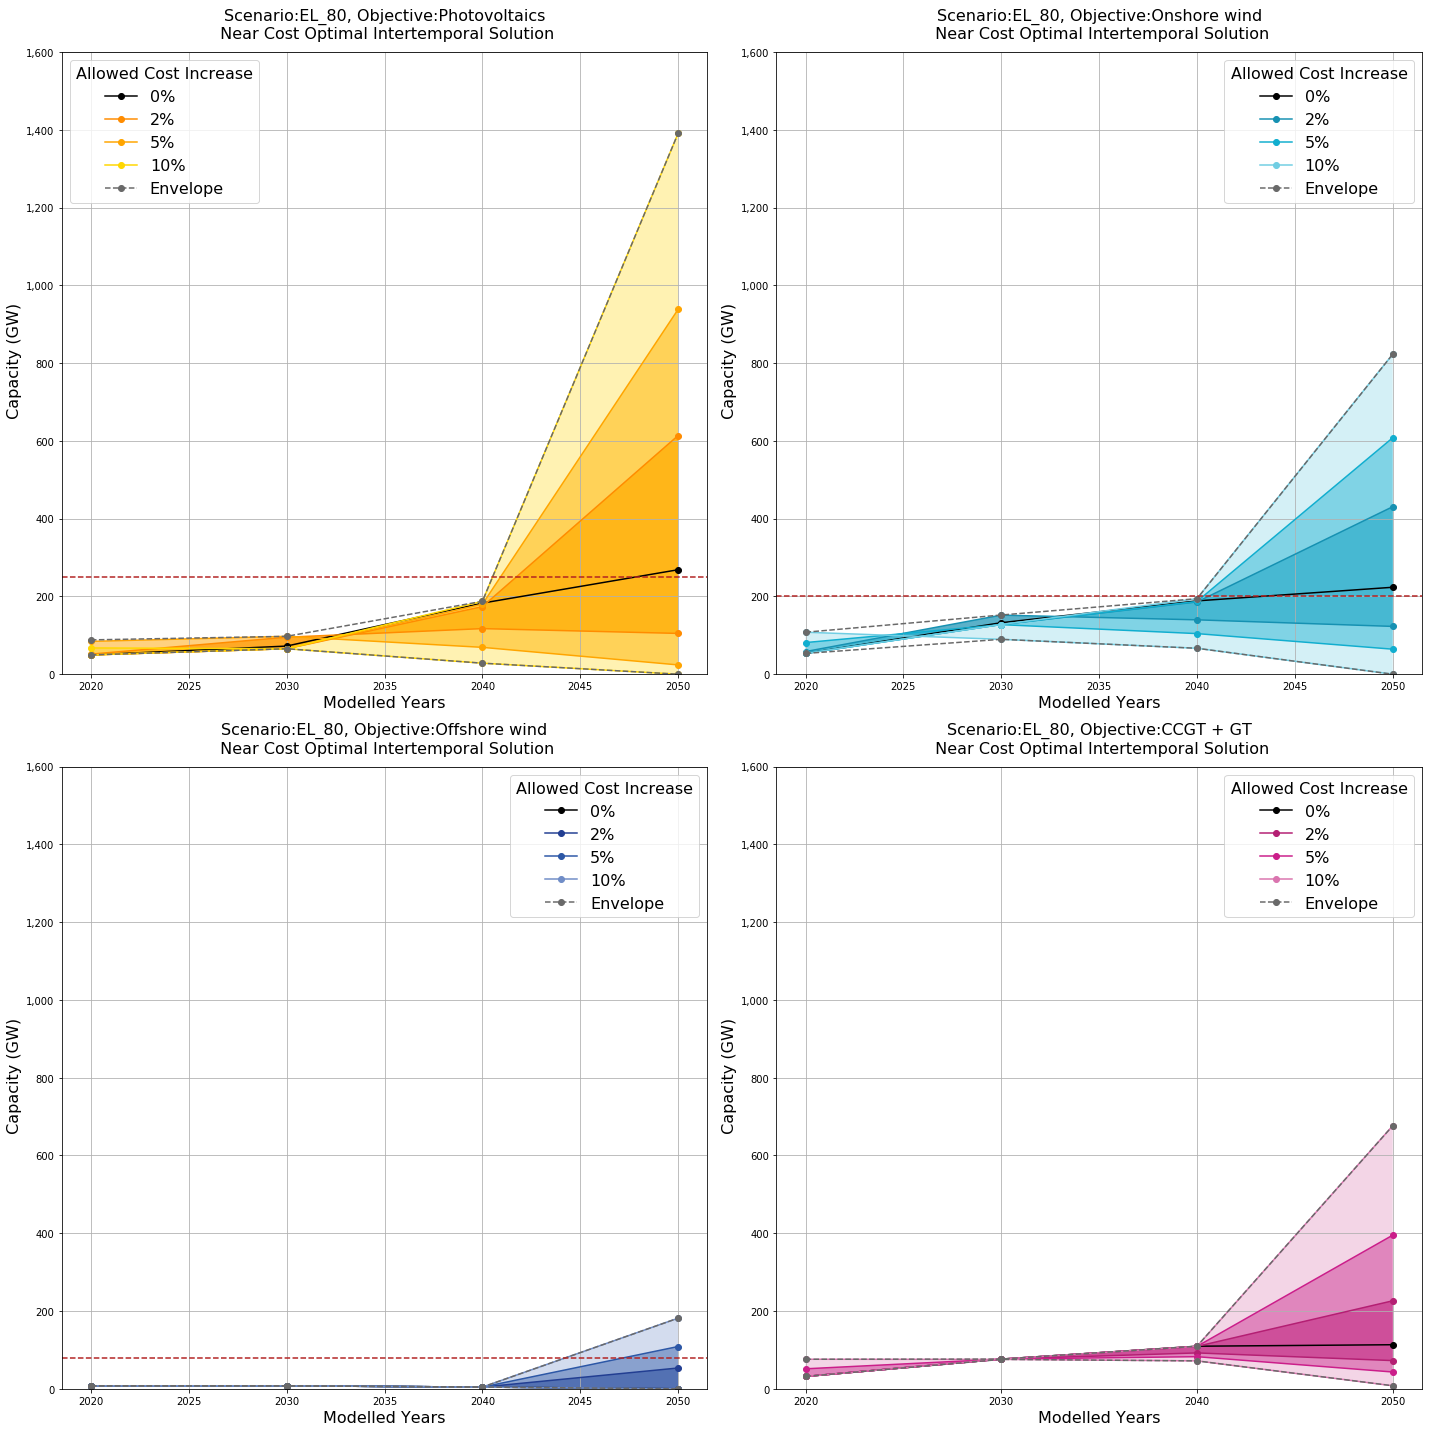

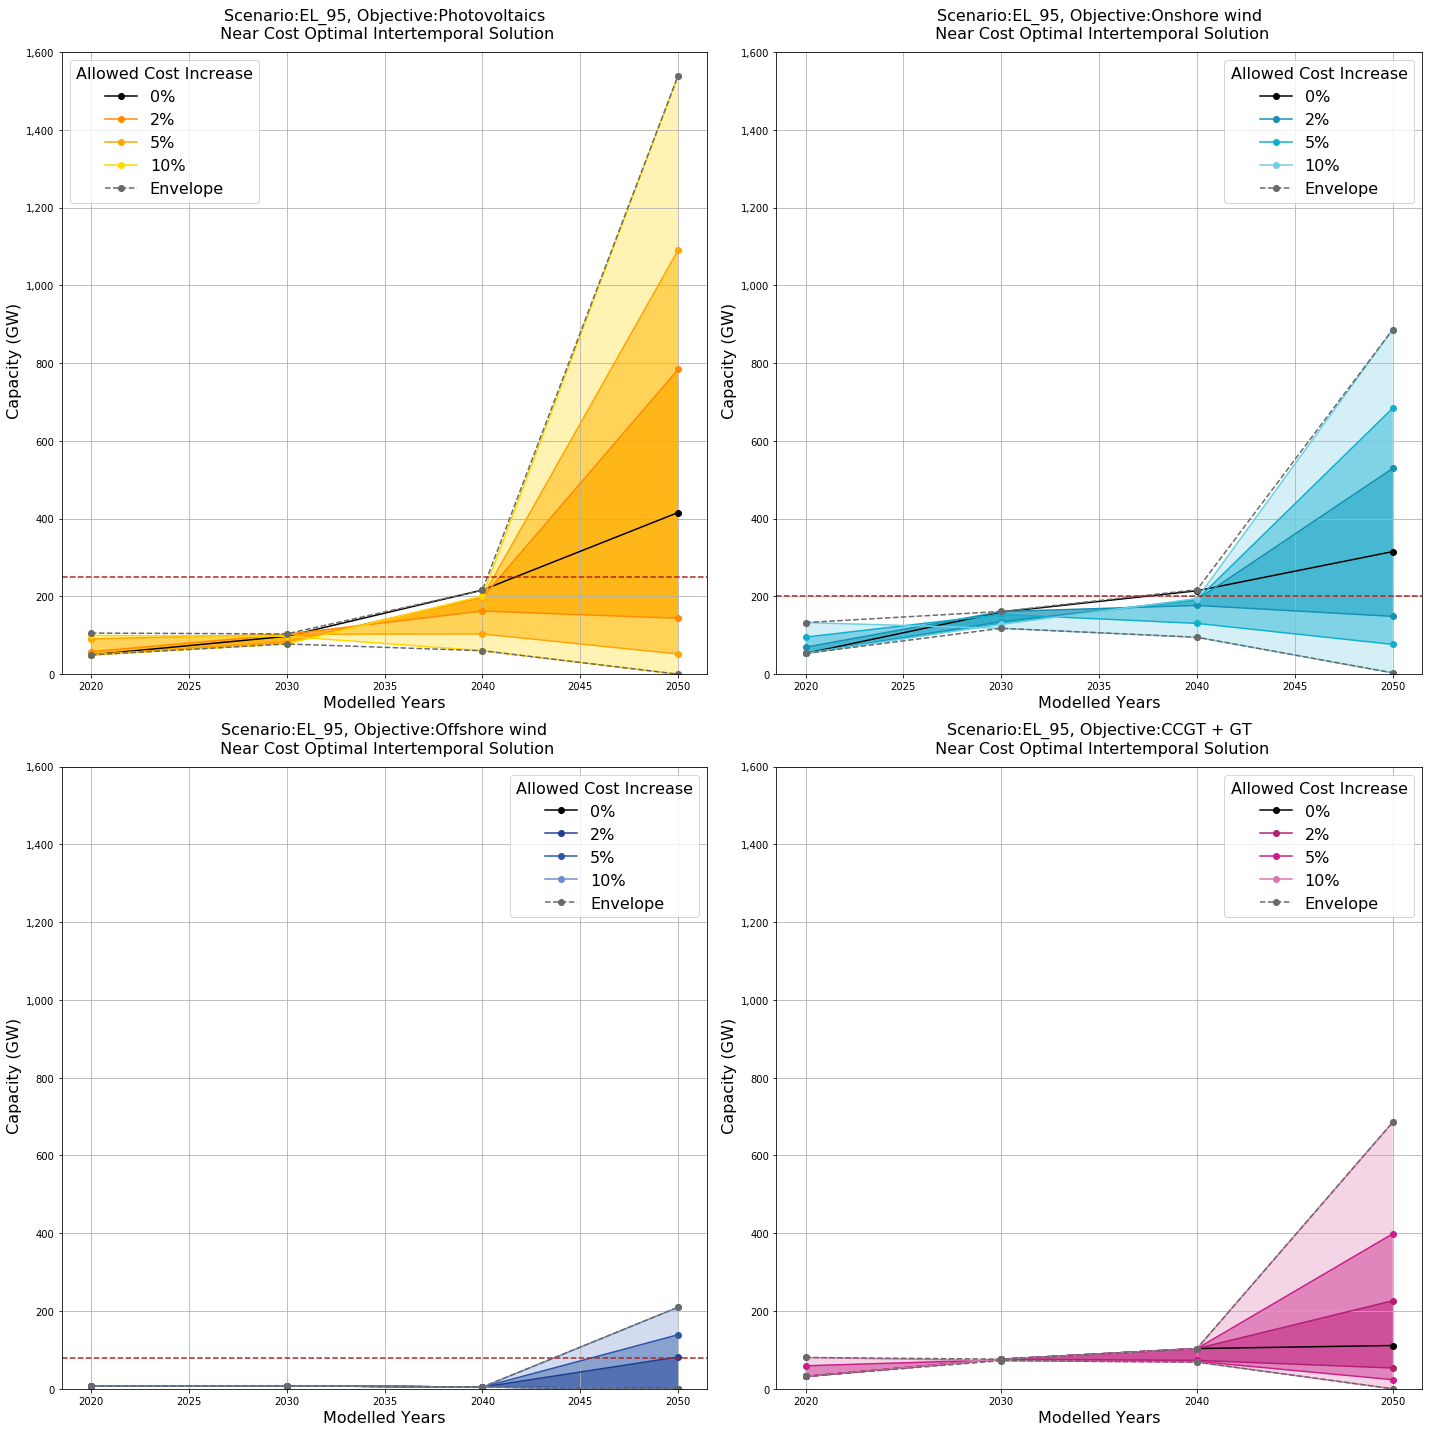

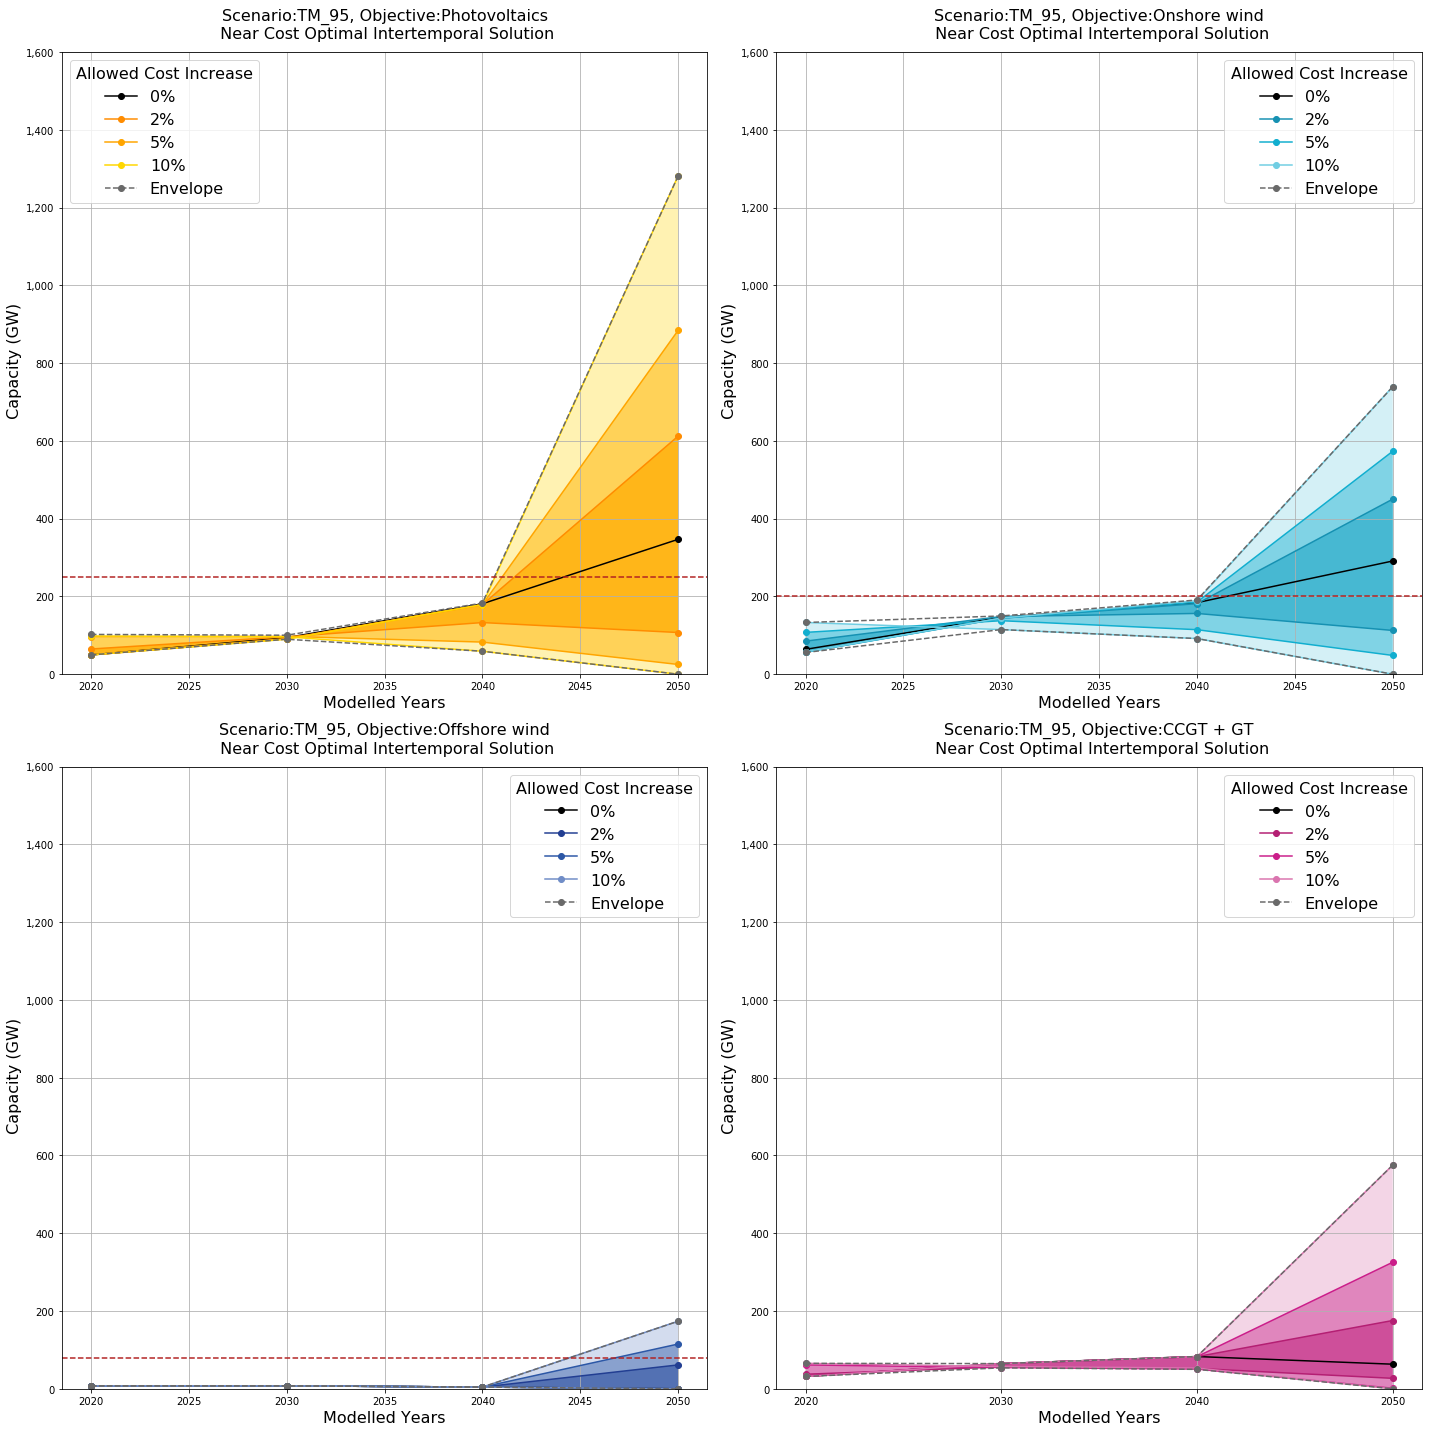

In [12]:
for s in sec:
    scenario_dfs=sce_dict[s]
    result_dir= result_dict[s]
    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,20))
    axes=[ax1,ax2,ax3,ax4]
    for j,df in enumerate(scenario_dfs):
        ax=axes[j]
        objective_info= df.obj.values[0]
        changing_cap=changing_cap_raw.copy()
        changing_cap.remove(objective_info)

        slack_to_plot=[0,2,5,10]

        df_line_plot= df[df.Process == objective_info].copy(deep=True)
        plot_df= df_line_plot.groupby('Stf').agg({"Capacities": {"min": np.min, "max": np.max}})
        plot_df.columns=plot_df.columns.droplevel(0)
        plot_df=plot_df.reset_index()
        data1 = df_line_plot[df_line_plot.Objective=='Min']
        data2 = df_line_plot[df_line_plot.Objective == 'Max']

        for i, sl in enumerate(sorted(slack_to_plot)):
            line1, = ax.plot('Stf', 'Capacities',
                             data=data1[data1.Slack == sl], color=to_shade(shade[objective_info][i]),
                             label='{}%'.format(sl), marker='o')
            line2, = ax.plot('Stf', 'Capacities', 
                             data=data2[data2.Slack == sl], color=to_shade(shade[objective_info][i]),
                             label='_{}%'.format(sl), marker='o')
            if not sl==0:
                ax.fill_between(data1[data1.Slack == sl].Stf, data1[data1.Slack == sl].Capacities,
                                data2[data2.Slack == sl].Capacities,
                                facecolor=to_shade(shade[objective_info][i])
                                , alpha=0.9-(i*2/10))

        line3, = ax.plot('Stf', 'min', data=plot_df, color='dimgray', label='Envelope', marker='o',linestyle='--')
        line4, = ax.plot('Stf', 'max', data=plot_df, color='dimgray', label='_Envelope',marker='o',linestyle='--')
        ax.legend(loc='best', title='Allowed Cost Increase',fontsize=16,title_fontsize=16)
        ax.grid()
        ax.set_xlabel('Modelled Years', fontsize=16)
        plt.xticks(list(data1.Stf.unique()), list(str(int(x)) for x in list(data1.Stf.unique())))
        ax.set_ylabel(' Capacity (GW)', fontsize=16)
        ax.set_title('Scenario:'+s+ ', Objective:'+objective_info+'\n Near Cost Optimal Intertemporal Solution', fontsize=16,
                     pad=15)  #
        ax.set_ylim(0, 1600000)
        ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x) // 1000, ',')))
        if objective_info=='Photovoltaics':
            ax.axhline(y=250000,color='firebrick',linestyle='--')
        elif objective_info=='Onshore wind':
            ax.axhline(y=200000,color='firebrick',linestyle='--')
        elif objective_info=='Offshore wind':
            ax.axhline(y=80000,color='firebrick',linestyle='--')
    fig_filename = os.path.join(result_dir,'objected_envelope.png')
    fig.savefig(fig_filename, bbox_inches='tight')

        #plt.close(fig)



### ENVELOPE OTHERS

In [13]:
main_pro=['Photovoltaics','Onshore wind', 'Offshore wind', 'CCGT + GT']

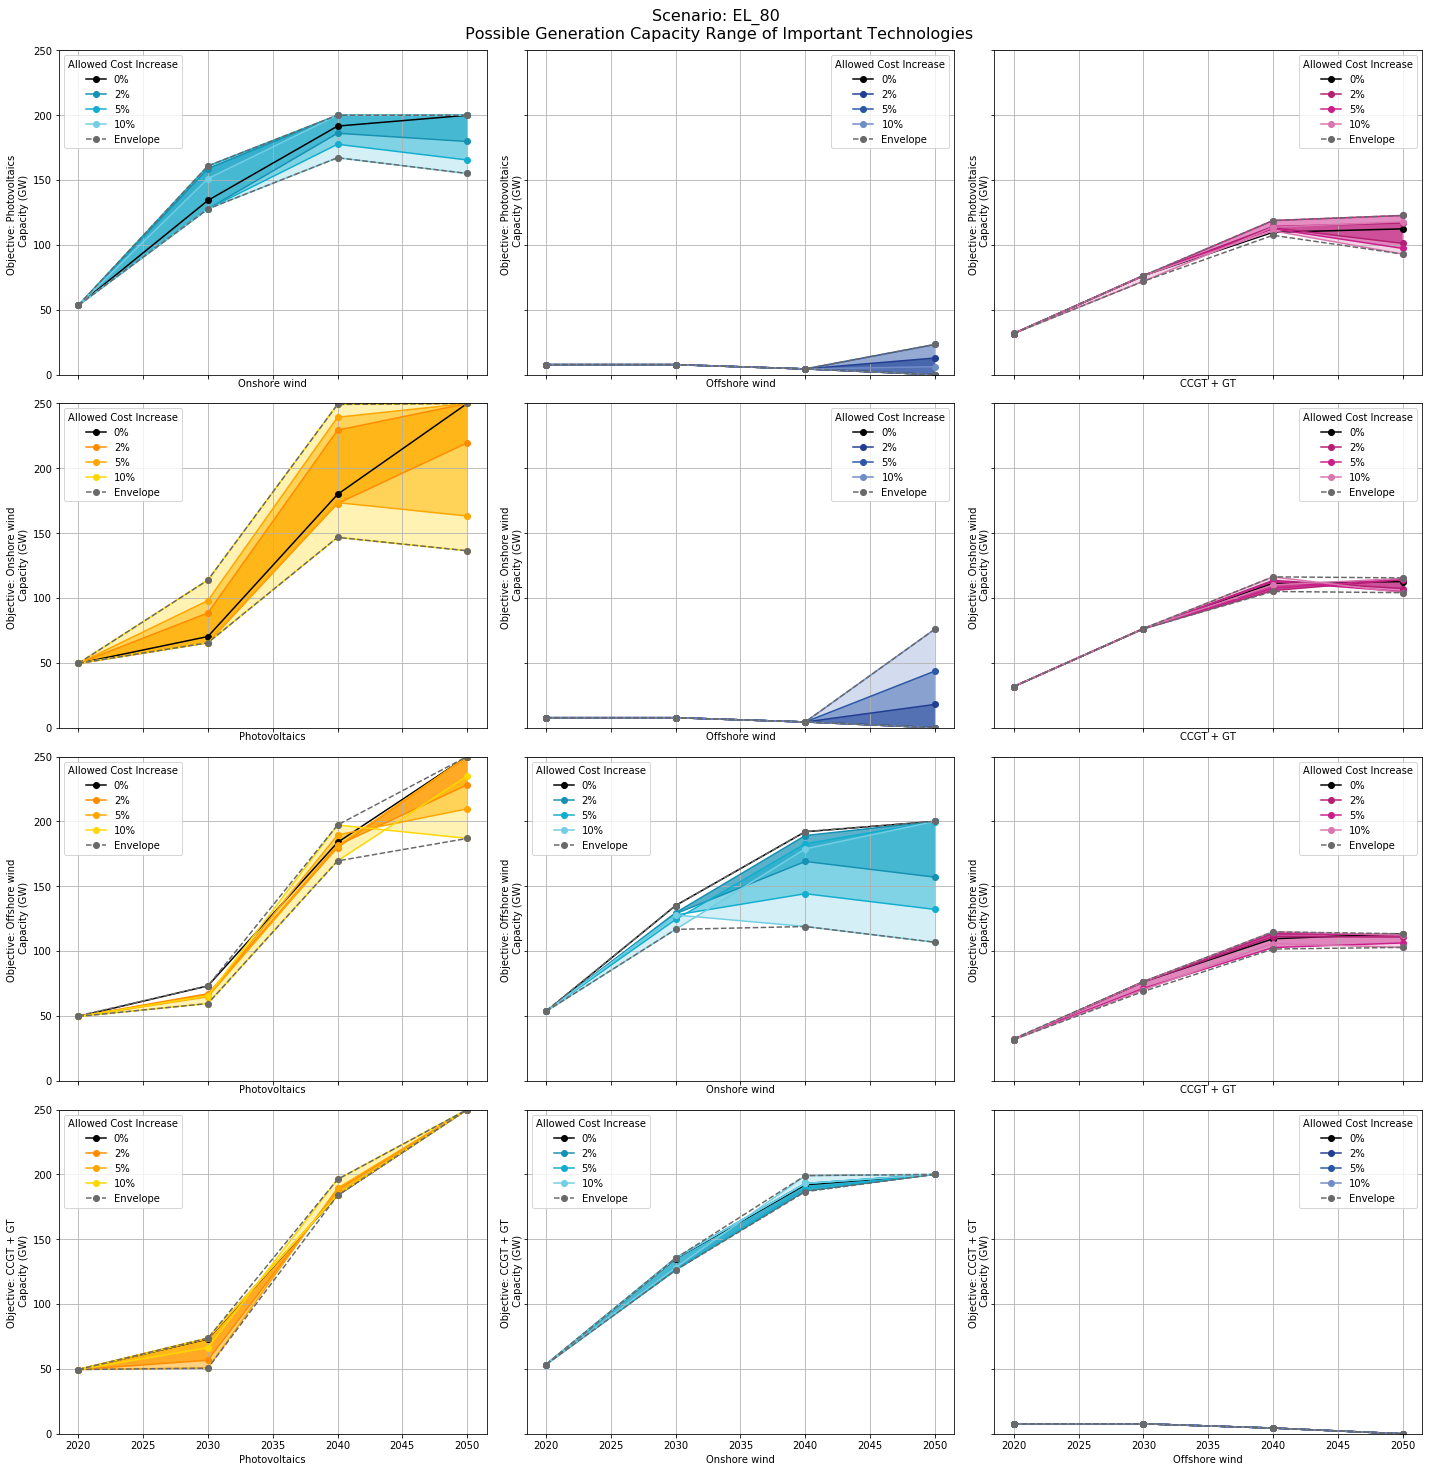

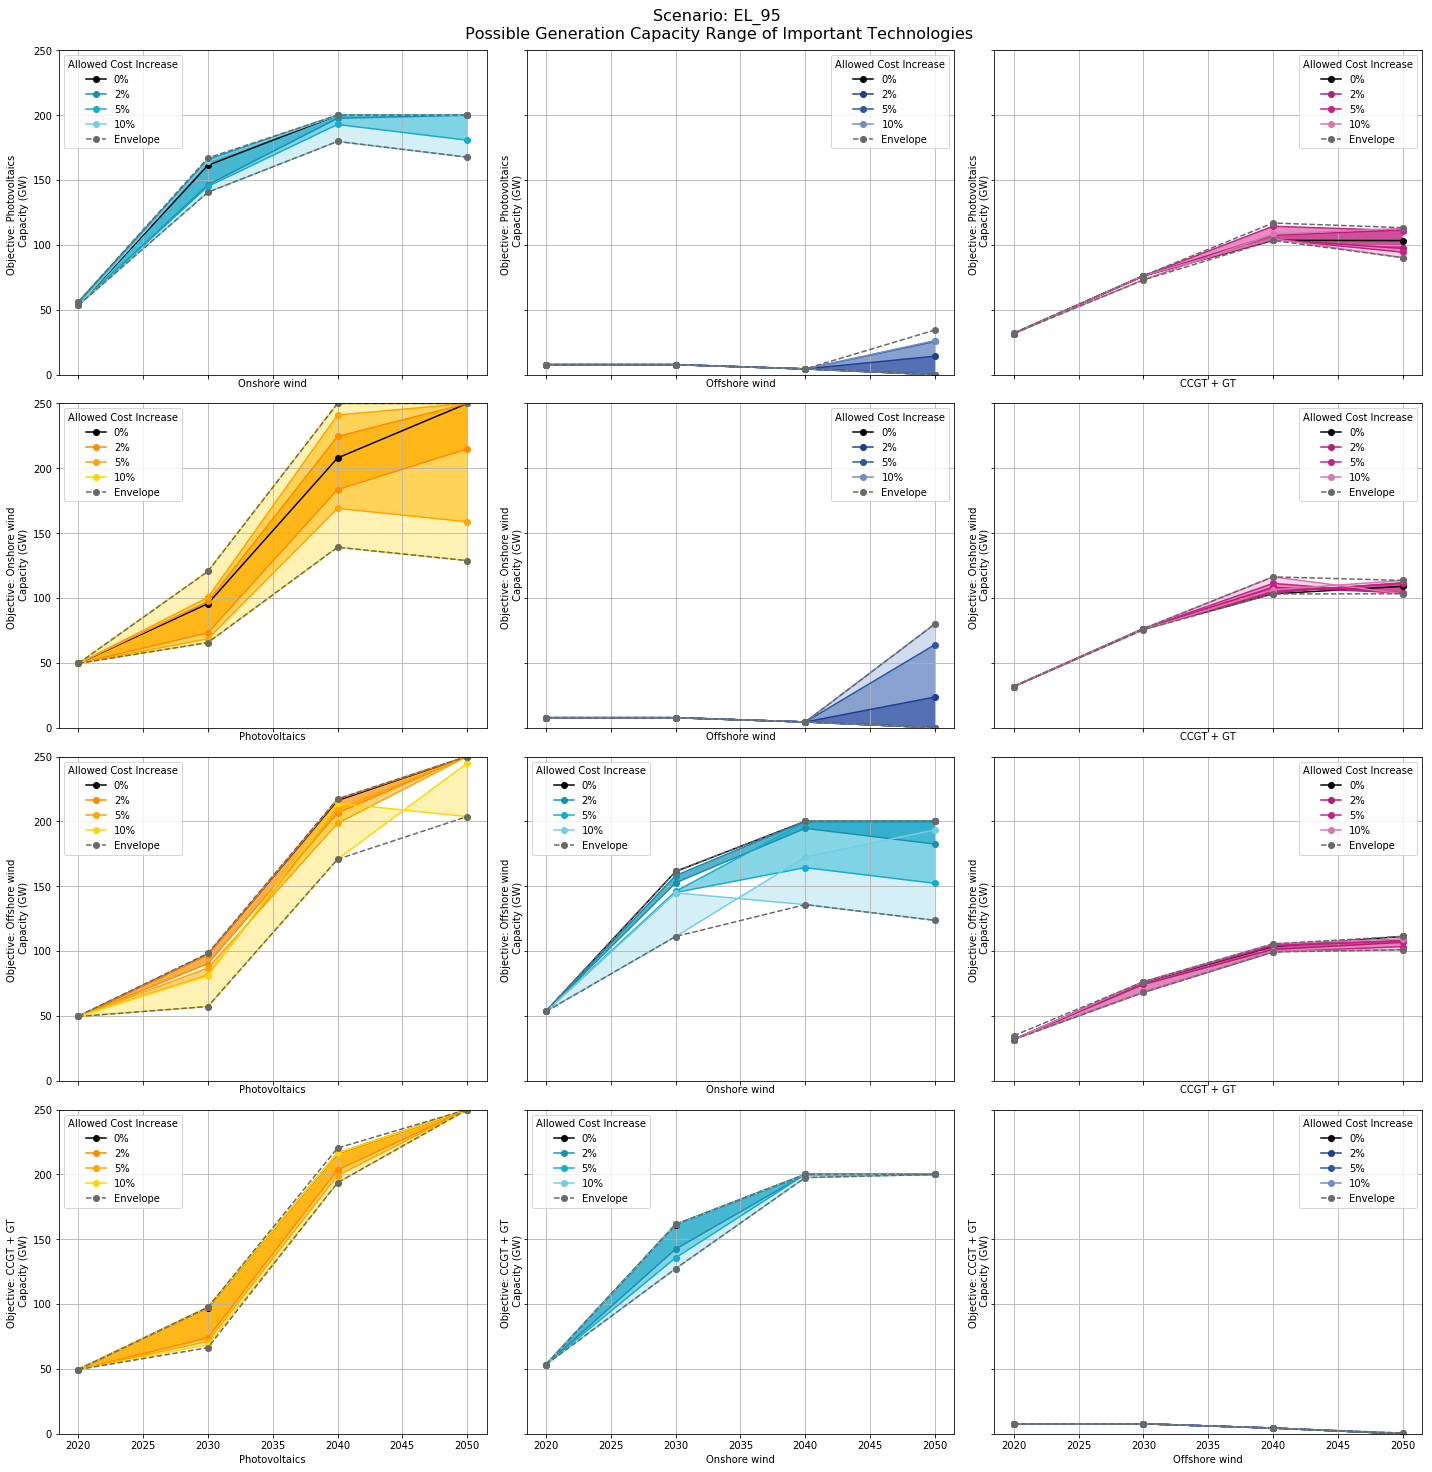

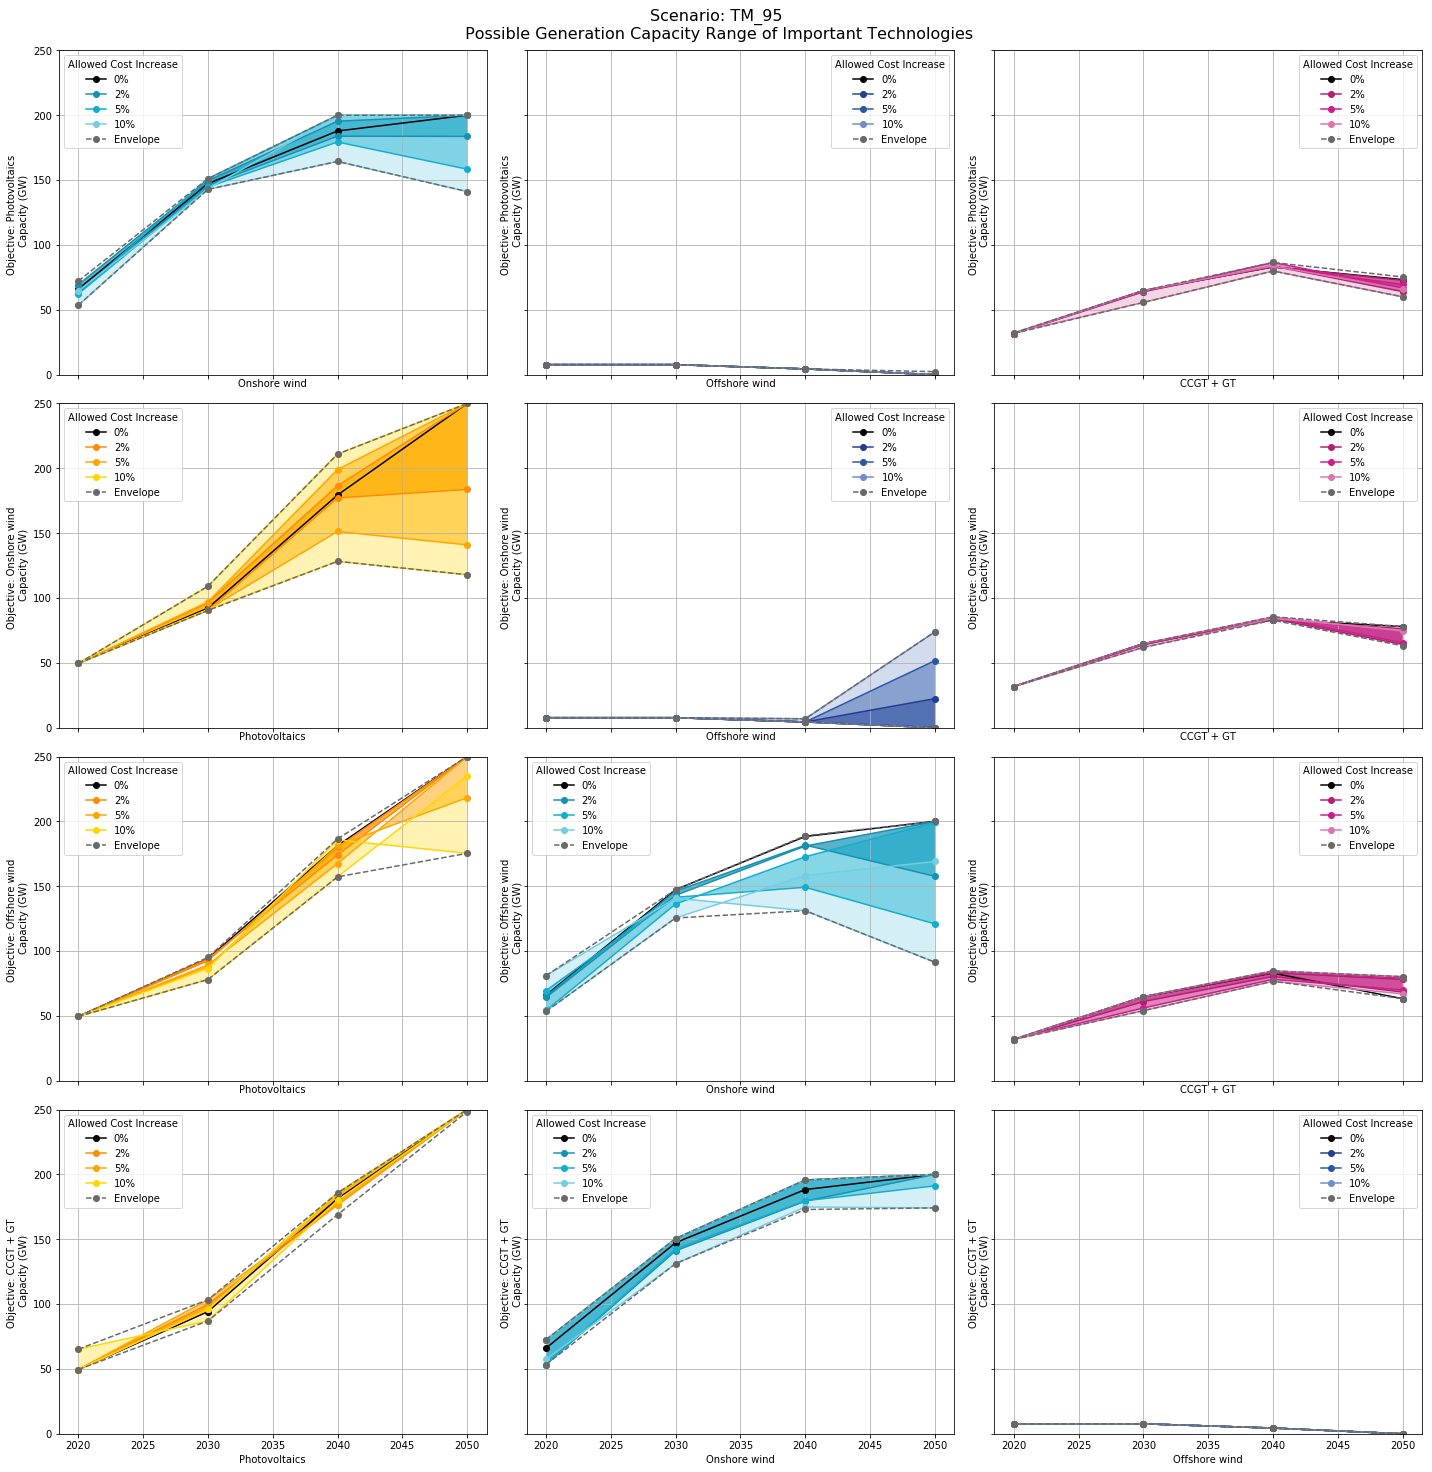

In [14]:
for s in sec:
    scenario_dfs=sce_dict[s]
    result_dir= result_dict[s]
    fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12)) = plt.subplots(4,3,figsize=(20,20),sharex=True, sharey=True)
    axes_all=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]

    for k,df in enumerate(scenario_dfs):
        axes=axes_all[k*3:k*3+3]
        objective_info= df.obj.values[0]
        changing_cap=main_pro.copy()
        changing_cap.remove(objective_info)

        slack_to_plot=[0,2,5,10]

        df_cap_plot= df.copy(deep=True)
        df_cap_plot = df_cap_plot[df_cap_plot.Process.isin(changing_cap)]
        color_list = ['Tum-main-K',
                      'Tum-main-b',
                      'Tum-sec-b',
                      'Tum-sec-lb',
                      'Tum-acc-o',
                      'Tum-acc-y',
                      'Tum-sec-db',
                      'Tum-acc-g']
        for j, item in enumerate(changing_cap):
            ax=axes[j]
            plot_df= df_cap_plot[df_cap_plot.Process == item].groupby('Stf').agg({"Capacities": {"min": np.min, "max": np.max}})
            plot_df.columns=plot_df.columns.droplevel(0)
            plot_df=plot_df.reset_index()
            df_line_plot=df_cap_plot[df_cap_plot.Process == item].copy(deep=True)
            data1 = df_line_plot[df_line_plot.Objective=='Min']
            data2 = df_line_plot[df_line_plot.Objective == 'Max']
            for i, sl in enumerate(sorted(slack_to_plot)):
                line1, = ax.plot('Stf', 'Capacities', data=data1[data1.Slack == sl], color=to_shade(shade[item][i]),
                             label='{}%'.format(sl), marker='o')
                line2, = ax.plot('Stf', 'Capacities', data=data2[data2.Slack == sl], color=to_shade(shade[item][i]),
                             label='_{}%'.format(sl), marker='o')
                if not sl==0:
                       ax.fill_between(data1[data1.Slack == sl].Stf, data1[data1.Slack == sl].Capacities,
                               data2[data2.Slack == sl].Capacities,
                                facecolor=to_shade(shade[item][i]), alpha=0.9-(i*2/10))

            line3, = ax.plot('Stf', 'min', data=plot_df, color='dimgray', label='Envelope', marker='o',linestyle='--')
            line4, = ax.plot('Stf', 'max', data=plot_df, color='dimgray', label='_Envelope',marker='o',linestyle='--')
            ax.legend(loc='best', title='Allowed Cost Increase')
            ax.grid()
            ax.set_xlabel(item)
            ax.set_xticks(list(data1.Stf.unique()), list(str(int(x)) for x in list(data1.Stf.unique())))
            ax.set_ylabel('Objective: '+ objective_info + ' \n Capacity (GW)')

            ax.set_ylim(0, 250000)
            ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x) // 1000, ',')))

    plt.suptitle('Scenario: '+s+ '\n Possible Generation Capacity Range of Important Technologies',y=1.02,fontsize=16 )
             #        pad=15) 
    fig_filename = os.path.join(result_dir,'others_envelope_plot.png')
    fig.savefig(fig_filename, bbox_inches='tight')

        #plt.close(fig)


### ENVELOPE

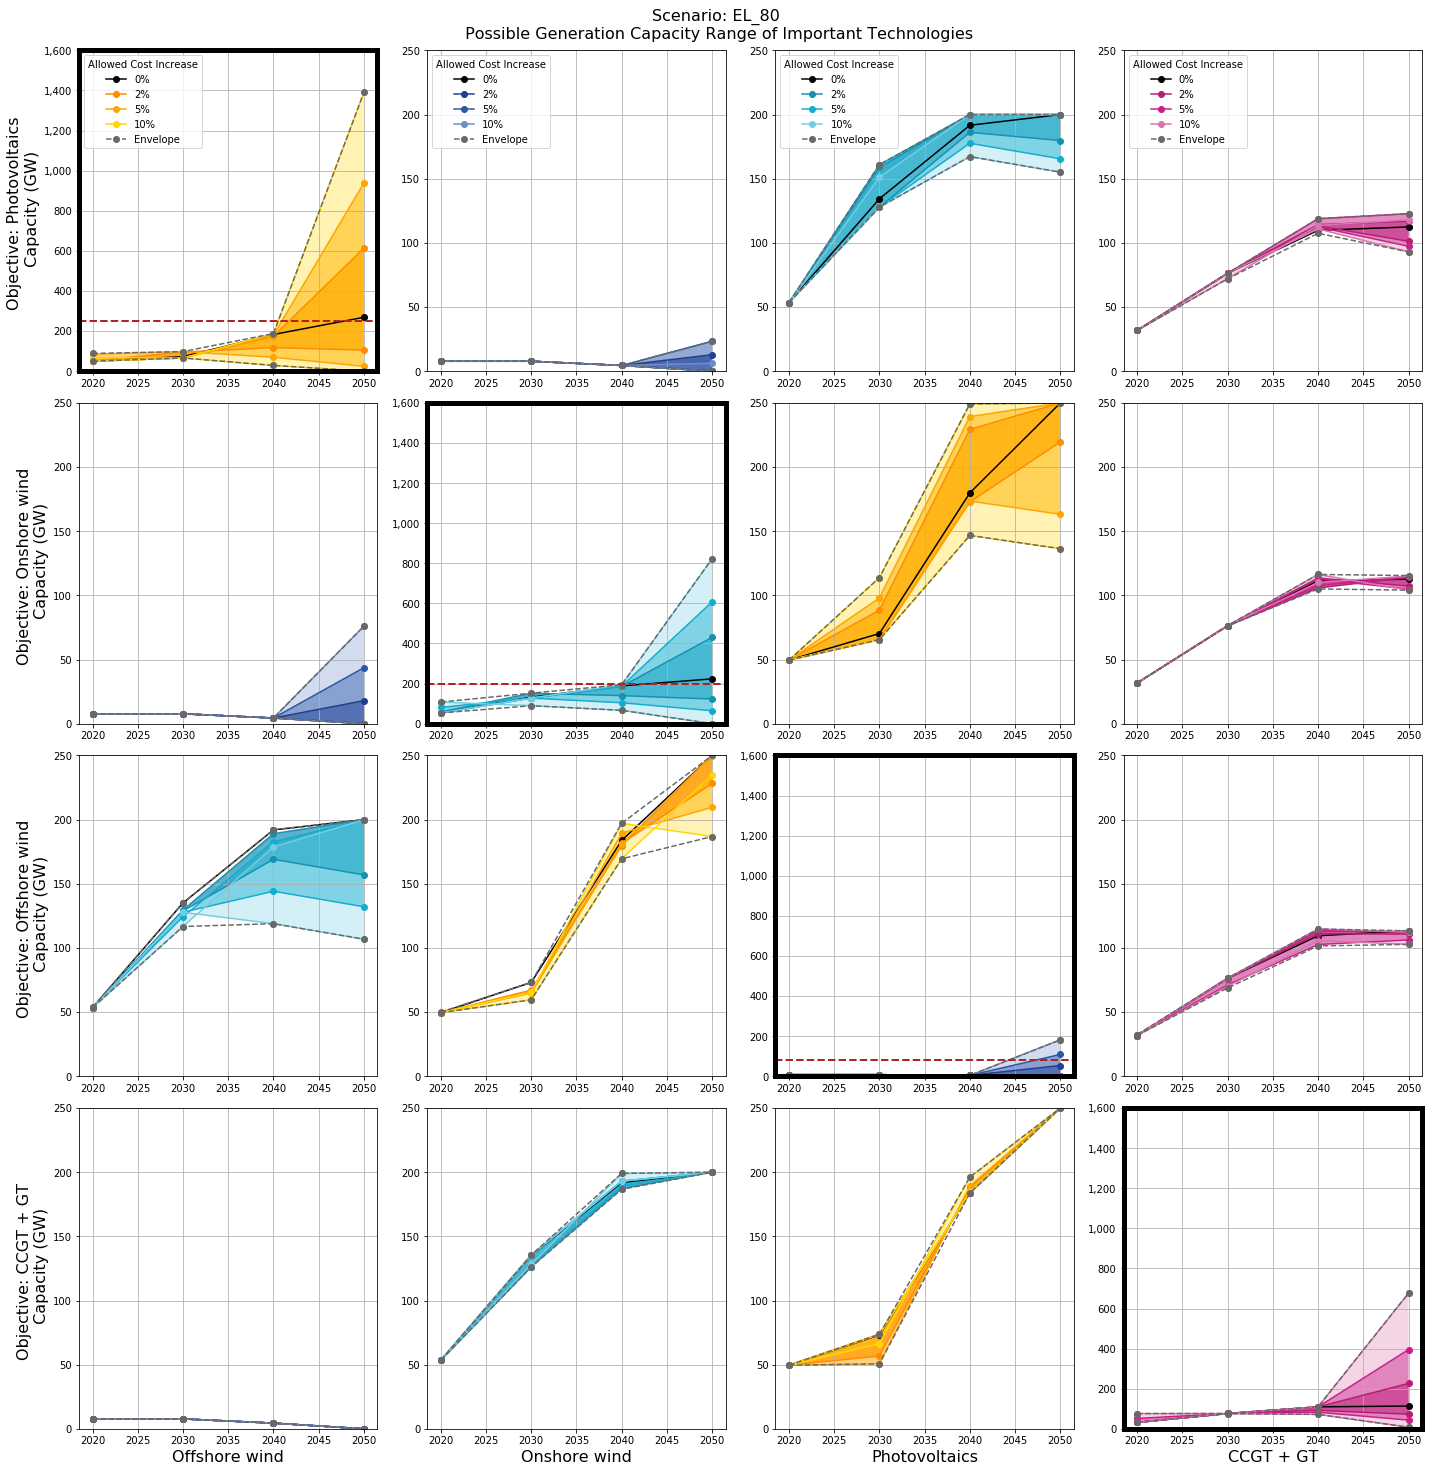

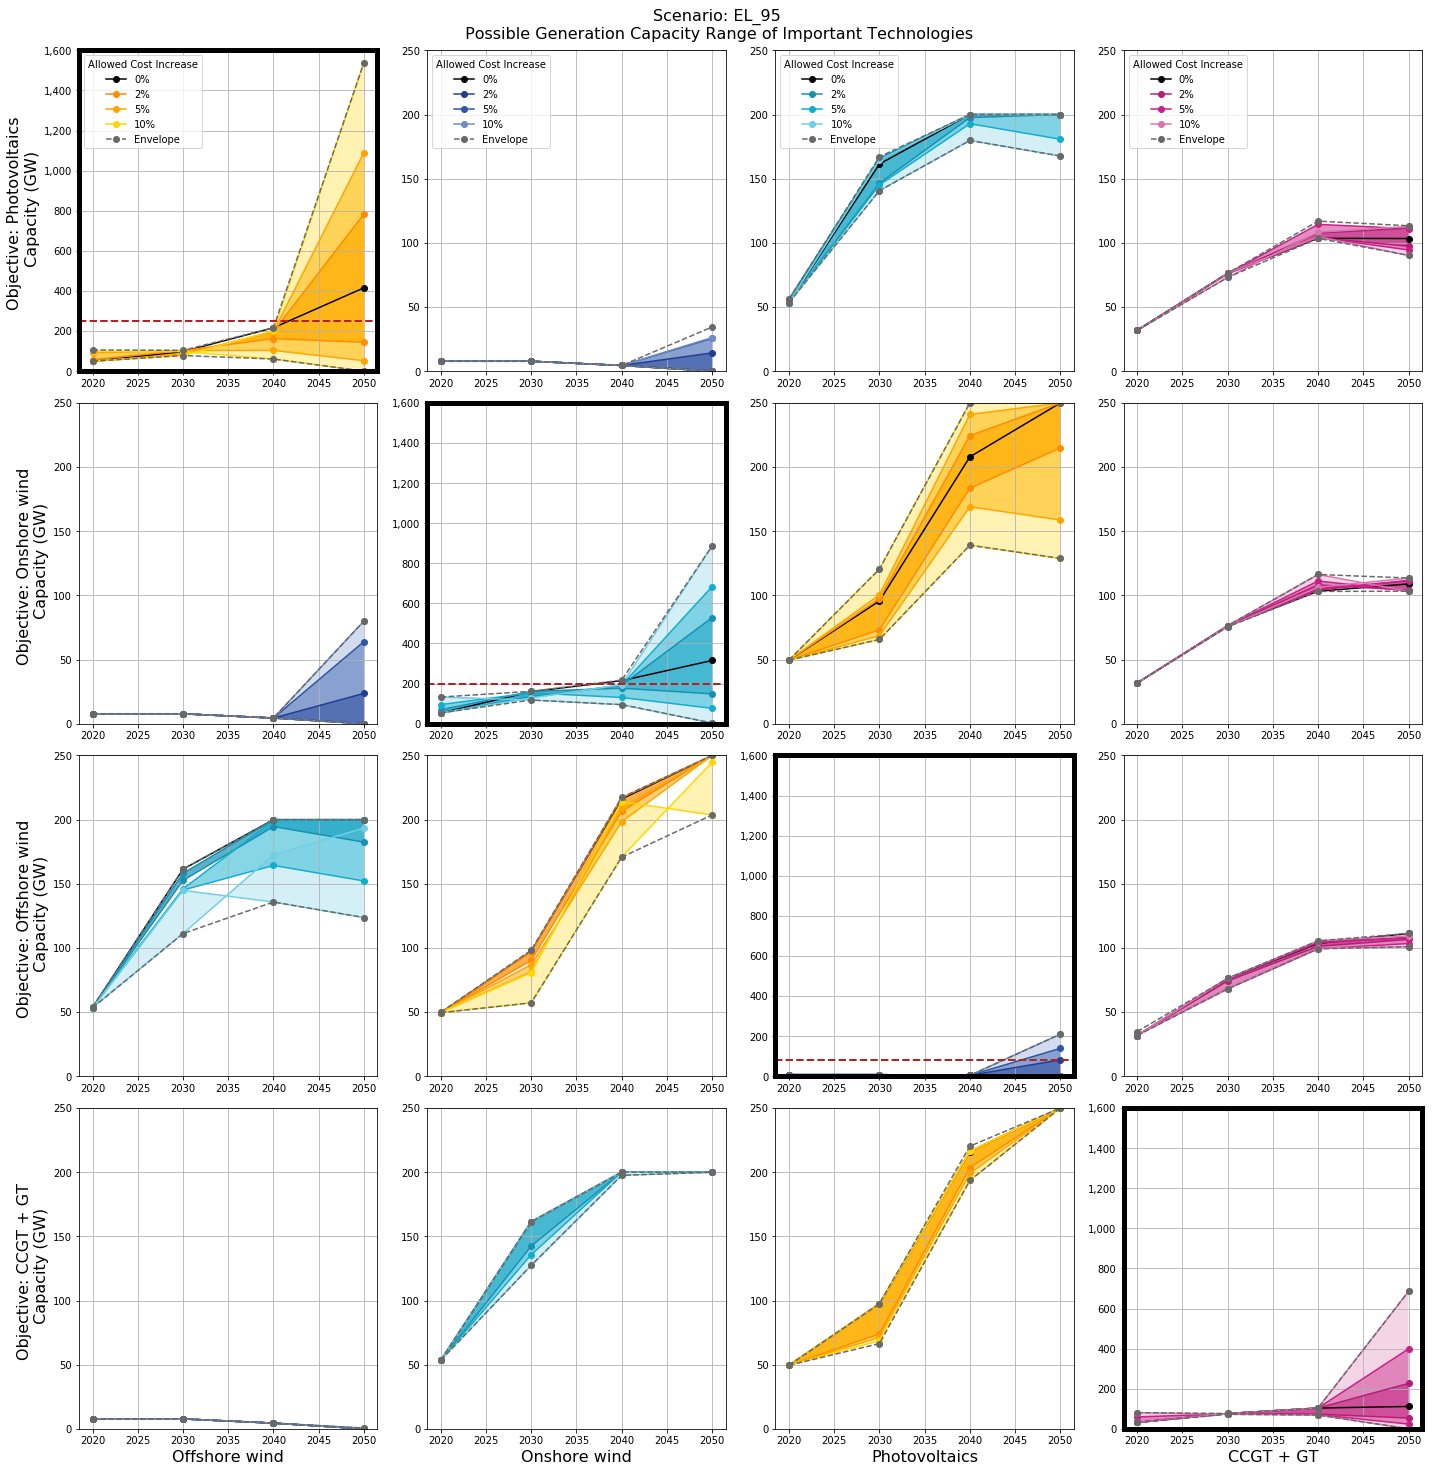

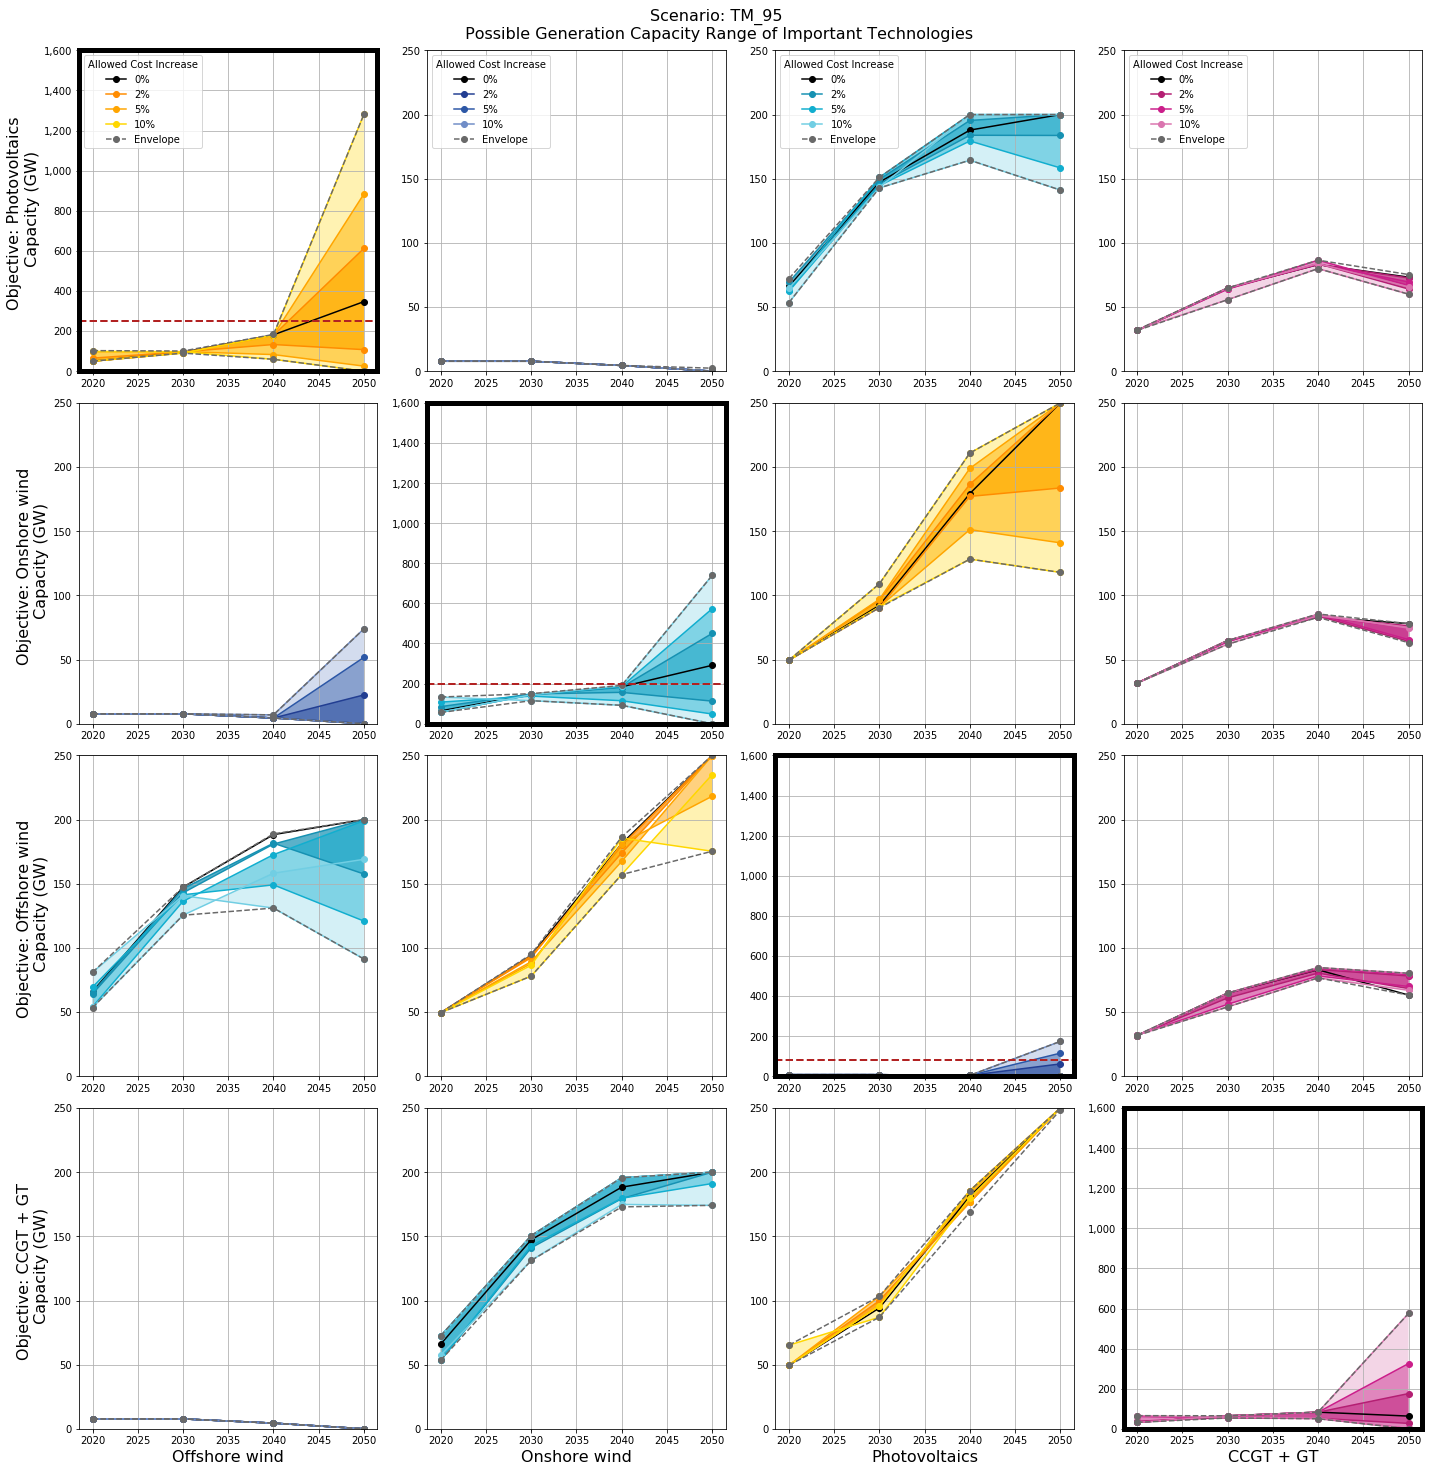

In [15]:
for s in sec:
    scenario_dfs=sce_dict[s]
    result_dir= result_dict[s]    
    fig, ((axd1,ax1,ax2,ax3),(ax4,axd2,ax5,ax6),(ax7,ax8,axd3,ax9),(ax10,ax11,ax12,axd4)) = plt.subplots(4,4,figsize=(20,20))
    axes_all=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]
    axes_d=[axd1,axd2,axd3,axd4]
    for k,df in enumerate(scenario_dfs):
        axes=axes_all[k*3:k*3+3]
        axd=axes_d[k]
        objective_info= df.obj.values[0]
        changing_cap=obj_list.copy()
        changing_cap.remove(objective_info)

        slack_to_plot=[0,2,5,10]


        df_line_plot= df[df.Process == objective_info].copy(deep=True)
        plot_df0= df_line_plot.groupby('Stf').agg({"Capacities": {"min": np.min, "max": np.max}})
        plot_df0.columns=plot_df0.columns.droplevel(0)
        plot_df0=plot_df0.reset_index()
        data10 = df_line_plot[df_line_plot.Objective=='Min']
        data20 = df_line_plot[df_line_plot.Objective == 'Max']

        for i, sl in enumerate(sorted(slack_to_plot)):

            line10, = axd.plot('Stf', 'Capacities', data=data10[data10.Slack == sl], color=to_shade(shade[objective_info][i]),
                             label='{}%'.format(sl), marker='o')
            line20, = axd.plot('Stf', 'Capacities', data=data20[data20.Slack == sl], color=to_shade(shade[objective_info][i]),
                             label='_{}%'.format(sl), marker='o')
            if not sl==0:
                axd.fill_between(data10[data10.Slack == sl].Stf, data10[data10.Slack == sl].Capacities,
                                data20[data20.Slack == sl].Capacities,
                                facecolor=to_shade(shade[objective_info][i]), alpha=0.9-(i*2/10))
        line3, = axd.plot('Stf', 'min', data=plot_df0, color='dimgray', label='Envelope', marker='o',linestyle='--')
        line4, = axd.plot('Stf', 'max', data=plot_df0, color='dimgray', label='_Envelope',marker='o',linestyle='--')
        for axis in ['top','bottom','left','right']:
            axd.spines[axis].set_linewidth(5) 
        axd.grid()
        axd.set_ylim(-100, 1600000)
        axd.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x) // 1000, ',')))
        if objective_info=='Photovoltaics':
            axd.axhline(y=250000,color='firebrick',linestyle='--',linewidth=2)
        elif objective_info=='Onshore wind':
            axd.axhline(y=200000,color='firebrick',linestyle='--',linewidth=2)
        elif objective_info=='Offshore wind':
            axd.axhline(y=80000,color='firebrick',linestyle='--',linewidth=2)
        if k==0:
            axd.set_ylabel('Objective: '+ objective_info + ' \n Capacity (GW)',fontsize=16)
        if k==3:
            axd.set_xlabel('CCGT + GT',fontsize=16)


        df_cap_plot= df.copy(deep=True)
        df_cap_plot = df_cap_plot[df_cap_plot.Process.isin(changing_cap)]

        for j, item in enumerate(changing_cap):
            ax=axes[j]
            plot_df= df_cap_plot[df_cap_plot.Process == item].groupby('Stf').agg({"Capacities": {"min": np.min, "max": np.max}})
            plot_df.columns=plot_df.columns.droplevel(0)
            plot_df=plot_df.reset_index()
            df_line_plot=df_cap_plot[df_cap_plot.Process == item].copy(deep=True)
            data1 = df_line_plot[df_line_plot.Objective=='Min']
            data2 = df_line_plot[df_line_plot.Objective == 'Max']
            for i, sl in enumerate(sorted(slack_to_plot)):

                line1, = ax.plot('Stf', 'Capacities', data=data1[data1.Slack == sl], color=to_shade(shade[item][i]),
                             label='{}%'.format(sl), marker='o')
                line2, = ax.plot('Stf', 'Capacities', data=data2[data2.Slack == sl], color=to_shade(shade[item][i]),
                             label='_{}%'.format(sl), marker='o')
                if not sl==0:
                       ax.fill_between(data1[data1.Slack == sl].Stf, data1[data1.Slack == sl].Capacities,
                               data2[data2.Slack == sl].Capacities,
                                facecolor=to_shade(shade[item][i]), alpha=0.9-(i*2/10))

            line3, = ax.plot('Stf', 'min', data=plot_df, color='dimgray', label='Envelope', marker='o',linestyle='--')
            line4, = ax.plot('Stf', 'max', data=plot_df, color='dimgray', label='_Envelope',marker='o',linestyle='--')

            ax.grid()

            ax.set_xticks(list(data1.Stf.unique()), list(str(int(x)) for x in list(data1.Stf.unique())))

            #ax.set_title('Scenario:'+scenario+ '\n Near Cost Optimal Intertemporal Solution', fontsize=16,
             #        pad=15)  #
            ax.set_ylim(0, 250000)
            ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x) // 1000, ',')))
            if ax in [ax10,ax11,ax12,axd4]:
                ax.set_xlabel(item,fontsize=16)
            if ax in [ax4,ax7,ax10]:
                ax.set_ylabel('Objective: '+ objective_info + ' \n Capacity (GW)',fontsize=16)
            if ax in [ax1,ax2,ax3]:
                ax.legend(loc='upper left', title='Allowed Cost Increase')
    axd1.legend(loc='upper left', title='Allowed Cost Increase')
    plt.suptitle('Scenario: '+s+ '\n Possible Generation Capacity Range of Important Technologies',y=1.02,fontsize=16 )
             #        pad=15) 
    fig_filename = os.path.join(root,'result_plots','Envelopes',s+'all_envelope_plot.png')
    fig.savefig(fig_filename, bbox_inches='tight')

        #plt.close(fig)


### SINGLE FEASIBLE SPACE

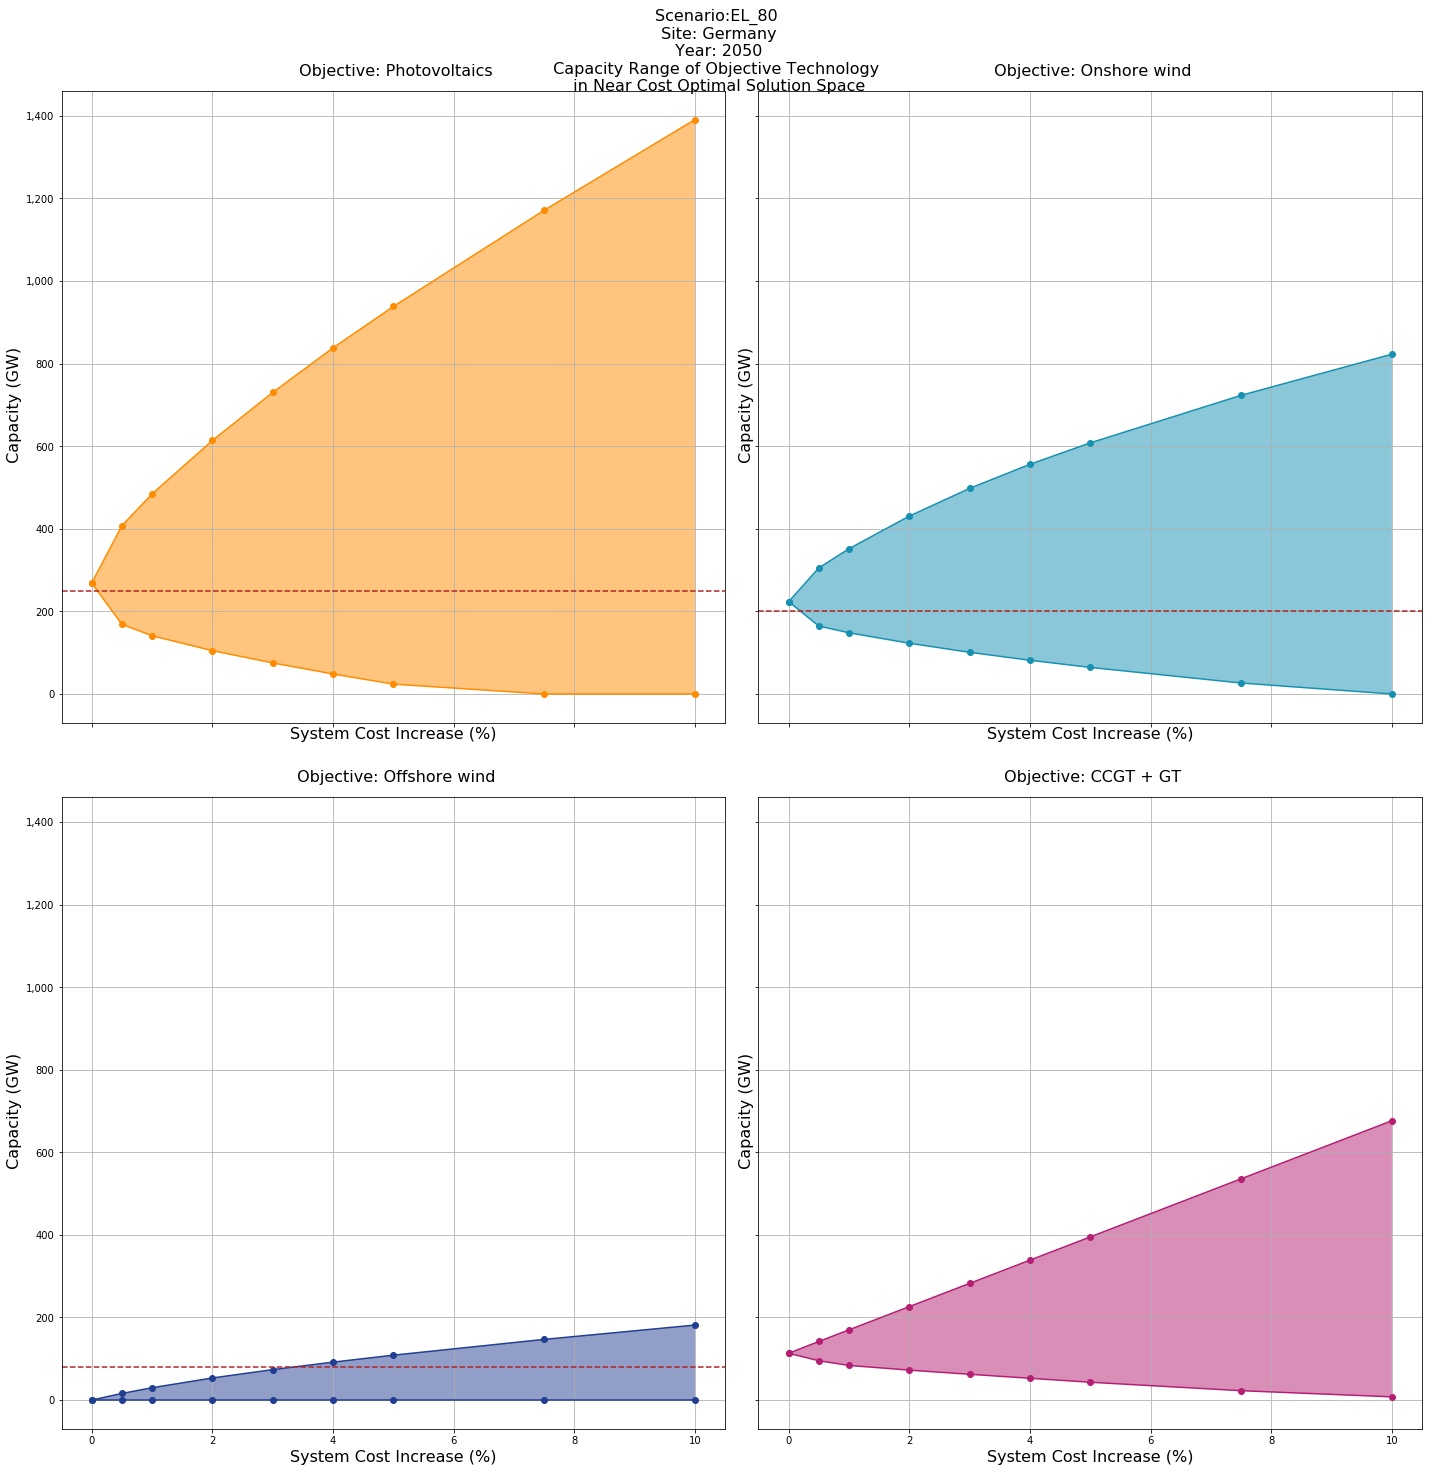

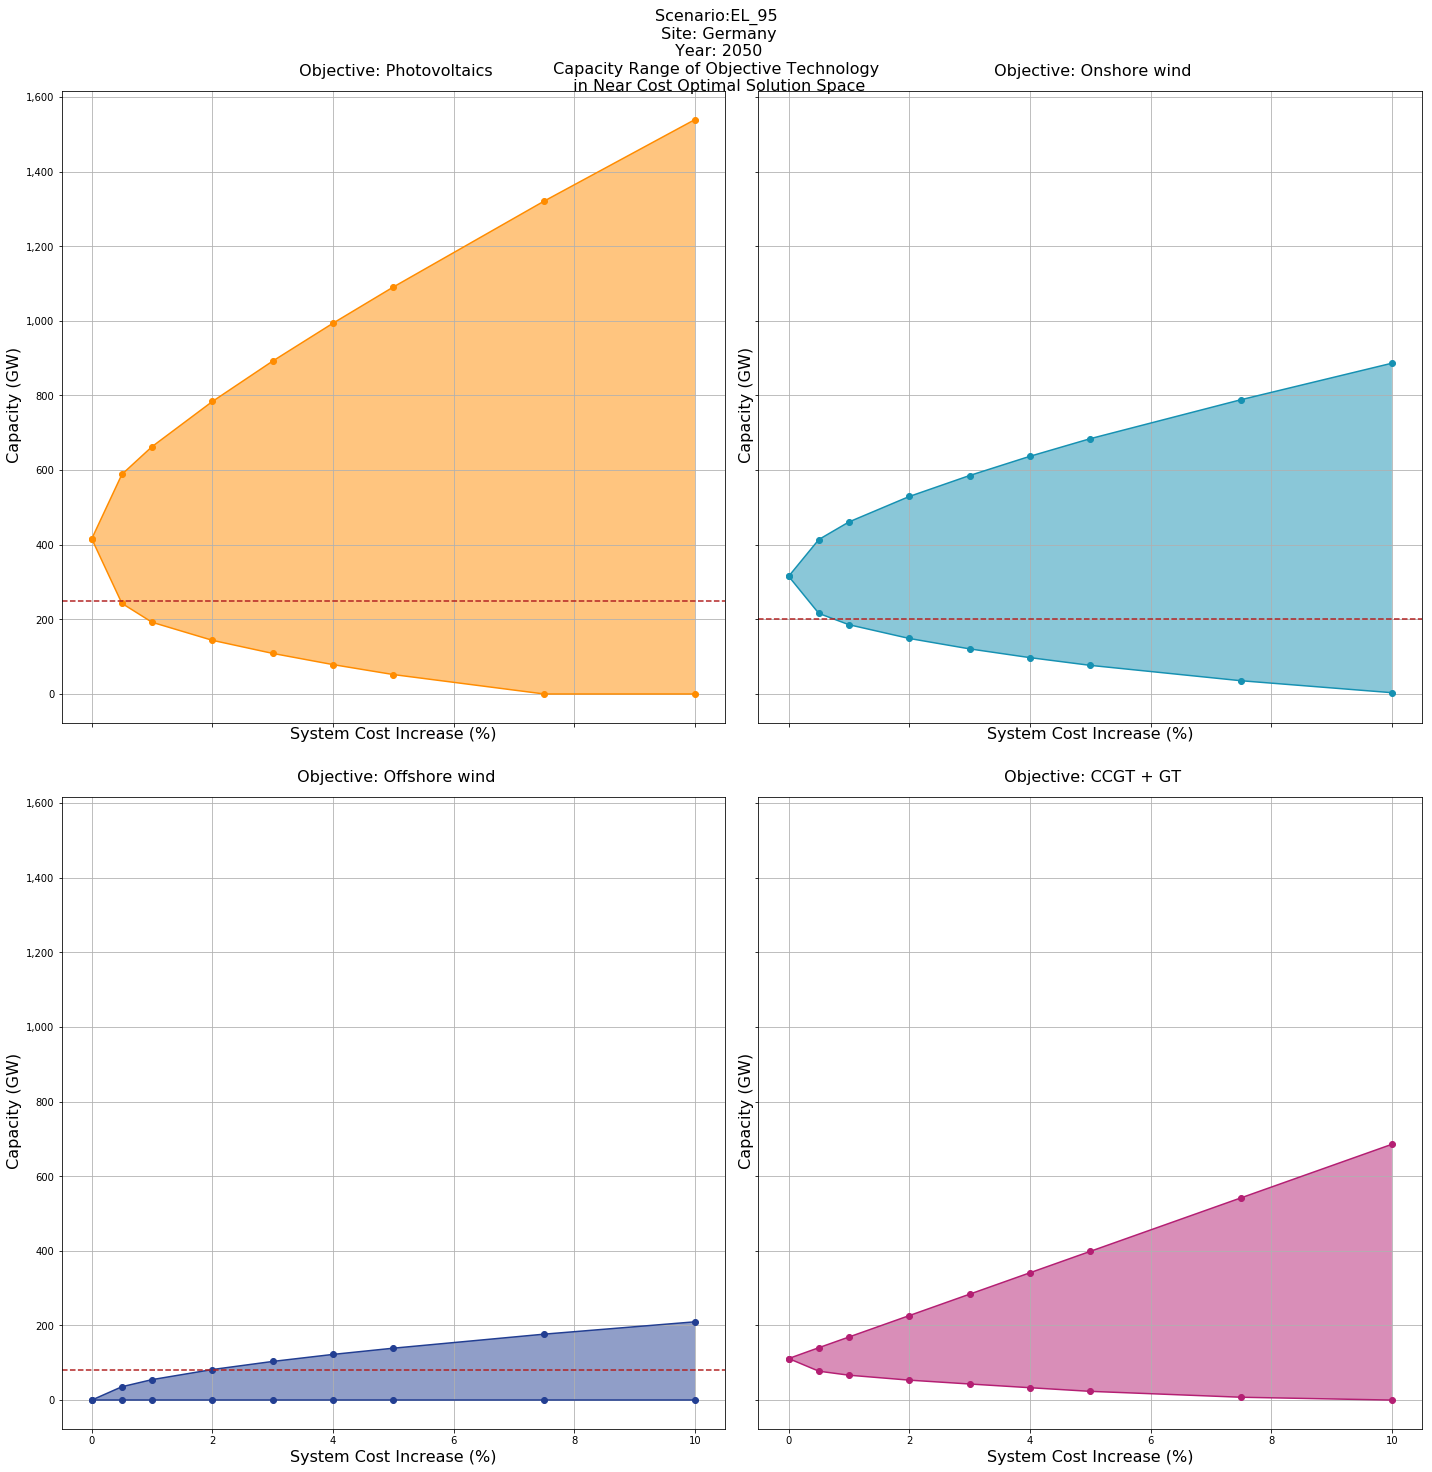

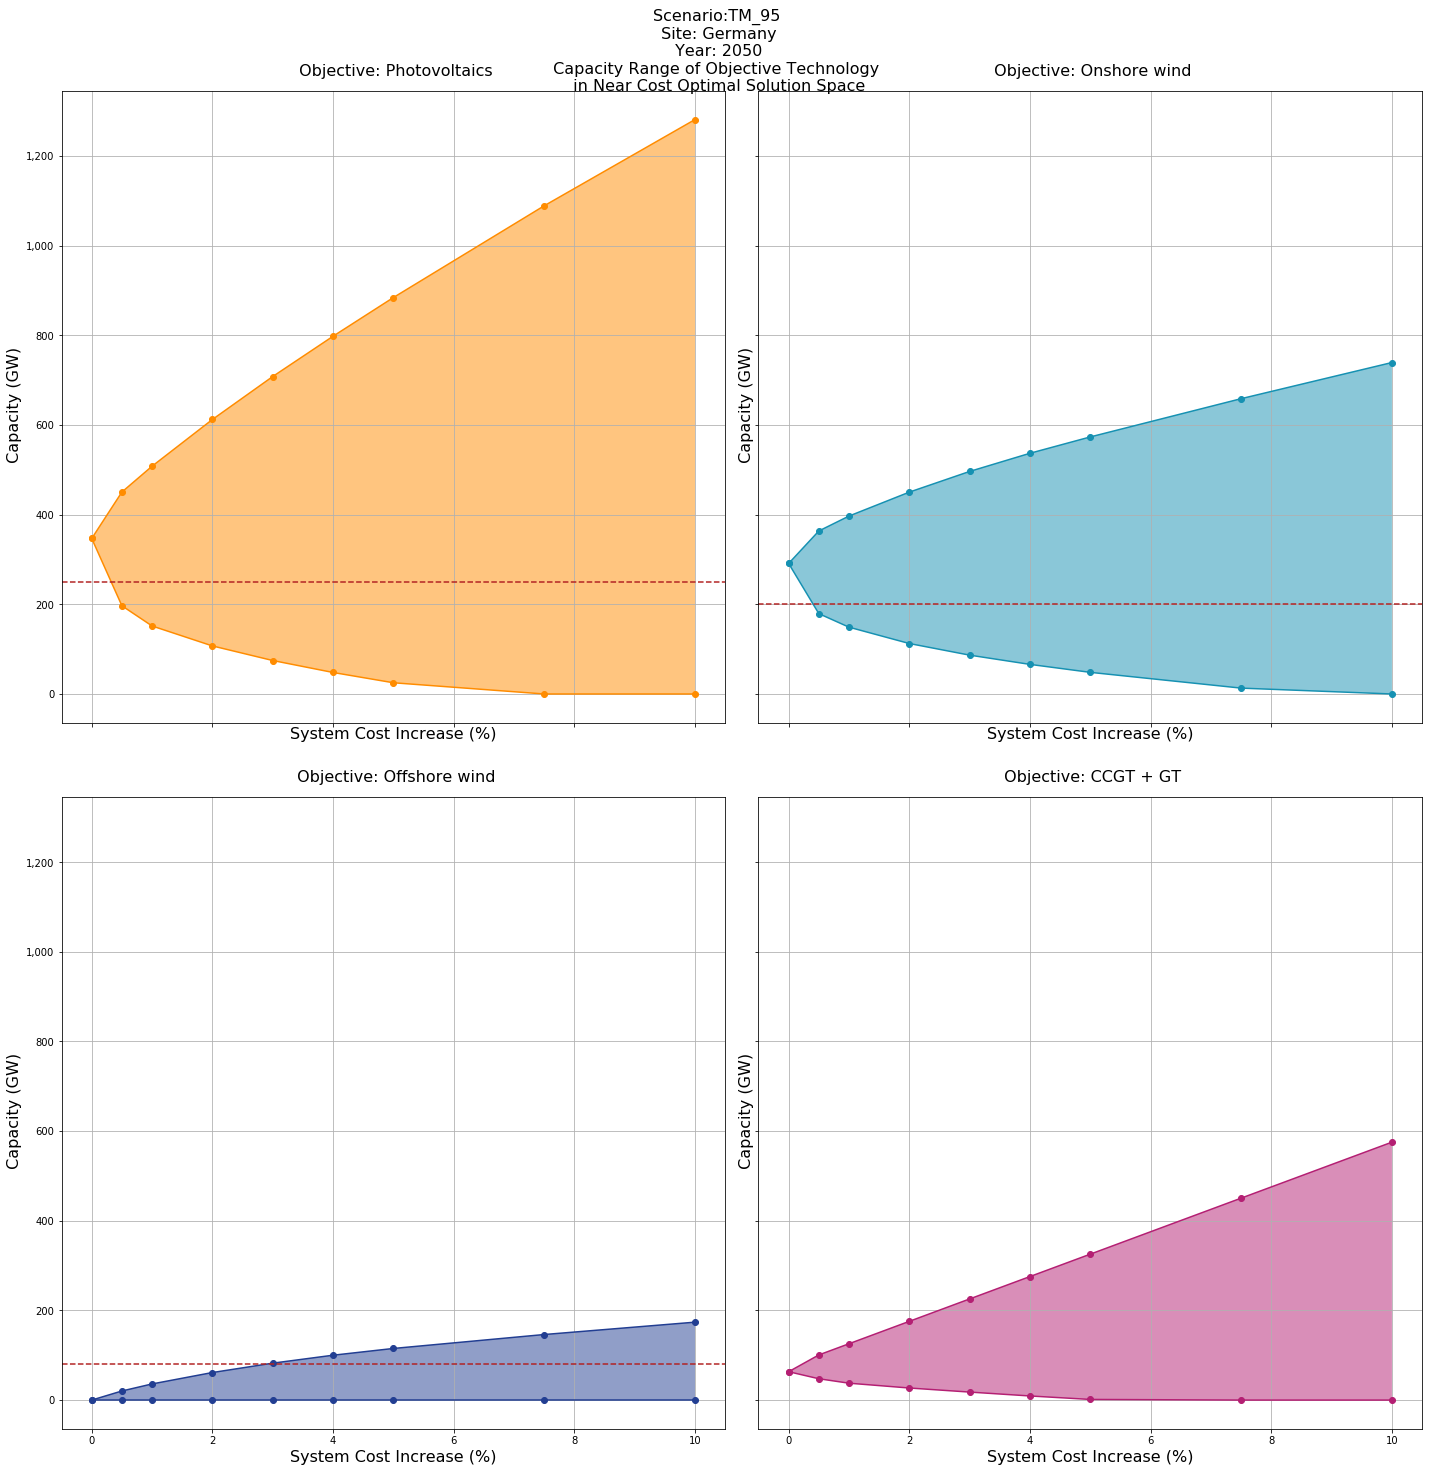

In [16]:
for s in sec:
    scenario_dfs=sce_dict[s]
    result_dir= result_dict[s]    
    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,20), sharex=True,sharey=True)
    axes=[ax1,ax2,ax3,ax4]
    for j,df in enumerate(scenario_dfs):
        ax=axes[j]
        objective_info= df.obj.values[0]

        year= 2050

        df_objective_plot= df[(df.Process == objective_info) & (df.Stf==year)].copy(deep=True)

        data1 = df_objective_plot[df_objective_plot.Objective=='Min']
        data2 = df_objective_plot[(df_objective_plot.Objective == 'Max')|(df_objective_plot.Slack==0)]


        line1, = ax.plot('Slack', 'Capacities', data=data1, color=to_color(objective_info),
                              label='Minimize',marker='o')
        line2, = ax.plot('Slack', 'Capacities', data=data2, color=to_color(objective_info),
                            label='Maximize',marker='o')

        ax.fill_between(data1.Slack, data1.Capacities,
                                data2.Capacities,
                                facecolor=to_color(objective_info), alpha=0.5)

        #ax.legend(loc='best', title='Objective')
        ax.grid()
        ax.set_xlabel('System Cost Increase (%)', fontsize=16)
        #plt.xticks(list(data1.Slack.unique()), list(str(int(x)) for x in list(data1.Stf.unique())))
        ax.set_ylabel(' Capacity (GW)', fontsize=16)
        ax.set_title( '\n Objective: '+objective_info, fontsize=16,pad=15)  #
        #ax.set_ylim(0, df.Capacities.max()+200000)
        ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x) // 1000, ',')))
        if objective_info=='Photovoltaics':
            ax.axhline(y=250000,color='firebrick',linestyle='--')
        elif objective_info=='Onshore wind':
            ax.axhline(y=200000,color='firebrick',linestyle='--')
        elif objective_info=='Offshore wind':
            ax.axhline(y=80000,color='firebrick',linestyle='--')
        fig_filename = os.path.join(result_dir,'Objected_capacity_2050.png')
        #fig.savefig(fig_filename, bbox_inches='tight')
        #plt.close(fig)
    plt.suptitle('Scenario:'+s+ '\n Site: Germany' + '\n Year: '+ str(year) + '\n Capacity Range of Objective Technology \n in Near Cost Optimal Solution Space',y=1.02,fontsize=16 )
             #        pad=15) 
    fig_filename = os.path.join(result_dir,'Objected_2050.png')
    fig.savefig(fig_filename, bbox_inches='tight')


### PV - Onshore min-max 2050

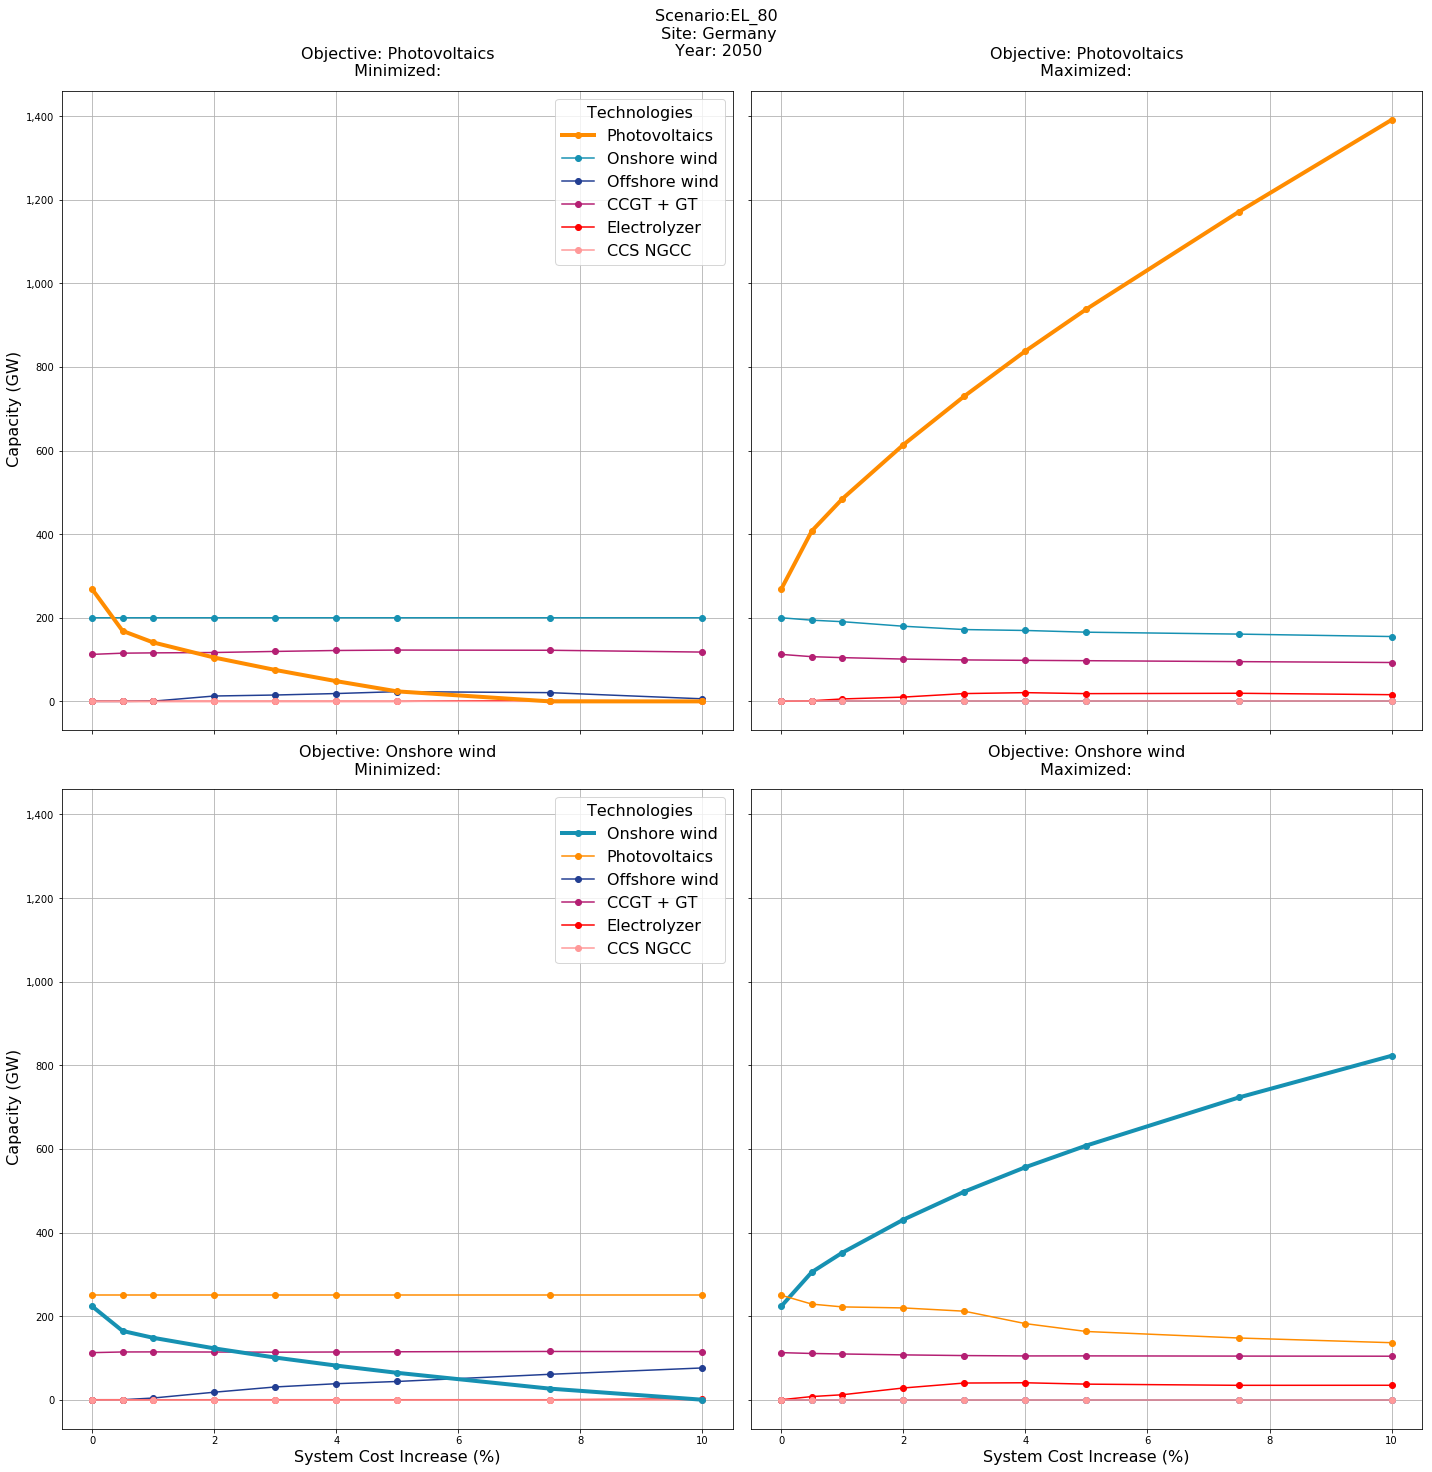

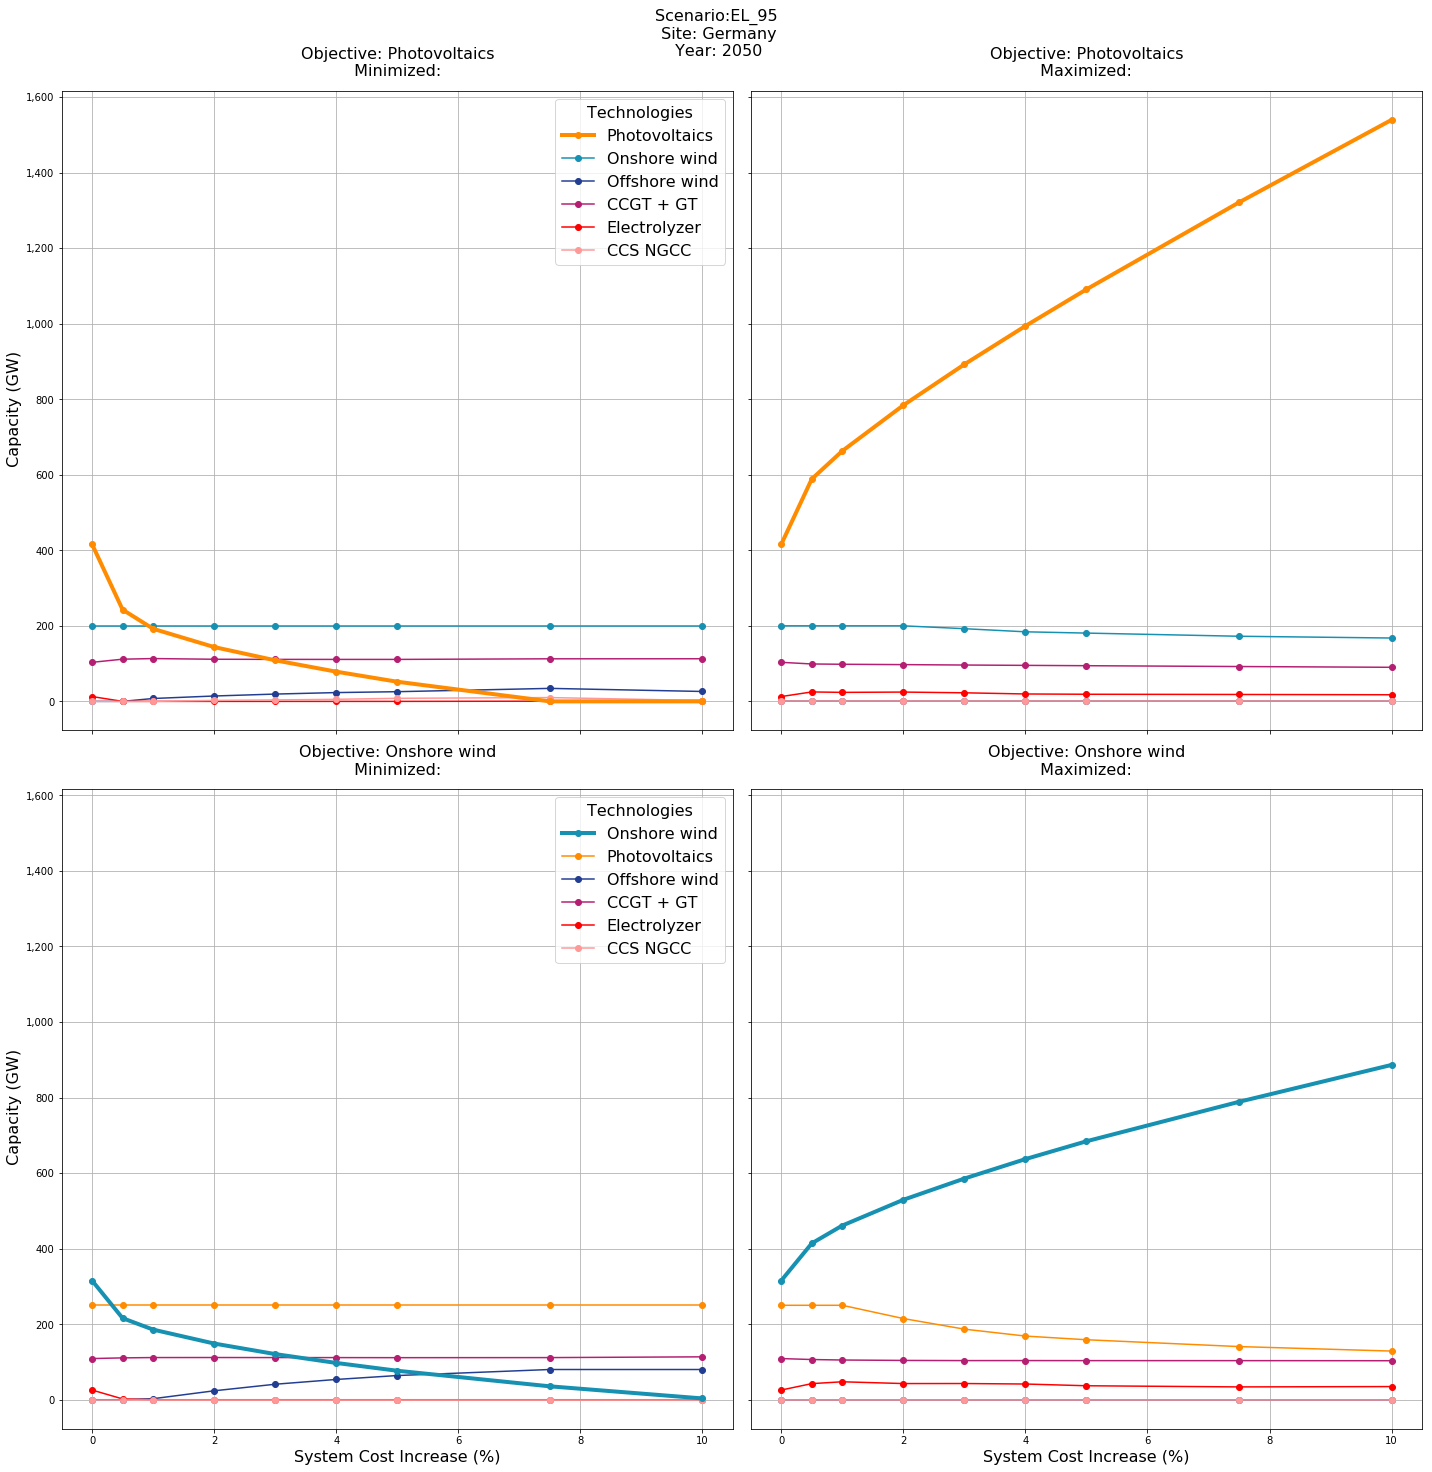

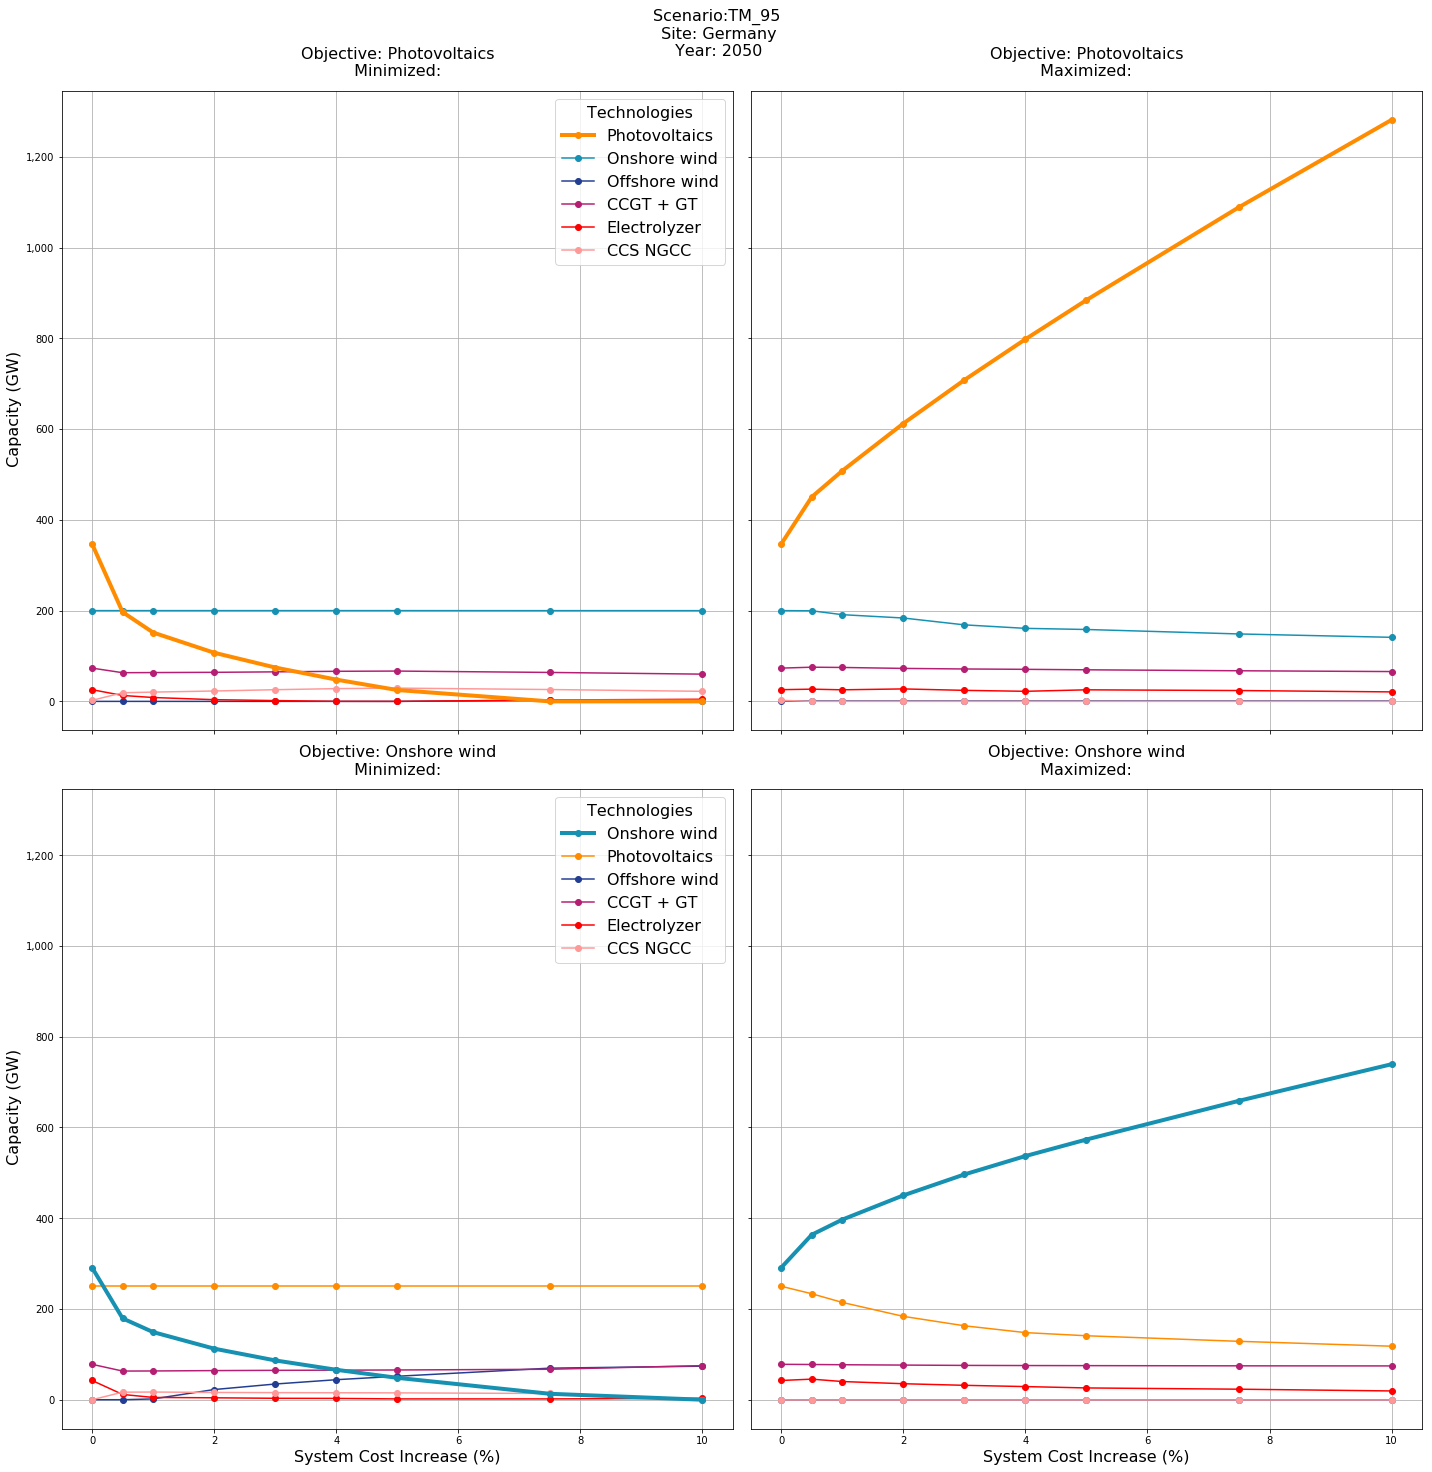

In [17]:
for s in sec:
    scenario_dfs=sce_dict[s]
    result_dir= result_dict[s]    
    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,20), sharex=True,sharey=True)
    axes=[ax1,ax2,ax3,ax4]
    for j,df in enumerate(scenario_dfs[:2]):
        ax_1=axes[j*2]
        ax_2=axes[j*2+1]
        objective_info= df.obj.values[0]
        changing_cap=changing_cap_raw.copy()
        changing_cap.remove(objective_info)  

        year= 2050

        df_objective_plot= df[(df.Process == objective_info) & (df.Stf==year)].copy(deep=True)

        data1 = df_objective_plot[df_objective_plot.Objective=='Min']
        data2 = df_objective_plot[(df_objective_plot.Objective == 'Max')|(df_objective_plot.Slack==0)]

        line1, = ax_1.plot('Slack', 'Capacities', data=data1, color=to_color(objective_info),
                              label=objective_info,marker='o',linewidth=4, zorder=10)
        line2, = ax_2.plot('Slack', 'Capacities', data=data2, color=to_color(objective_info),
                            label=objective_info,marker='o',linewidth=4)

        for item in changing_cap:
            df_other_plot= df[(df.Process == item) & (df.Stf==year)].copy(deep=True)

            data1_o = df_other_plot[df_other_plot.Objective=='Min']
            data2_o = df_other_plot[(df_other_plot.Objective == 'Max')|(df_other_plot.Slack==0)]

            line3, = ax_1.plot('Slack', 'Capacities', data=data1_o, color=to_color(item),
                              label= item ,marker='o')
            line4, = ax_2.plot('Slack', 'Capacities', data=data2_o, color=to_color(item),
                            label=item,marker='o')


        ax_1.grid()
        ax_2.grid()
        #plt.xticks(list(data1.Slack.unique()), list(str(int(x)) for x in list(data1.Stf.unique())))

        ax_1.set_title( 'Objective: '+objective_info+ '\n Minimized: ', fontsize=16,pad=15)  
        ax_2.set_title( 'Objective: '+objective_info+ '\n Maximized: ', fontsize=16,pad=15)#

        ax_1.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x) // 1000, ',')))
        ax_2.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x) // 1000, ',')))
        #if objective_info=='Photovoltaics':
        #    ax.axhline(y=250000,color='firebrick',linestyle='--')
        #elif objective_info=='Onshore wind':
        #    ax.axhline(y=200000,color='firebrick',linestyle='--')
        #elif objective_info=='Offshore wind':
        #    ax.axhline(y=80000,color='firebrick',linestyle='--')

    ax1.legend(loc='best', title='Technologies',fontsize=16,title_fontsize=16)
    ax3.legend(loc='best', title='Technologies',fontsize=16,title_fontsize=16)
    ax3.set_xlabel('System Cost Increase (%)', fontsize=16)
    ax4.set_xlabel('System Cost Increase (%)', fontsize=16)
    ax1.set_ylabel(' Capacity (GW)', fontsize=16)
    ax3.set_ylabel(' Capacity (GW)', fontsize=16)
    #ax1.set_ylim(0, 260000)
    plt.suptitle('Scenario:'+s+ '\n Site: Germany' + '\n Year: '+ str(year) ,y=1.02,fontsize=16 )
             #        pad=15) 
    fig_filename = os.path.join(result_dir,'onshore_pv_minmax.png')
    fig.savefig(fig_filename, bbox_inches='tight')

### FEASIBLE SPACE LOWER HALF

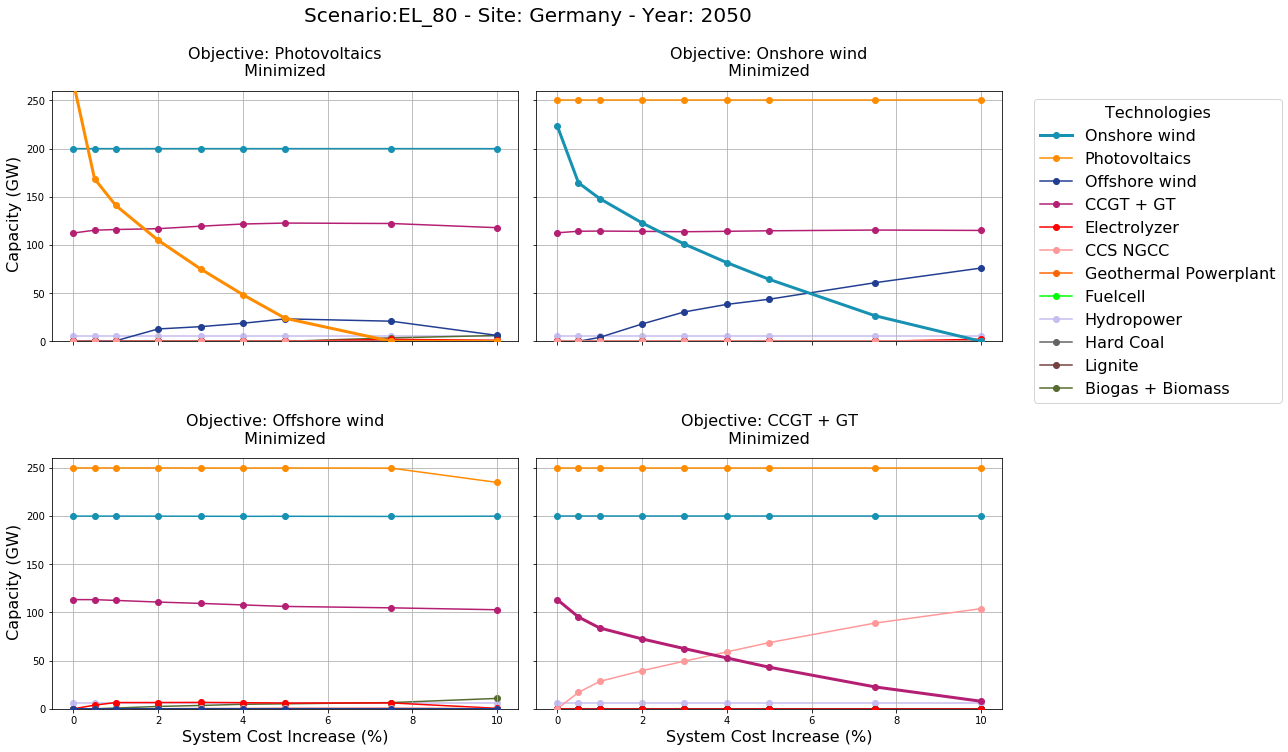

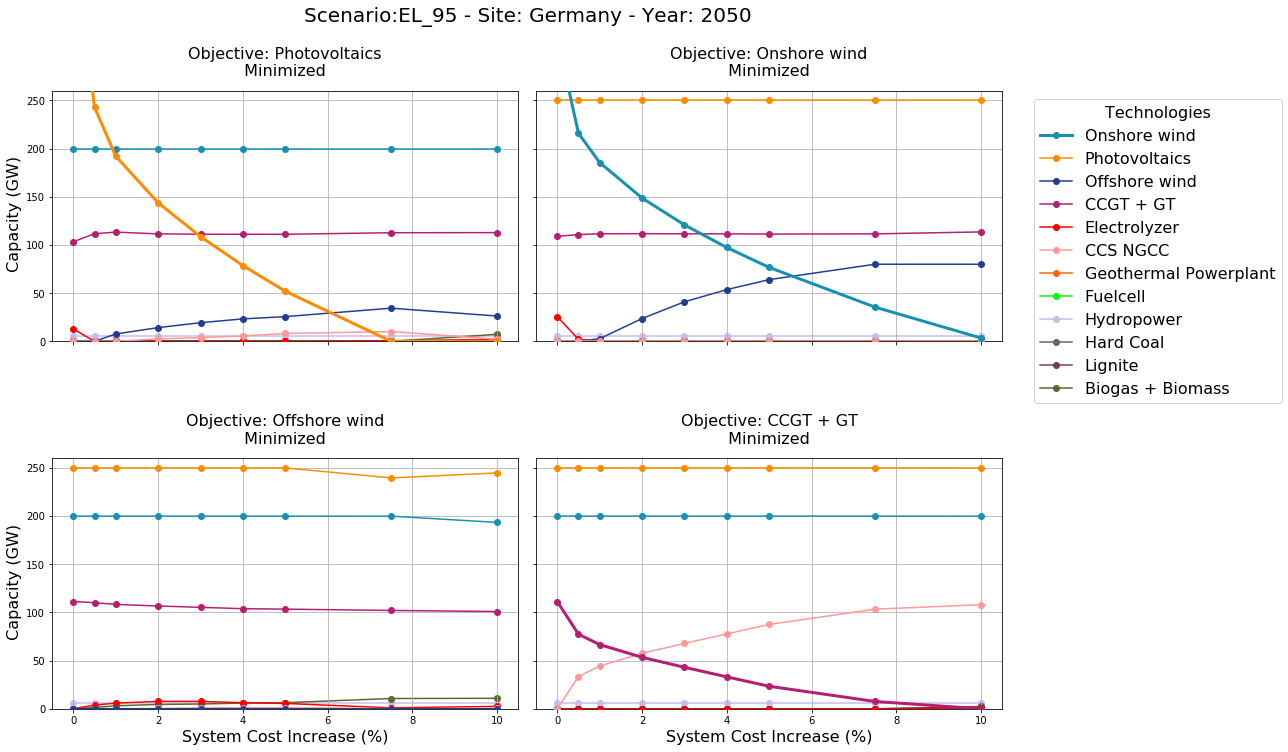

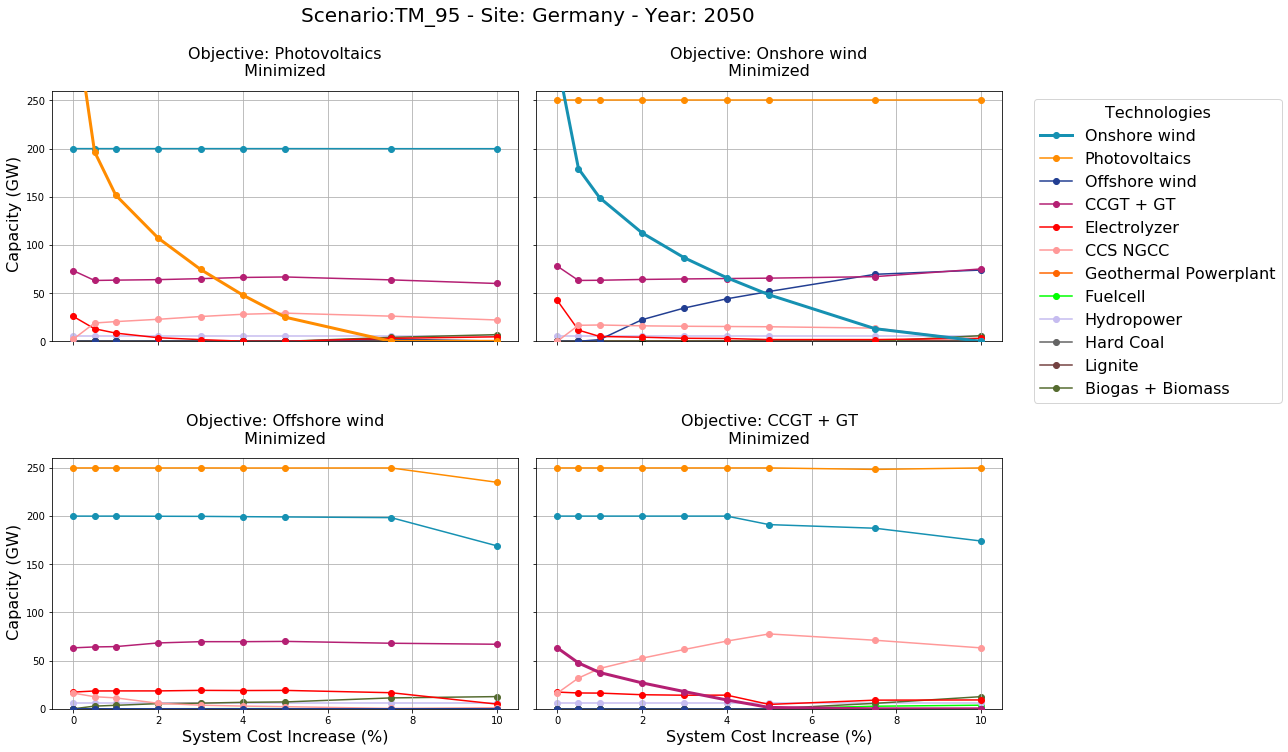

In [18]:
for s in sec:
    scenario_dfs=sce_dict[s]
    result_dir= result_dict[s]    
    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(18,10), sharex=True,sharey=True)
    axes=[ax1,ax2,ax3,ax4]
    for j,df in enumerate(scenario_dfs):
        ax=axes[j]

        objective_info= df.obj.values[0]
        changing_cap=changing_cap_raw.copy()
        changing_cap.remove(objective_info)  

        year= 2050

        df_objective_plot= df[(df.Process == objective_info) & (df.Stf==year)].copy(deep=True)

        data1 = df_objective_plot[df_objective_plot.Objective=='Min']

        line1, = ax.plot('Slack', 'Capacities', data=data1, color=to_color(objective_info),
                              label=objective_info,marker='o',linewidth=3, zorder=10)

        for item in changing_cap:
            df_other_plot= df[(df.Process == item) & (df.Stf==year)].copy(deep=True)

            data1_o = df_other_plot[df_other_plot.Objective=='Min']

            line3, = ax.plot('Slack', 'Capacities', data=data1_o, color=to_color(item),
                              label= item ,marker='o',zorder=5)

        for item in constant_cap:

            df_other_plot_2= df[(df.Process == item) & (df.Stf==year)].copy(deep=True)

            data1_o2 = df_other_plot_2[df_other_plot_2.Objective=='Min']

            line4, = ax.plot('Slack', 'Capacities', data=data1_o2, color=to_color(item),
                              label= item ,marker='o', zorder=0)

        ax.grid()

        #plt.xticks(list(data1.Slack.unique()), list(str(int(x)) for x in list(data1.Stf.unique())))

        ax.set_title( 'Objective: '+objective_info+ '\n Minimized ', fontsize=16,pad=15)  


        ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x) // 1000, ',')))

        #if objective_info=='Photovoltaics':
        #    ax.axhline(y=250000,color='firebrick',linestyle='--')
        #elif objective_info=='Onshore wind':
        #    ax.axhline(y=200000,color='firebrick',linestyle='--')
        #elif objective_info=='Offshore wind':
        #    ax.axhline(y=80000,color='firebrick',linestyle='--')

    ax2.legend(title='Technologies',fontsize=16,title_fontsize=16,bbox_to_anchor=(1.05, 1), loc='upper left')

    ax3.set_xlabel('System Cost Increase (%)', fontsize=16)
    ax4.set_xlabel('System Cost Increase (%)', fontsize=16)
    ax1.set_ylabel(' Capacity (GW)', fontsize=16)
    ax3.set_ylabel(' Capacity (GW)', fontsize=16)
    ax1.set_ylim(0, 260000)
    plt.suptitle('Scenario:'+s+ ' - Site: Germany' + ' - Year: '+ str(year) ,x=0.41,y=1.04,fontsize=20 )
             #        pad=15) 
    fig_filename = os.path.join(root,'result_plots','Envelopes',s+'min_all.png')
    fig.savefig(fig_filename, bbox_inches='tight')

### NO EXPANSION SLACK

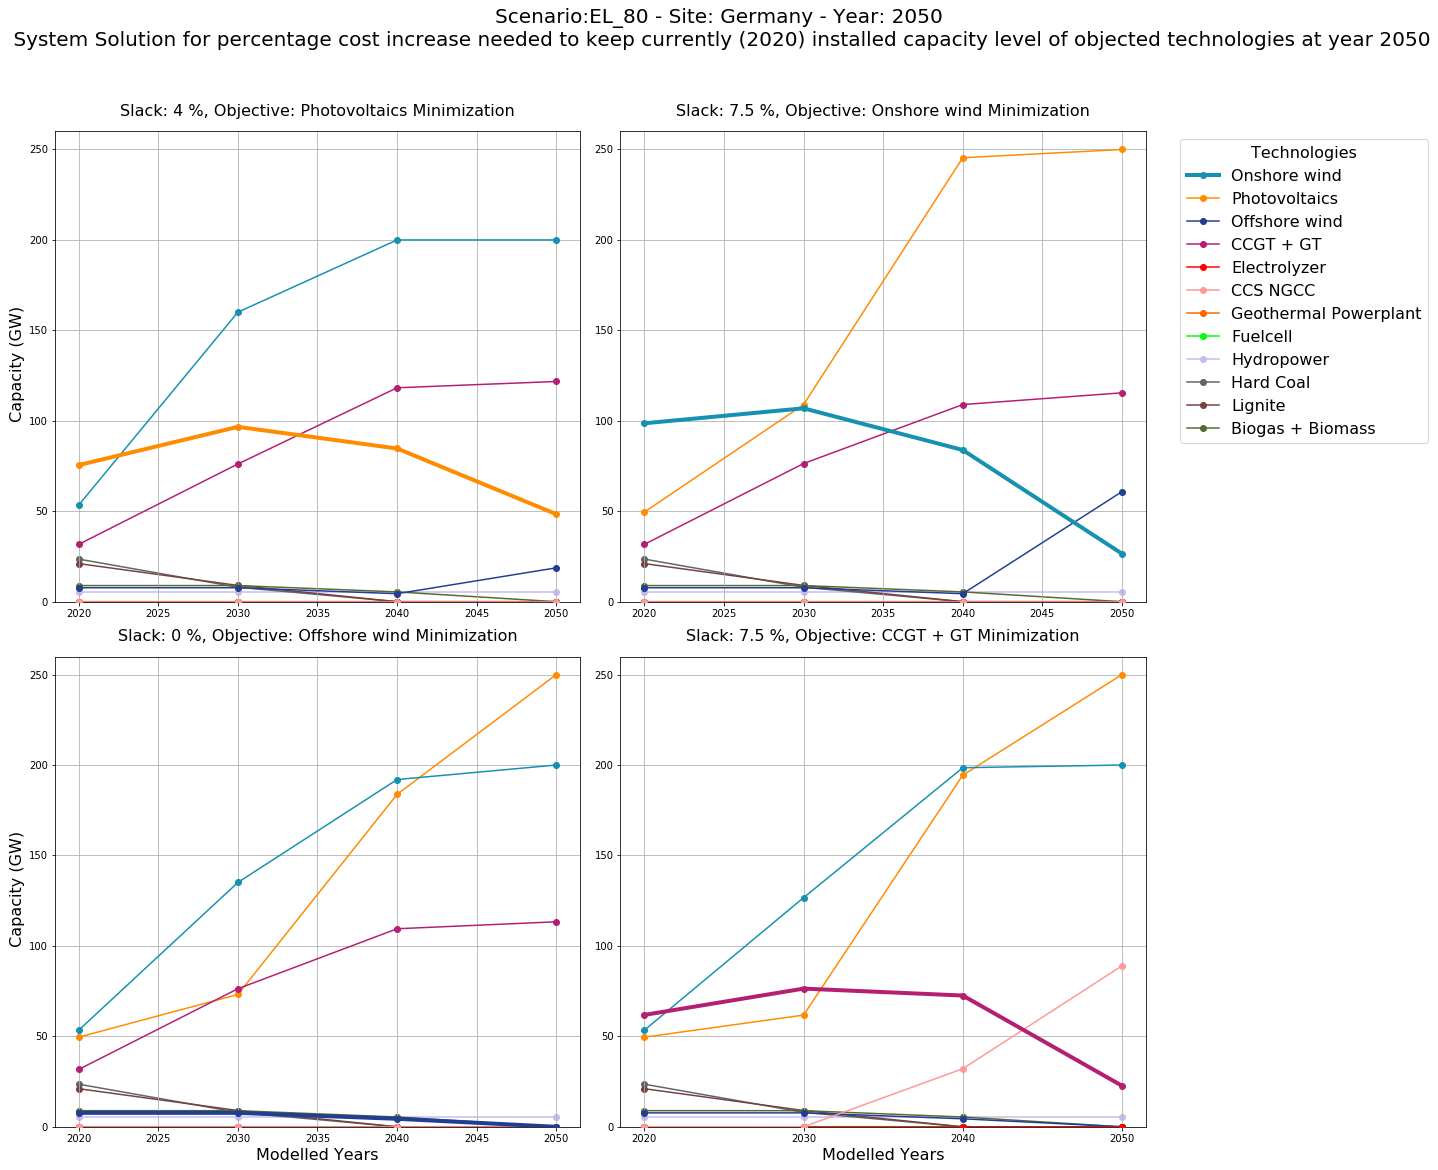

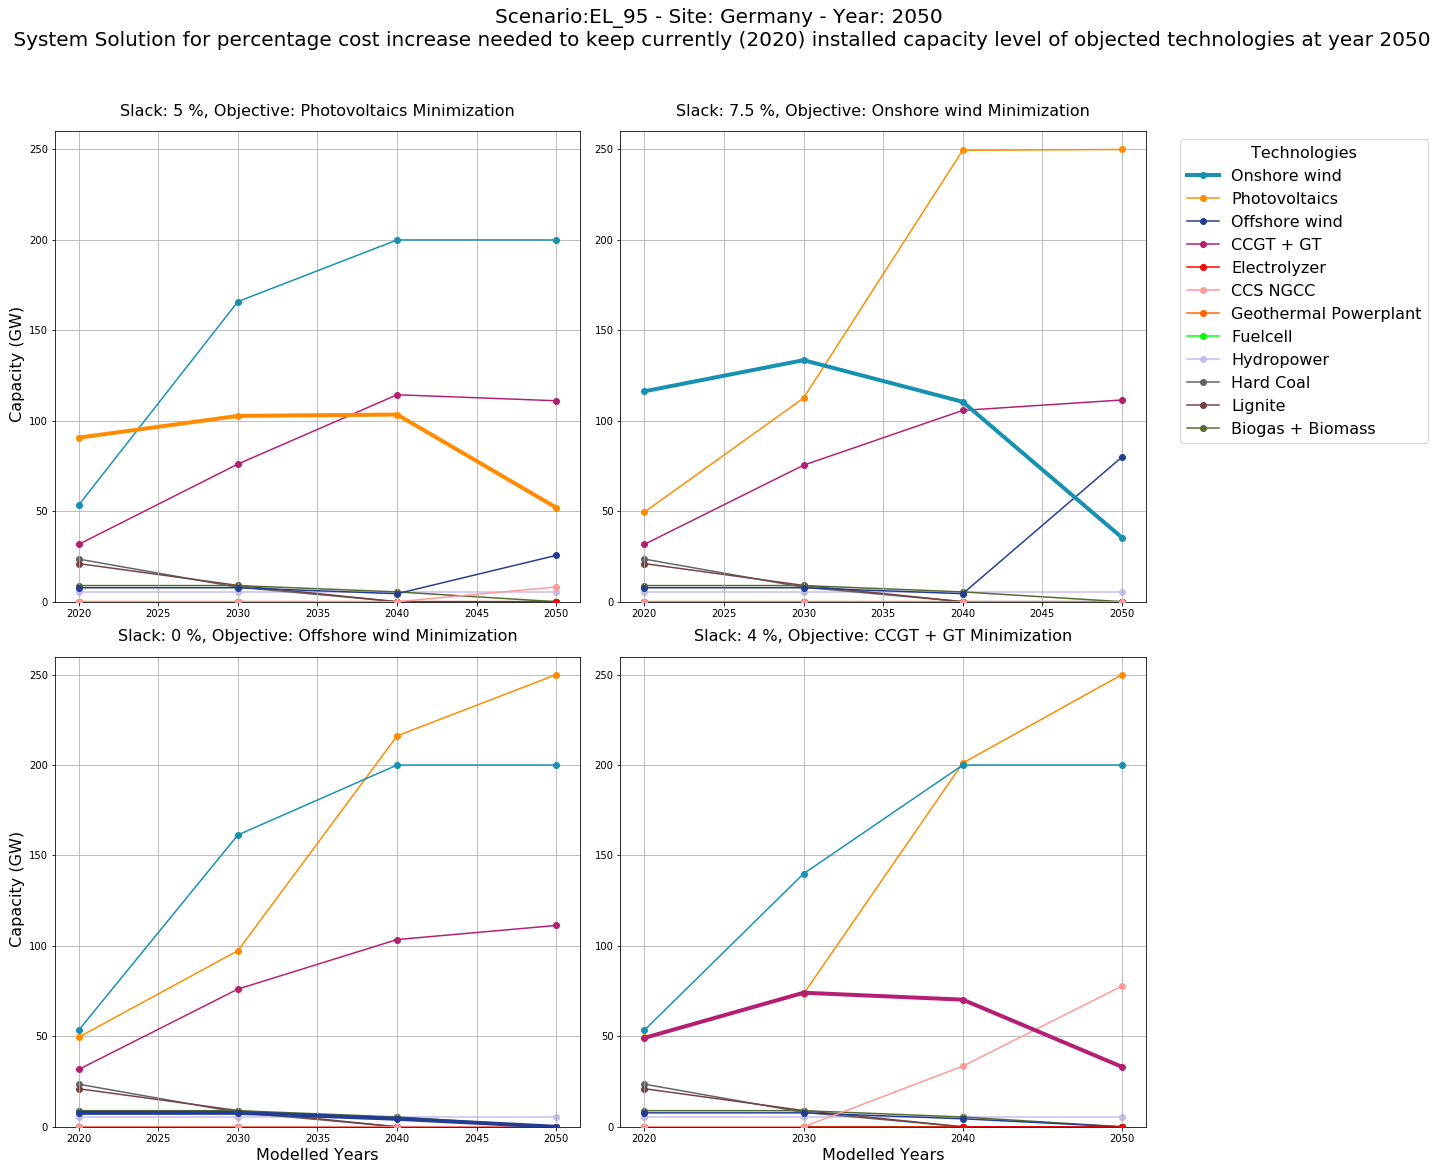

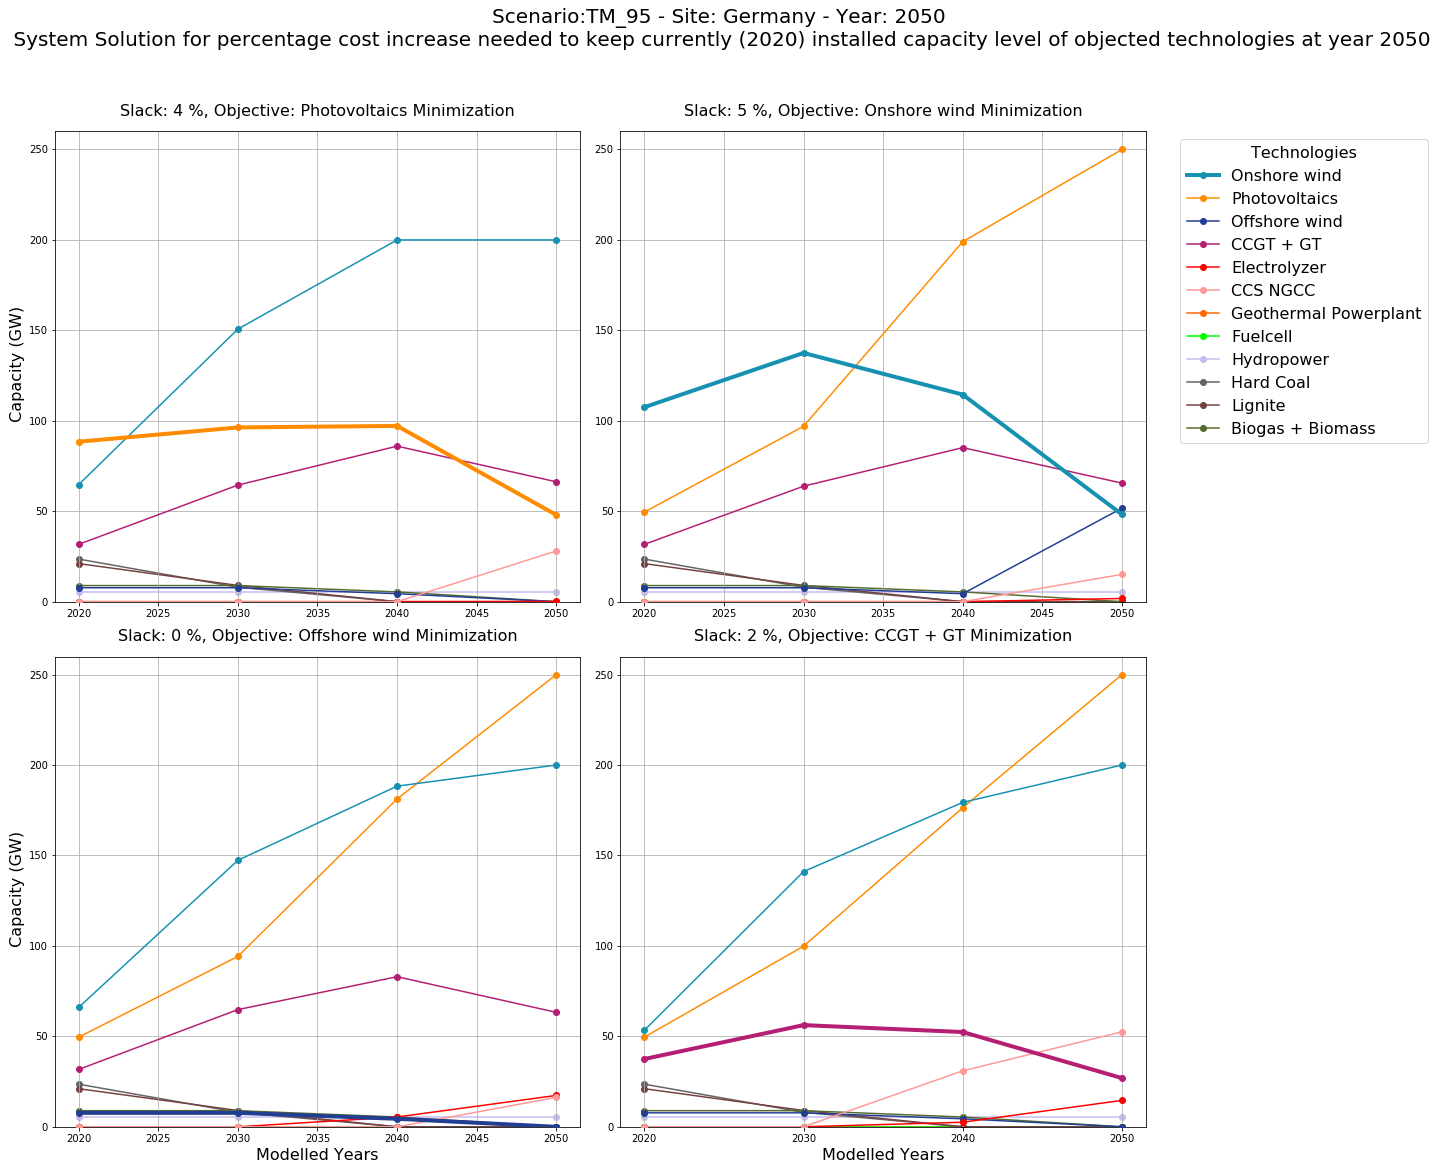

In [19]:
for s in sec:
    scenario_dfs=sce_dict[s]
    result_dir= result_dict[s]    
    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,15))
    axes=[ax1,ax2,ax3,ax4]
    if s=='EL_95':
        limiting_slack=[5,7.5,0,4]
    elif s=='EL_80':
        limiting_slack=[4,7.5,0,7.5]
    elif s=='TM_95':
        limiting_slack=[4,5,0,2]
    for j,df in enumerate(scenario_dfs):
        ax=axes[j]
        objective_info= df.obj.values[0]
        changing_cap=changing_cap_raw.copy()
        changing_cap.remove(objective_info)
        df_cap_plot= df.copy(deep=True)
        df_cap_plot = df_cap_plot[df_cap_plot.Process.isin(changing_cap)]
        df_cap_plot_2= df.copy(deep=True)
        df_cap_plot_2 = df_cap_plot_2[df_cap_plot_2.Process.isin(constant_cap)]
        sl=limiting_slack[j]

        df_line_plot= df[df.Process == objective_info].copy(deep=True)
        data1 = df_line_plot[df_line_plot.Objective=='Min']

        line1, = ax.plot('Stf', 'Capacities', data=data1[data1.Slack == sl], color=to_color(objective_info),
                             label=objective_info, marker='o',linewidth=4,zorder=10)

        for item in changing_cap:

            df_line_plot_o=df_cap_plot[df_cap_plot.Process == item].copy(deep=True)
            data1_o = df_line_plot_o[df_line_plot_o.Objective=='Min']


            line2, = ax.plot('Stf', 'Capacities', data=data1_o[data1_o.Slack == sl], color=to_color(item),
                     label=item, marker='o',zorder=5)

        for item in constant_cap:

            df_line_plot_o2=df_cap_plot_2[df_cap_plot_2.Process == item].copy(deep=True)
            data1_o2 = df_line_plot_o2[df_line_plot_o2.Objective=='Min']


            line3, = ax.plot('Stf', 'Capacities', data=data1_o2[data1_o2.Slack == sl], color=to_color(item),
                     label=item, marker='o',zorder=1)


        ax.grid()
        ax.set_title('Slack: '+str(sl)+' %'+ ', Objective: '+objective_info+' Minimization', fontsize=16, pad=15)
        plt.xticks(list(data1.Stf.unique()), list(str(int(x)) for x in list(data1.Stf.unique())))
        ax.set_ylim(0,260000)
        ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x) // 1000, ',')))

    ax3.set_xlabel('Modelled Years', fontsize=16)
    ax4.set_xlabel('Modelled Years', fontsize=16)
    ax1.set_ylabel(' Capacity (GW)', fontsize=16)
    ax3.set_ylabel(' Capacity (GW)', fontsize=16)

    ax2.legend(title='Technologies',fontsize=16,title_fontsize=16,bbox_to_anchor=(1.05, 1), loc='upper left')
    fig_filename = os.path.join(result_dir,'objected_todays_level_all.png')
    plt.suptitle('Scenario:'+s+ ' - Site: Germany' + ' - Year: '+ str(year)+'\n System Solution for percentage cost increase needed to keep currently (2020) installed capacity level of objected technologies at year 2050' ,x=0.5,y=1.08,fontsize=20 )
    fig.savefig(fig_filename, bbox_inches='tight')

        #plt.close(fig)


### Base Capacity slack

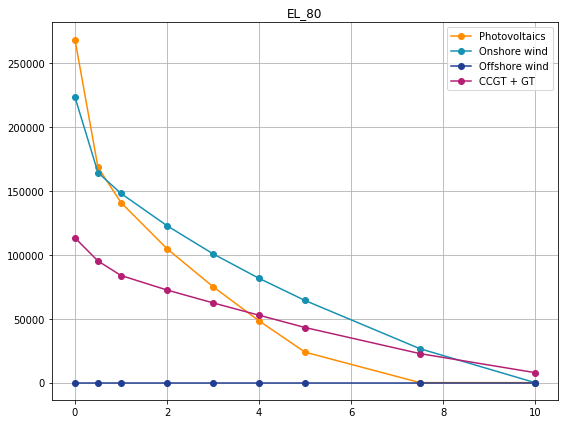

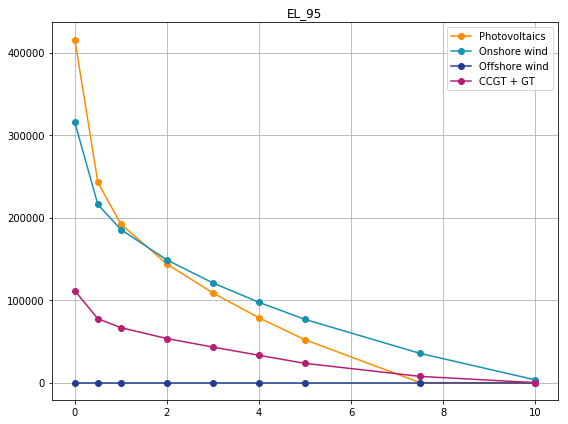

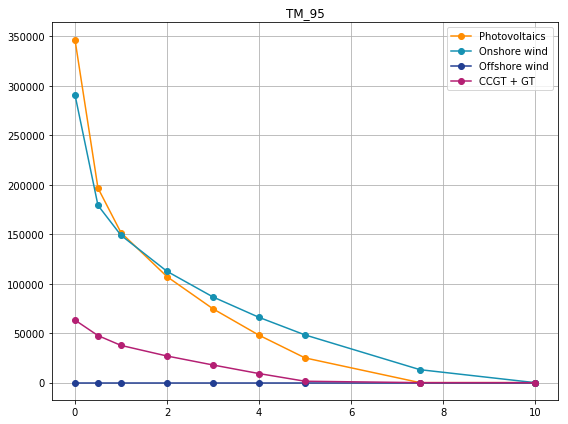

In [20]:
for s in sec:
    fig,ax=plt.subplots(figsize=(8,6))
    scenario_dfs=sce_dict[s]
    result_dir= result_dict[s]
    for j,df in enumerate(scenario_dfs):
        
        objective_info= df.obj.values[0]
        df_base= df[(df.Process == objective_info) & (df.Stf==2050)].copy(deep=True)
        df_base= df_base[df_base.Objective=='Min']
        ax.plot('Slack', 'Capacities', data=df_base, color=to_color(objective_info),
                              label=objective_info,marker='o')
        ax.legend()
        ax.set_title(s)
        ax.grid(True)
    result_dir= os.path.join(root,'result_plots','capacities')
    fig_filename = os.path.join(result_dir,s+'minimization_limits.png')
    fig.savefig(fig_filename, bbox_inches='tight')


for s in sec:
    scenario_dfs=sce_dict[s]
    result_dir= result_dict[s]
    onshore_base= 53405
    pv_base=49550
    offshore_base=7709
    gas_base= 31712
    base_val=[pv_base,onshore_base,offshore_base,gas_base]
    for j,df in enumerate(scenario_dfs):
        fig,ax=plt.subplots(figsize=(4,4))
        objective_info= df.obj.values[0]
        base=base_val[j]
        df_base= df[(df.Process == objective_info) & (df.Stf==2050)].copy(deep=True)
        df_base= df_base[df_base.Objective=='Min']
        ax.plot('Slack', 'Capacities', data=df_base, color=to_color(objective_info),
                              label=objective_info,marker='o')
        ax.axhline(y=base,color='firebrick',linestyle='-', zorder=10)
        ax.set_title(s+' - '+objective_info)
        ax.grid()


## SCENARIO COMP:

### FEASIBLE SPACE

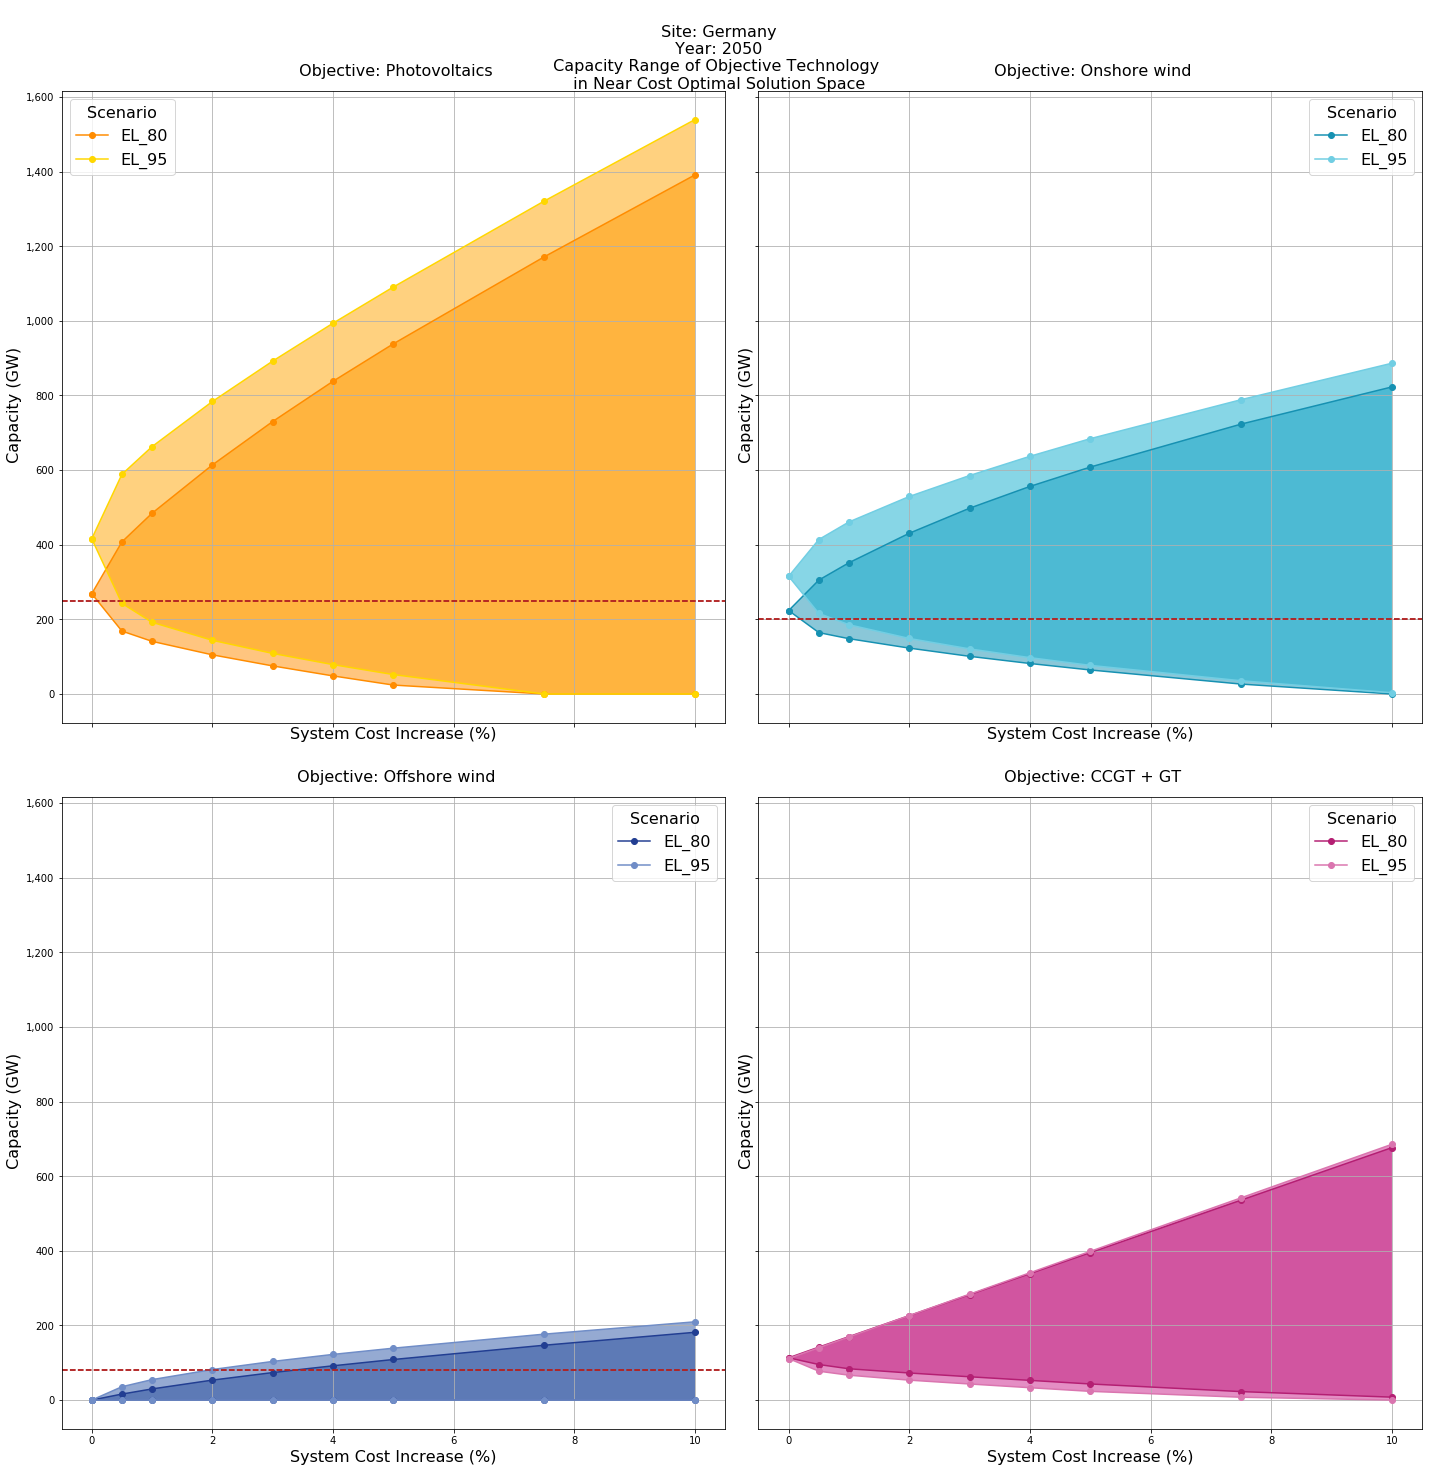

In [21]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,20), sharex=True,sharey=True)
result_dir= os.path.join(root,'result_plots')
for h,s in enumerate(['EL_80','EL_95']):
    scenario_dfs=sce_dict[s]
      
    axes=[ax1,ax2,ax3,ax4]
    for j,df in enumerate(scenario_dfs):
        ax=axes[j]
        objective_info= df.obj.values[0]

        year= 2050

        df_objective_plot= df[(df.Process == objective_info) & (df.Stf==year)].copy(deep=True)

        data1 = df_objective_plot[df_objective_plot.Objective=='Min']
        data2 = df_objective_plot[(df_objective_plot.Objective == 'Max')|(df_objective_plot.Slack==0)]


        line1, = ax.plot('Slack', 'Capacities', data=data1, color=to_shade(shade[objective_info][h*2+1]),
                              label=s,marker='o')
        line2, = ax.plot('Slack', 'Capacities', data=data2, color=to_shade(shade[objective_info][h*2+1]),
                            label='',marker='o')

        ax.fill_between(data1.Slack, data1.Capacities,
                                data2.Capacities,
                                facecolor=to_shade(shade[objective_info][h+1]), alpha=0.5)

        #ax.legend(loc='best', title='Objective')
        ax.grid(True)
        ax.set_xlabel('System Cost Increase (%)', fontsize=16)
        #plt.xticks(list(data1.Slack.unique()), list(str(int(x)) for x in list(data1.Stf.unique())))
        ax.set_ylabel(' Capacity (GW)', fontsize=16)
        ax.set_title( '\n Objective: '+objective_info, fontsize=16,pad=15)  #
        #ax.set_ylim(0, df.Capacities.max()+200000)
        ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x) // 1000, ',')))
        if objective_info=='Photovoltaics':
            ax.axhline(y=250000,color='firebrick',linestyle='--')
        elif objective_info=='Onshore wind':
            ax.axhline(y=200000,color='firebrick',linestyle='--')
        elif objective_info=='Offshore wind':
            ax.axhline(y=80000,color='firebrick',linestyle='--')
        ax.legend(loc='best', title='Scenario',fontsize=16,title_fontsize=16)

        #fig.savefig(fig_filename, bbox_inches='tight')
        #plt.close(fig)
plt.suptitle( '\n Site: Germany' + '\n Year: '+ str(year) + '\n Capacity Range of Objective Technology \n in Near Cost Optimal Solution Space',y=1.02,fontsize=16 )
             #        pad=15) 
fig_filename = os.path.join(result_dir,'objected-2050-allscen.png')
fig.savefig(fig_filename, bbox_inches='tight')



### SOLUTIONS GENERATON CAPACITIES- MIN COST GAS

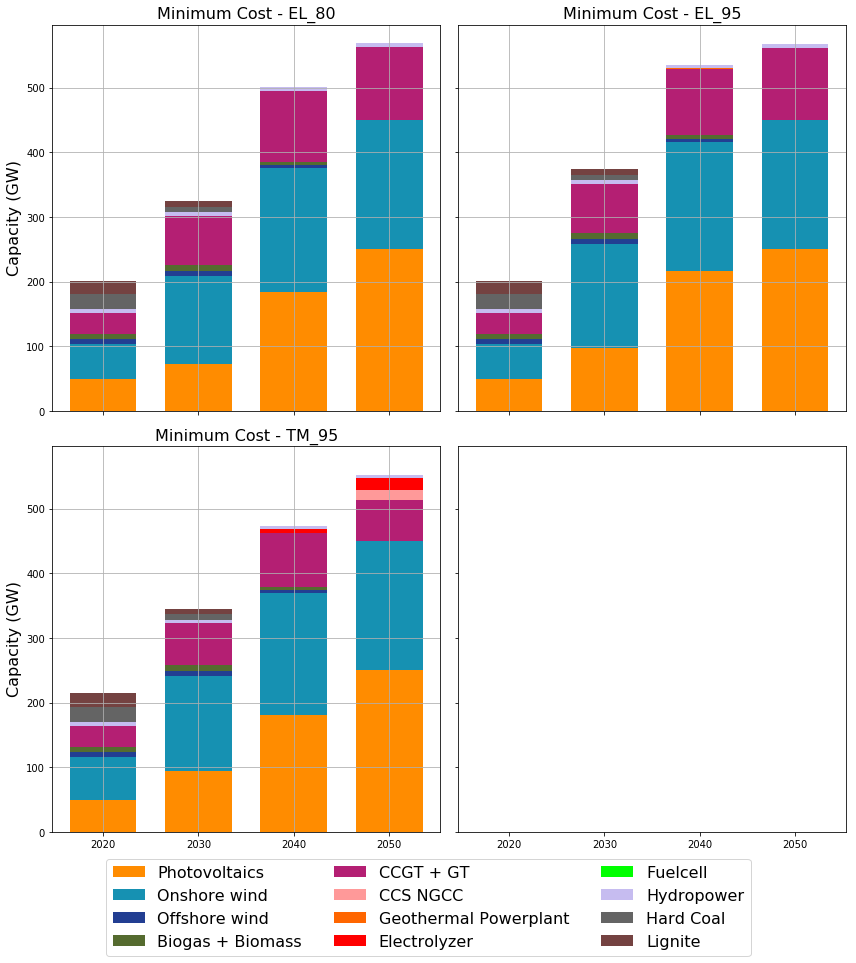

In [22]:
mpl.rcParams['figure.autolayout'] = True
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(12,12),sharey=True,sharex=True)  
axes=[ax1,ax2,ax3,ax4]
for i,s in enumerate(sec):
    ax=axes[i]
    scenario_dfs=sce_dict[s]
    pv=scenario_dfs[3].copy(deep=True)
    pv=pv[(pv.Objective=='Min')&(pv.Slack==0)]
    plot_list=['Photovoltaics', 'Onshore wind', 'Offshore wind',
           'Biogas + Biomass', 'CCGT + GT', 'CCS NGCC',
           'Geothermal Powerplant', 'Electrolyzer', 'Fuelcell', 'Hydropower',
           'Hard Coal', 'Lignite']

    ind=[1,2,3,4]
    barwidth = 0.7 
    bottom=pd.Series([0,0,0,0])
    for item in plot_list:
        ax.bar(ind,pv[pv.Process==item].Capacities,barwidth,bottom=bottom, color=to_color(item),label=item)
        bottom=bottom.reset_index(drop=True)
        a=pv[pv.Process==item].Capacities.reset_index(drop=True)
        bottom= bottom.add(a)
    ax.grid()

    ax.set_title('Minimum Cost - '+s,fontsize=16)
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(sorted(list(str(int(x)) for x in list(pv.Stf.unique()))))
    ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x)//1000, ',')))
handles, labels = ax3.get_legend_handles_labels()
fig.legend(handles[:12], labels[:12],bbox_to_anchor=(0,0,1,0.2), loc='lower center',
           ncol=3,  fontsize=16,bbox_transform=fig.transFigure,borderaxespad=-6)#mode="expand",
result_dir= os.path.join(root,'result_plots')
#ax3.set_xlabel('Modelled Years', fontsize=16)
#ax4.set_xlabel('Modelled Years', fontsize=16)
ax1.set_ylabel('Capacity (GW)', fontsize=16)
ax3.set_ylabel('Capacity (GW)', fontsize=16)

result_dir= os.path.join(root,'result_plots')
fig_filename = os.path.join(result_dir,'min_cost_sol.png')
fig.savefig(fig_filename,bbox_inches='tight')

### BAR PLOT

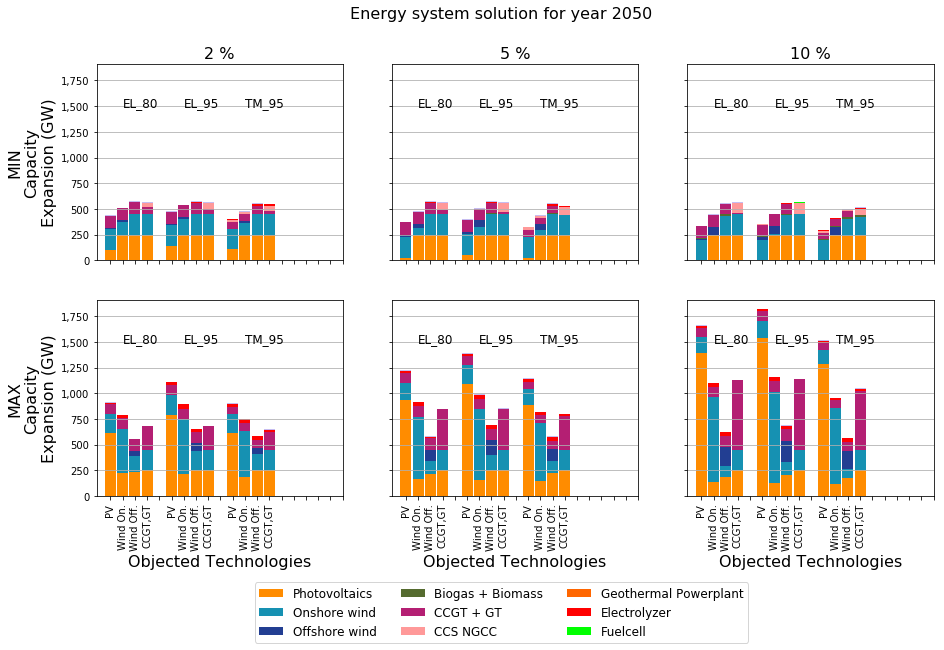

In [23]:
mpl.rcParams['figure.autolayout'] = False
fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2,3,figsize=(15,8),sharey=True,sharex=True)
axes_all=[ax1,ax2,ax3,ax4,ax5,ax6]
slack_to_plot=[2,5,10]
plot_list=['Photovoltaics', 'Onshore wind', 'Offshore wind',
       'Biogas + Biomass', 'CCGT + GT', 'CCS NGCC',
       'Geothermal Powerplant', 'Electrolyzer', 'Fuelcell', 'Hydropower']
k=len(slack_to_plot)
axis_name_list=[]
barwidth = 0.9 
indices= tuple(range(1,(4*5+1)))



for i,s in enumerate(sec):
    b=5*i
    ind=[b+1,b+2,b+3,b+4]

    scenario_dfs=sce_dict[s]
    ticks=['PV','Wind On.','Wind Off.','CCGT,GT','']
    axis_name_list.extend(ticks)
    for l,df in enumerate(scenario_dfs):
        x=ind[l]
        for j,sl in enumerate(slack_to_plot):
            
            df_min=df[(df.Objective=='Min')&(df.Slack==sl)&(df.Stf==2050)].copy(deep=True)
            df_max=df[(df.Objective=='Max')&(df.Slack==sl)&(df.Stf==2050)].copy(deep=True)
            ax_1= axes_all[j]
            ax_2= axes_all[j+3]

            bottom1=0
            bottom2=pd.Series([0])
            for item in plot_list:
                line1, = ax_1.bar(x,df_min[df_min.Process==item].Capacities,barwidth,bottom=bottom1, color=to_color(item),label=item)
                bottom1=bottom1+df_min[df_min.Process==item].Capacities.values[0]


                ax_2.bar(x,df_max[df_max.Process==item].Capacities,barwidth,bottom=bottom2, color=to_color(item),label=item)
                bottom2=bottom2.reset_index(drop=True)
                a=df_max[df_max.Process==item].Capacities.reset_index(drop=True)
                bottom2= bottom2.add(a)
 
for ax in axes_all:
    ax.grid(axis='y')
    ax.text(2,1500000,sec[0],fontsize =12)
    ax.text(7,1500000,sec[1],fontsize =12) 
    ax.text(12,1500000,sec[2],fontsize =12) 
    #ax.text(17,1500000,sec[3],fontsize =12) 
    ax.set_xticks(indices)
    ax.set_xticklabels(axis_name_list,rotation=90)
    ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x)//1000, ',')))
    handles, labels = ax.get_legend_handles_labels()
#ax2.legend(title='Technologies',fontsize=16,title_fontsize=16,bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.set_xlabel('Objected Technologies', fontsize=16)
ax5.set_xlabel('Objected Technologies', fontsize=16)
ax6.set_xlabel('Objected Technologies', fontsize=16)
ax1.set_ylabel('MIN\nCapacity\nExpansion (GW)', fontsize=16)
ax4.set_ylabel('MAX\nCapacity\nExpansion (GW)', fontsize=16)
ax1.set_title('2 %',fontsize=16)
ax2.set_title('5 %',fontsize=16)
ax3.set_title('10 %',fontsize=16)
plt.suptitle('Energy system solution for year 2050',fontsize=16 )#y=1.02,
handles, labels = ax3.get_legend_handles_labels()
fig.legend(handles[:9], labels[:9],bbox_to_anchor=(0,0,1,0.2), loc='lower center',
           ncol=3,  fontsize=12,bbox_transform=fig.transFigure,borderaxespad=-6)#mode="expand",

plt.subplots_adjust(bottom=0.13)
result_dir= os.path.join(root,'result_plots')
fig_filename = os.path.join(result_dir,'solutions-objective-slack-sce-min-max.png')
fig.savefig(fig_filename, bbox_inches='tight')

## READ COST FILES

EL_80 :  773995826403.5
EL_95 :  789168580367.2549
TM_95 :  687229284902.1864


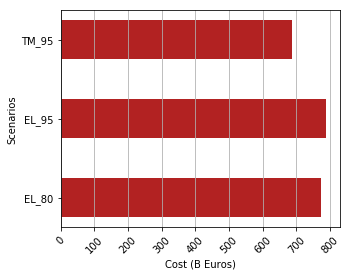

In [24]:
root_c=r'C:\Thesis\urbs\result'
sec=['EL_80','EL_95','TM_95']
pro_c='GAS'
rest_c= 'costs.xlsx'
sce_dict_c={}
result_dir_c= os.path.join(root_c,'result_plots')
df_cost_all=[]
for s in sec:
    path= os.path.join(root_c,s,pro_c,rest_c)
    with pd.ExcelFile(path) as xls:
        df_1=xls.parse('Costs').ffill()
        df_1['Sce']=s
        print(s,': ', df_1['Minimum Cost'].values[-1])
        df_cost_all.append(df_1)
    sce_dict_c[s]=round((df_1['Minimum Cost'].values[-1])/1000000,2)


fig,ax=plt.subplots(figsize=(5,4))
ax.barh(sec,[sce_dict_c['EL_80'],sce_dict_c['EL_95'],sce_dict_c['TM_95']],height=0.5, color='firebrick')
ax.grid(True,axis='x')
ax.set_xticklabels(ax.get_xticks(),rotation=45)
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x) // 1000, ',')))
ax.set_xlabel('Cost (B Euros)')
ax.set_ylabel ('Scenarios')

fig_filename = os.path.join(result_dir_c,'system_costs.png')
fig.savefig(fig_filename, bbox_inches='tight')


In [25]:
def tidy_cost(df):
    data_set = df.copy(deep=True)
    data_set = data_set.reset_index(drop=True)
    data_set = data_set.melt(id_vars=[ "Sce"], var_name=["Sol"], value_name="Cost")
    data_set.loc[(data_set.Sol == 'Minimum Cost'), 'Sol'] = 'Min-0.0'
    data_set[['Objective', 'Slack']] = data_set.Sol.str.split("-", expand=True)
    data_set.drop(columns='Sol', inplace=True)
    data_set['Slack'] = data_set.Slack.astype(float)
    data_set['Slack'] = data_set['Slack'] * 100
    return data_set

In [26]:
df_cost=pd.concat(df_cost_all)
df_c=df_cost[df_cost[ 'Unnamed: 1']=='Total Cost'].copy(deep=True)
df_c=df_c.reset_index(drop=True)
df_c.drop(columns=['Objective','Unnamed: 1'], inplace=True)
cost=tidy_cost(df_c)

## PRODUCTION AND EMISSION

Commodity sums_Min_Cost
Commodity sums0.005_Min

### Merges and saves comodity sum sheets in a seperate excel file
DO NOT RUN THIS

root=r'C:\Thesis\urbs\result'
sec=['EL_80','EL_95','TM_95']
add=['EL80','EL95','TM95']
tech_names=['PHOTOVOLTAICS','ONSHORE','OFFSHORE','GAS']
rest= 'scenario_'
tp='.xlsx'
sce_dict={'EL_80':[],'EL_95':[],'TM_80':[],'TM_95':[]}
result_dict={'EL_80':[],'EL_95':[],'TM_80':[],'TM_95':[]}
slack_list= ['0.005','0.01','0.02','0.03','0.04','0.05','0.075','0.1']
for i,s in enumerate(sec):

    for pro in tech_names:
        path= os.path.join(root,s,pro,rest+add[i]+tp)
        save_path= os.path.join(root,s,pro,'com_sum.xlsx')
        comsum_list=[]
        with pd.ExcelFile(path) as xls:
            df_1=xls.parse('Commodity sums_Min_Cost').ffill()
            df_1['Objective']='Min'
            df_1['Slack']=0
            df_1['Sce']=s
            comsum_list.append(df_1)
            for sl in slack_list:
                df_1=xls.parse('Commodity sums'+str(sl)+'_Min').ffill()
                df_1['Objective']='Min'
                df_1['Slack']=float(sl)*100
                df_1['Sce']=s
                comsum_list.append(df_1)
                df_2=xls.parse('Commodity sums'+str(sl)+'_Max').ffill()
                df_2['Objective']='Max'
                df_2['Slack']=float(sl)*100
                df_2['Sce']=s
                comsum_list.append(df_2)
        concat_list=[]
        for df in comsum_list:
            df=df.rename(columns={'Unnamed: 0': "Type", "Unnamed: 1": "Process"})
            data_set=df.copy(deep=True)
            data_set = data_set.melt(id_vars=["Type", "Process",'Objective','Slack','Sce'], var_name=["tag"], value_name="Capacities")

            data_set[['Stf', 'Site','Commodity']] = data_set.tag.str.split(".", expand=True)
            data_set.drop(columns=['tag','Site'], inplace=True)
            concat_list.append(data_set)
        merged=pd.concat(concat_list)
        if pro=='PHOTOVOLTAICS':
            merged['obj']='Photovoltaics'
        if pro=='ONSHORE':
            merged['obj']='Onshore wind'
        if pro=='OFFSHORE':
            merged['obj']='Offshore wind'
        if pro=='GAS':
            merged['obj']='CCGT + GT'

        merged.to_excel(save_path, sheet_name='com_sum',index=False)  

### Read com_sum files

In [27]:
def merge_commodities(data):
      
    
    data.loc[(data.Process == 'Photovoltaics') | (data.Process == 'Photovoltaics-30') | (
        data.Process == 'Photovoltaics-40') | ( data.Process == 'Photovoltaics-50'),'Process'] = 'Photovoltaics'
    
    data.loc[(data.Process == 'Onshore wind') | (data.Process == 'Onshore wind-30') | (
                      data.Process == 'Onshore wind-40') | (data.Process == 'Onshore wind-50'),'Process'] = 'Onshore wind'
    
    data.loc[(data.Process == 'Offshore wind') | (data.Process == 'Offshore wind-40') | (
                      data.Process == 'Offshore wind-50'),'Process'] = 'Offshore wind'
            
    data.loc[(data.Process == 'CCGT') | (data.Process == 'CCGT-30') | (data.Process == 'CCGT-40') | (
                    data.Process == 'CCGT-50')|(data.Process == 'Gas Turbine') | (data.Process == 'Gas Turbine-30') | (
                    data.Process == 'Gas Turbine-40')| (data.Process == 'Gas Turbine-50'),'Process'] = 'CCGT + GT'
    
    data.loc[(data.Process == 'Hard Coal') | ( data.Process == 'Hard Coal-30'),'Process'] = 'Hard Coal'
    
    data.loc[(data.Process == 'Lignite') | ( data.Process == 'Lignite-30'),'Process'] = 'Lignite'
    
    data.loc[(data.Process == 'Biogas') | ( data.Process == 'Biogas-40')| (
         data.Process == 'Biomass'),'Process'] = 'Biogas + Biomass'
    group_df=data.groupby(by=['Process','Objective','Slack','Stf','Commodity','obj','Sce'],as_index=False).sum()
    try:
        group_df.drop(columns=['Type'], inplace=True)
    except: pass
    return group_df

In [28]:
root=r'C:\Thesis\urbs\result'
sec=['EL_80','EL_95','TM_95']
tech_names=['PHOTOVOLTAICS','ONSHORE','OFFSHORE','GAS']
rest= 'com_sum.xlsx'
sce_dict_elec={'EL_80':[],'EL_95':[],'TM_80':[],'TM_95':[]}
sce_dict_co2={'EL_80':[],'EL_95':[],'TM_80':[],'TM_95':[]}
result_dict={'EL_80':[],'EL_95':[],'TM_80':[],'TM_95':[]}
list_co2=[]
list_elec=[]
for s in sec:
    result_dict[s]=os.path.join(root,'result_plots',s)

    for pro in tech_names:
        path= os.path.join(root,s,pro,rest)
        with pd.ExcelFile(path) as xls:
            df_1=xls.parse('com_sum')
            created_elec=df_1[(df_1.Type=='Created')&(df_1.Commodity=='Elec')].copy(deep=True)
            created_elec=merge_commodities(created_elec)
            created_co2=df_1[(df_1.Type=='Created')&(df_1.Commodity=='CO2')].copy(deep=True)
            created_co2=merge_commodities(created_co2)
            list_elec.append(created_elec)
            list_co2.append(created_co2)
elec=pd.concat(list_elec)
co2=pd.concat(list_co2)

### CO2 mitigation comparison w DENA

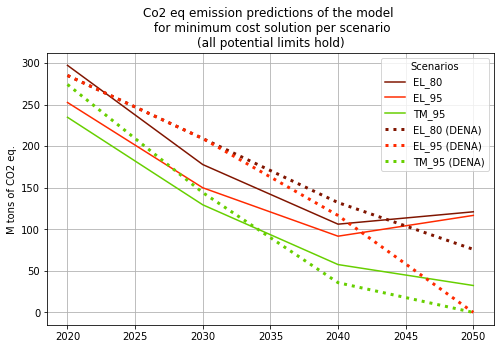

In [29]:
emm= co2[co2.Process.isin(['Biogas + Biomass', 'CCGT + GT', 'CCS NGCC', 'Dummy Gas-CCGT',
       'Dummy Gas-GT', 'Electrolyzer', 'Fuelcell',
       'Geothermal Powerplant', 'Hard Coal', 'Hydropower', 'Lignite',
       'Offshore wind',  'Onshore wind',
       'Photovoltaics', 'Slack PP'])]
emm= emm.groupby(['Objective','Slack','Stf','obj','Sce'],as_index=False).agg({ 'Capacities': 'sum'} )

fig,ax=plt.subplots(figsize=(8,5))
for s in sec:
    plot= emm[(emm.Slack==0)&(emm.obj=='CCGT + GT')&(emm.Sce==s)].copy(deep=True)
    plot['Capacities']=plot['Capacities']/1000000
    ax.plot('Stf','Capacities',data=plot,label=s,color=to_color(s))
el8=[285.044,209.224,132.141,75.878]
el9= [285.044,209.224,116.616,0.0]
tm9=[274.234,144.154,35.803,0.0]
years=[2020,2030,2040,2050]
ax.plot(years,el8,linestyle=':',label='EL_80 (DENA)',color=to_color('EL_80'),linewidth=3)
ax.plot(years,el9,linestyle=':',label='EL_95 (DENA)',color=to_color('EL_95'),linewidth=3)
ax.plot(years,tm9,linestyle=':',label='TM_95 (DENA)',color=to_color('TM_95'),linewidth=3)
    
ax.legend(loc='best', title='Scenarios')
ax.grid(True)
ax.set_ylabel('M tons of CO2 eq.')
#ax.set_xlabel('Years')
ax.set_title('Co2 eq emission predictions of the model \n for minimum cost solution per scenario\n(all potential limits hold)')
result_dir= os.path.join(root,'result_plots')
fig_filename = os.path.join(result_dir,'co2_mitigation_comp.png')
#fig.savefig(fig_filename, bbox_inches='tight')

### REAL CO2 EMISSIONS

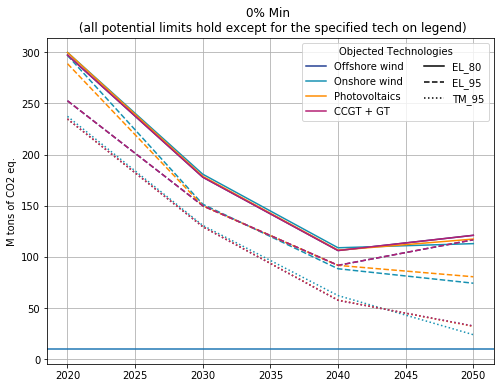

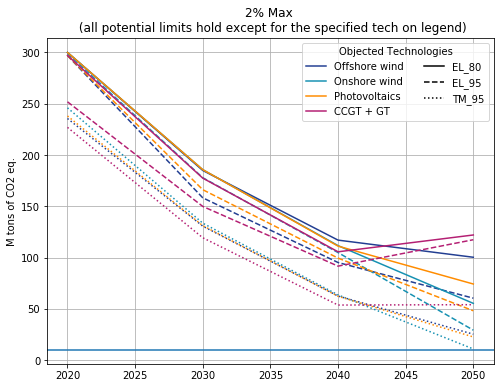

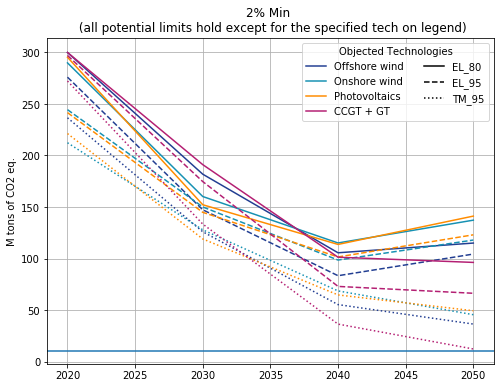

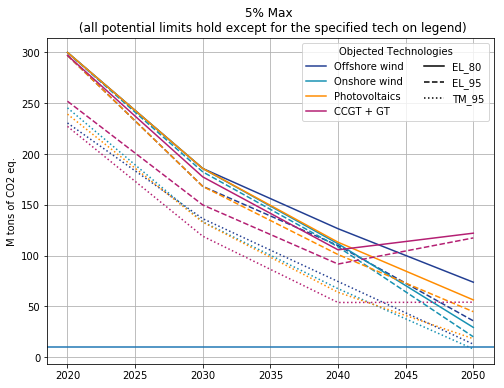

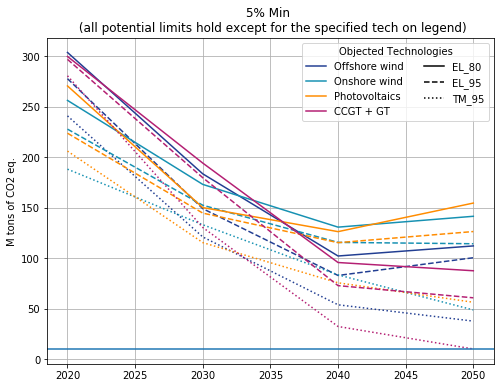

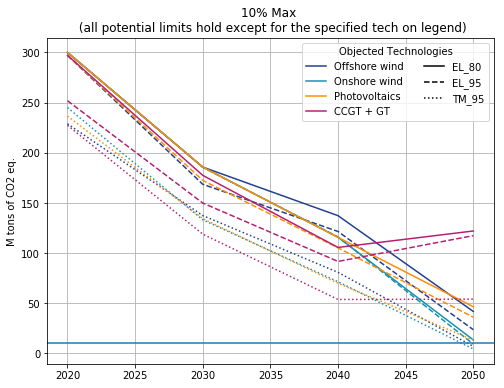

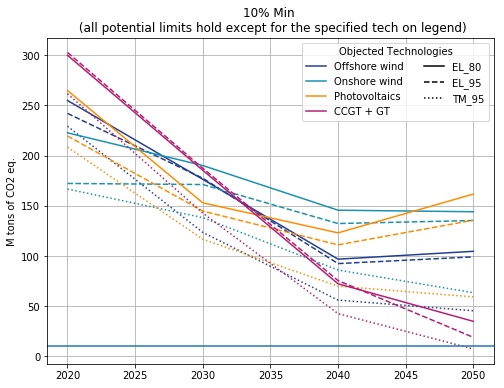

In [30]:
import matplotlib.lines as mlines
emm= co2[co2.Process.isin(['Biogas + Biomass', 'CCGT + GT', 'CCS NGCC', 'Dummy Gas-CCGT',
       'Dummy Gas-GT', 'Electrolyzer', 'Fuelcell',
       'Geothermal Powerplant', 'Hard Coal', 'Hydropower', 'Lignite',
       'Offshore wind',  'Onshore wind',
       'Photovoltaics', 'Slack PP'])]
emm= emm.groupby(['Objective','Slack','Stf','obj','Sce'],as_index=False).agg({ 'Capacities': 'sum'} )

lns=[]
for sl in [0,2,5,10]:
    for direc in ['Max','Min']:
        if (sl==0)&(direc=='Max'):
            continue
        fig,ax=plt.subplots(figsize=(8,6))
        for obj in obj_list:
            for s in sec:
                plot= emm[(emm.Slack==sl)&(emm.Objective==direc)&(emm.obj==obj)&(emm.Sce==s)].copy(deep=True)
                plot['Capacities']=plot['Capacities']/1000000
                if s=='EL_80':
                    line1,=ax.plot('Stf','Capacities',data=plot,label=obj,color=to_color(obj),linestyle='-')
                    lns.append(line1)
                if s=='EL_95':
                    ax.plot('Stf','Capacities',data=plot,color=to_color(obj),linestyle='--')
                if s=='TM_95':
                    ax.plot('Stf','Capacities',data=plot,color=to_color(obj),linestyle=':')
        
        e8 = ax.plot([], [], color='k',linestyle='-', label='EL_80')
        e9= ax.plot([], [], color='k',linestyle='--', label='EL_95')
        t9 = ax.plot([], [], color='k',linestyle=':', label='TM_95')
        #plt.legend(handles=[e8,e9,t9].extend(lns))
        ax.legend(['Offshore wind','_','_', 'Onshore wind','_','_', 'Photovoltaics','_','_','CCGT + GT','_','_','EL_80','EL_95','TM_95'],loc='best',ncol=2, title='Objected Technologies')
        ax.grid(True)
        ax.axhline(10)
        ax.set_ylabel('M tons of CO2 eq.')
        #ax.set_xlabel('Years')
        ax.set_title(str(sl)+'% '+direc+' \n (all potential limits hold except for the specified tech on legend)')
        #ax.text(2035,80,'TM_95',fontsize =12,bbox={'facecolor': 'white', 'alpha': 0.5})
        #ax.text(2035,110,'EL_80',fontsize =12,bbox={'facecolor': 'white', 'alpha': 0.5})
        #ax.text(2035,135,'EL_95',fontsize =12,bbox={'facecolor': 'white', 'alpha': 0.5})
        result_dir= os.path.join(root,'result_plots','co2')
        fig_filename = os.path.join(result_dir,str(sl)+direc+'.png')
        fig.savefig(fig_filename, bbox_inches='tight')

### co2 10% min  per scenario

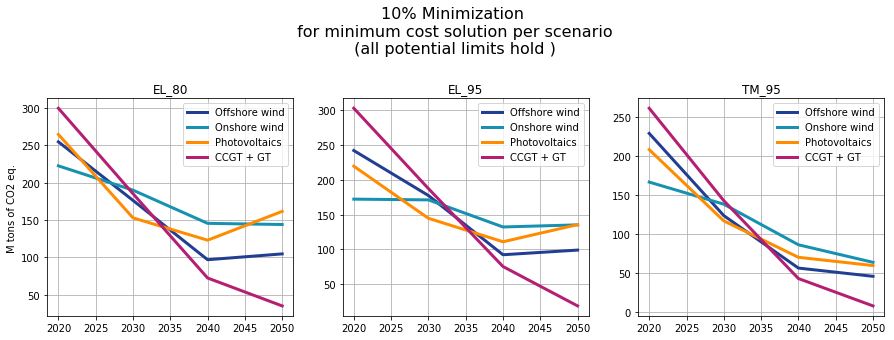

In [31]:
emm= co2[co2.Process.isin(['Biogas + Biomass', 'CCGT + GT', 'CCS NGCC', 'Dummy Gas-CCGT',
       'Dummy Gas-GT', 'Electrolyzer', 'Fuelcell',
       'Geothermal Powerplant', 'Hard Coal', 'Hydropower', 'Lignite',
       'Offshore wind',  'Onshore wind',
       'Photovoltaics', 'Slack PP'])]
emm= emm.groupby(['Objective','Slack','Stf','obj','Sce'],as_index=False).agg({ 'Capacities': 'sum'} )

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,4))
axes=[ax1,ax2,ax3]
for obj in obj_list:
    for i,s in enumerate(sec):
        ax=axes[i]
        plot= emm[(emm.Slack==10)&(emm.Objective=='Min')&(emm.obj==obj)&(emm.Sce==s)].copy(deep=True)
        plot['Capacities']=plot['Capacities']/1000000
        ax.plot('Stf','Capacities',data=plot,label=obj,color=to_color(obj),linewidth=3)
        ax.grid(True)
        
        ax.set_title(s)
        ax.legend(loc='best')

ax1.set_ylabel('M tons of CO2 eq.')

plt.suptitle( '10% Minimization\n for minimum cost solution per scenario\n (all potential limits hold )',y=1.2,fontsize=16 )
             #        pad=15) 
result_dir= os.path.join(root,'result_plots')
fig_filename = os.path.join(result_dir,'co2_10%-min.png')
#fig.savefig(fig_filename, bbox_inches='tight')

### co2 10% max  per scenario

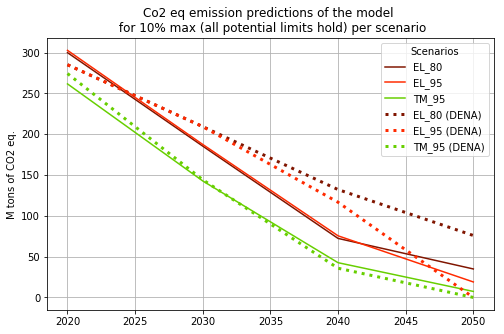

In [32]:
emm= co2[co2.Process.isin(['Biogas + Biomass', 'CCGT + GT', 'CCS NGCC', 'Dummy Gas-CCGT',
       'Dummy Gas-GT', 'Electrolyzer', 'Fuelcell',
       'Geothermal Powerplant', 'Hard Coal', 'Hydropower', 'Lignite',
       'Offshore wind',  'Onshore wind',
       'Photovoltaics', 'Slack PP'])]
emm= emm.groupby(['Objective','Slack','Stf','obj','Sce'],as_index=False).agg({ 'Capacities': 'sum'} )

fig,ax=plt.subplots(figsize=(8,5))
for s in sec:
    plot= emm[(emm.Slack==10)&(emm.Objective=='Min')&(emm.obj=='CCGT + GT')&(emm.Sce==s)].copy(deep=True)
    plot['Capacities']=plot['Capacities']/1000000
    ax.plot('Stf','Capacities',data=plot,label=s,color=to_color(s))
el8=[285.044,209.224,132.141,75.878]
el9= [285.044,209.224,116.616,0.0]
tm9=[274.234,144.154,35.803,0.0]
years=[2020,2030,2040,2050]
ax.plot(years,el8,linestyle=':',label='EL_80 (DENA)',color=to_color('EL_80'),linewidth=3)
ax.plot(years,el9,linestyle=':',label='EL_95 (DENA)',color=to_color('EL_95'),linewidth=3)
ax.plot(years,tm9,linestyle=':',label='TM_95 (DENA)',color=to_color('TM_95'),linewidth=3)
    
ax.legend(loc='best', title='Scenarios')
ax.grid()
ax.set_ylabel('M tons of CO2 eq.')
#ax.set_xlabel('Years')
ax.set_title('Co2 eq emission predictions of the model \n for 10% max (all potential limits hold) per scenario')
result_dir= os.path.join(root,'result_plots')
fig_filename = os.path.join(result_dir,'co2_mitigation_10%min_comp.png')
#fig.savefig(fig_filename, bbox_inches='tight')

## Specific Emissions and Specific Costs

In [33]:
plt.style.use( 'seaborn-talk')

In [34]:
production=elec.groupby(['Sce','obj','Slack','Objective']).sum()
emission=co2.groupby(['Sce','obj','Slack','Objective']).sum()
spec_cost=production.copy(deep=True).reset_index()
spec_cost['Cost']=1 
for s in sec:
    for direc in ['Min','Max']:
        for sl in [0,0.5, 1, 2, 3, 4, 5, 7.5, 10]:
            if (sl==0)& (direc=='Max'):
                continue
            spec_cost.loc[(spec_cost.Sce==s)&(spec_cost.Objective==direc)&(spec_cost.Slack==sl),
                          'Cost']=cost[(cost.Sce==s)&(cost.Objective==direc)&(cost.Slack==sl)]['Cost'].values[0]
spec_cost['spec_cost']=spec_cost['Cost']/spec_cost['Capacities']
spec_cost['cent']=spec_cost['spec_cost']/10
slack_list=list(elec.Slack.unique())
slack_list=sorted(slack_list)
label=['0','0.5','1','2','3','4','5','7.5','10','']
x_labels=label.copy()
x_labels.extend(label)
x_labels.extend(label)


### SPECIFIC COST

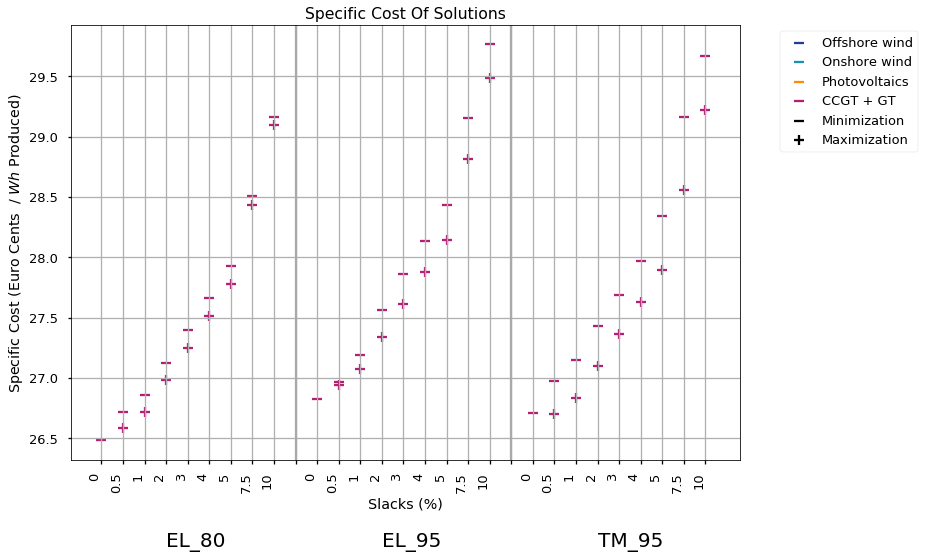

In [35]:

lns=[]
fig,ax=plt.subplots(figsize=(12,8))
for j,sl in enumerate(slack_list):
    for direc in ['Max','Min']:
        if (sl==0)&(direc=='Max'):
            continue
        for obj in ['CCGT + GT']:
            for i,s in enumerate(sec):
                plot= spec_cost[(spec_cost.Slack==sl)&(spec_cost.Objective==direc)&(spec_cost.obj==obj)&(spec_cost.Sce==s)].copy(deep=True)
                plot['ind']=i*10+j+1
                if direc=='Max':marker="+"
                if direc=='Min':marker="_"
                ax.scatter('ind','cent',marker=marker,data=plot,color=to_color(obj),label='_d')
                if (sl==0)& (direc=='Min'):
                    ax.text(10*i+4,25.6,s,fontsize =20)
for obj in obj_list:
    a=ax.scatter([], [],marker='_',color=to_color(obj),label=obj)
b=ax.scatter([], [],marker='_',label='Minimization',color='k')
c=ax.scatter([], [],marker="+", label='Maximization',color='k')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#ax.legend(['Offshore wind','_','_', 'Onshore wind','_','_', 'Photovoltaics','_','_','CCGT + GT','_','_','Maximization','Minimization'],title='Objected \nTechnologies',bbox_to_anchor=(1.05, 1), loc='upper left')         
ax.grid(True)
ax.set_xticks(range(1,30,1))
ax.set_xticklabels(x_labels, rotation=90, horizontalalignment='right')
#print(ax.get_xticklabels)
ax.set_ylabel('Specific Cost (Euro Cents  / $Wh$ Produced)')
ax.set_xlabel('Slacks (%)')
ax.set_title('Specific Cost Of Solutions')
ax.axvline(10,color='darkgray')
ax.axvline(20,color='darkgray')
#ax.text(2035,110,'EL_80',fontsize =12,bbox={'facecolor': 'white', 'alpha': 0.5})
#ax.text(2035,135,'EL_95',fontsize =12,bbox={'facecolor': 'white', 'alpha': 0.5})
result_dir= os.path.join(root,'result_plots')
fig_filename = os.path.join(result_dir,'specific_cost.png')
fig.savefig(fig_filename, bbox_inches='tight')

### SPECIFIC EMMISIONS

In [36]:
specific_emission=emission/production
specific_emission.reset_index(inplace=True)
specific_emission.drop(columns=['Stf'],inplace=True)
specific_emission.rename(columns={"Capacities": "Spec_em"},inplace=True)

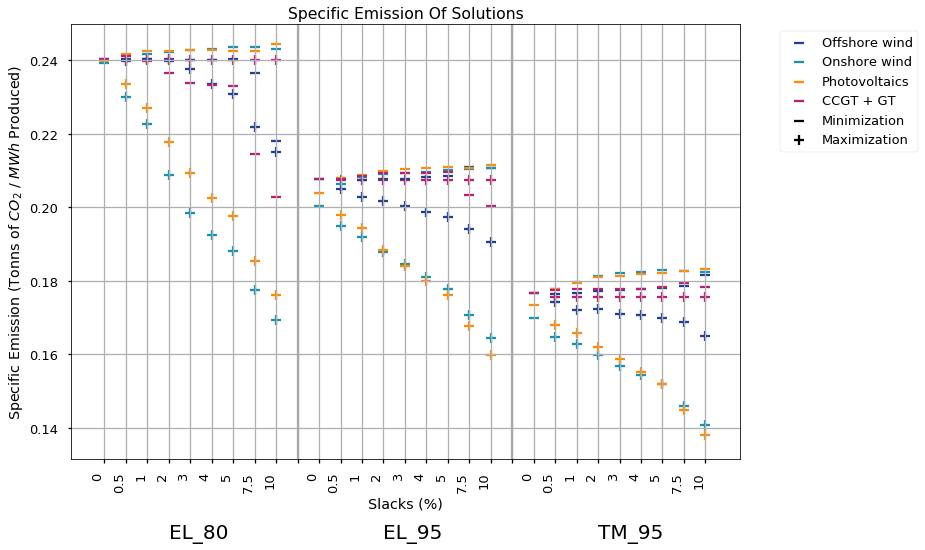

In [37]:
lns=[]
fig,ax=plt.subplots(figsize=(12,8))
for j,sl in enumerate(slack_list):
    for direc in ['Max','Min']:
        if (sl==0)&(direc=='Max'):
            continue
        for obj in obj_list:
            for i,s in enumerate(sec):
                plot= specific_emission[(specific_emission.Slack==sl)&(specific_emission.Objective==direc)&(specific_emission.obj==obj)&(specific_emission.Sce==s)].copy(deep=True)
                plot['ind']=i*10+j+1
                if direc=='Max':marker="+"
                if direc=='Min':marker="_"
                ax.scatter('ind','Spec_em',marker=marker,data=plot,color=to_color(obj),label='_d')
                if (sl==0)& (direc=='Min')&(obj=='Photovoltaics'):
                    ax.text(10*i+4,0.11,s,fontsize =20)
for obj in obj_list:
    a=ax.scatter([], [],marker='_',color=to_color(obj),label=obj)
b=ax.scatter([], [],marker='_',label='Minimization',color='k')
c=ax.scatter([], [],marker="+", label='Maximization',color='k')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#ax.legend(['Offshore wind','_','_', 'Onshore wind','_','_', 'Photovoltaics','_','_','CCGT + GT','_','_','Maximization','Minimization'],title='Objected \nTechnologies',bbox_to_anchor=(1.05, 1), loc='upper left')         
ax.grid(True)
ax.set_xticks(range(1,30,1))
ax.set_xticklabels(x_labels, rotation=90, horizontalalignment='right')
#print(ax.get_xticklabels)
ax.set_ylabel('Specific Emission (Tonns of $CO_2$ / $MWh$ Produced)')
ax.set_xlabel('Slacks (%)')
ax.set_title('Specific Emission Of Solutions')
ax.axvline(10,color='darkgray')
ax.axvline(20,color='darkgray')
#ax.text(2035,110,'EL_80',fontsize =12,bbox={'facecolor': 'white', 'alpha': 0.5})
#ax.text(2035,135,'EL_95',fontsize =12,bbox={'facecolor': 'white', 'alpha': 0.5})
result_dir= os.path.join(root,'result_plots','co2')
fig_filename = os.path.join(result_dir,'specific_emissions.png')
fig.savefig(fig_filename, bbox_inches='tight')

## PRODUCTION

In [38]:
prod_pivot=elec.copy(deep=True)#[df_capacities.Stf==2050]
solutions_prod=prod_pivot.groupby(['Sce','obj','Slack','Objective','Stf','Process'])['Capacities'].aggregate('mean').unstack()
solutions_prod.fillna(0,inplace=True)


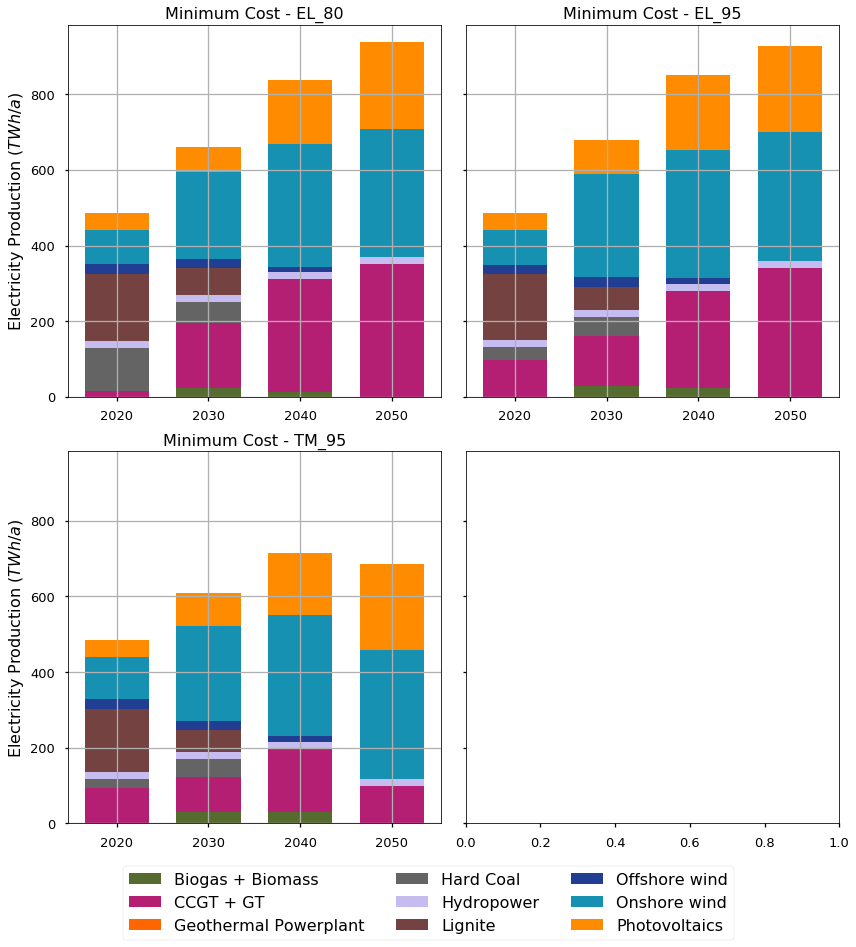

In [39]:
mpl.rcParams['figure.autolayout'] = True
plot_list=['Photovoltaics', 'Onshore wind', 'Offshore wind',
           'Biogas + Biomass', 
           'Geothermal Powerplant',  'Hydropower','CCGT + GT',
           'Hard Coal', 'Lignite']
prod= elec[elec.Process.isin(plot_list)]


fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(12,12),sharey=True)
axes=[ax1,ax2,ax3,ax4]
for i,s in enumerate(sec):
    ax=axes[i]
    plot= prod[(prod.Slack==0)&(prod.obj=='CCGT + GT')&(prod.Sce==s)].copy(deep=True)
    plot['Capacities']=plot.Capacities/1000000
    plot_list=plot.Process.unique()
    ind=[1,2,3,4]
    barwidth = 0.7 
    bottom=pd.Series([0,0,0,0])
    for item in plot_list:
        ax.bar(ind,plot[plot.Process==item].Capacities,barwidth,bottom=bottom, color=to_color(item),label=item)
        bottom=bottom.reset_index(drop=True)
        a=plot[plot.Process==item].Capacities.reset_index(drop=True)
        bottom= bottom.add(a)
    ax.grid()

    ax.set_title('Minimum Cost - '+s,fontsize=16)
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(sorted(list(str(int(x)) for x in list(pv.Stf.unique()))))
    #ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x)//1000, ',')))
#ax2.legend(title='Generation\nTechnologies',fontsize=16,title_fontsize=16,bbox_to_anchor=(1.05, 1), loc='upper left')
#ax3.set_xlabel('Modelled Years', fontsize=16)
#ax4.set_xlabel('Modelled Years', fontsize=16)
ax1.set_ylabel('Electricity Production ($TWh/a$)', fontsize=16)
ax3.set_ylabel('Electricity Production ($TWh/a$)', fontsize=16)
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles[:15], labels[:15],bbox_to_anchor=(0,0,1,0.2), loc='lower center',
           ncol=3,  fontsize=16,bbox_transform=fig.transFigure,borderaxespad=-5)#mode="expand",
result_dir= os.path.join(root,'result_plots')
fig_filename = os.path.join(result_dir,'min_cost_elecgeneration.png')
#fig.savefig(fig_filename, bbox_inches='tight')


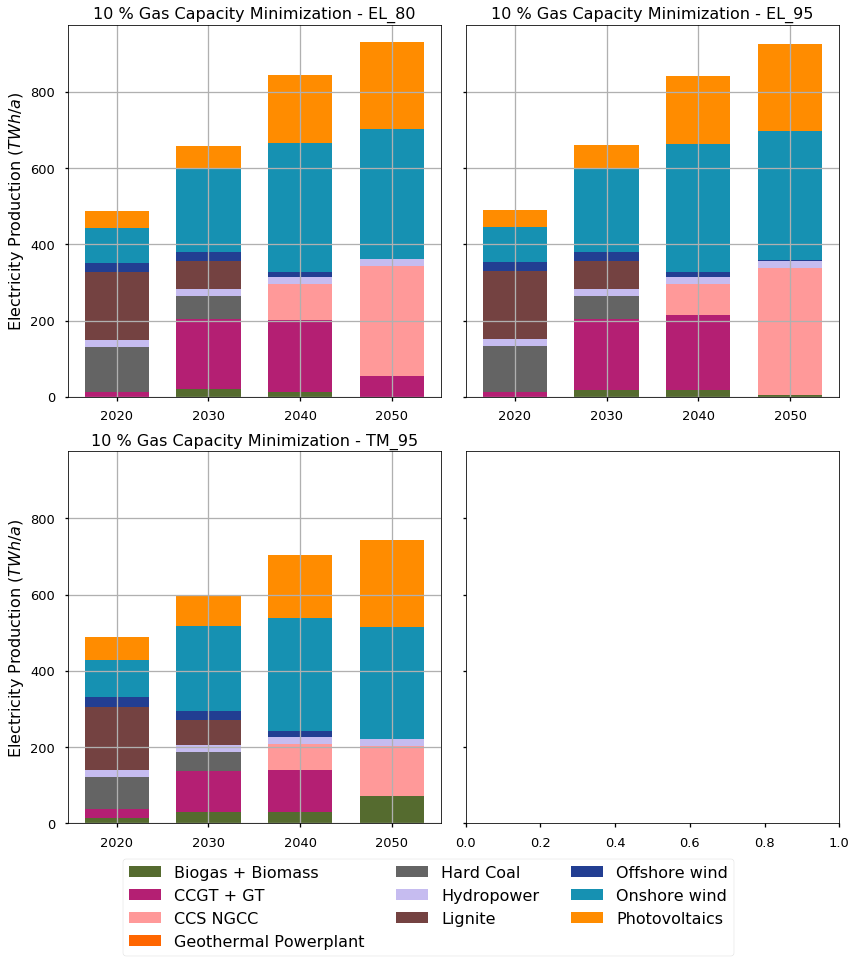

In [40]:
mpl.rcParams['figure.autolayout'] = True
plot_list=['Photovoltaics', 'Onshore wind', 'Offshore wind',
           'Biogas + Biomass',
           'Geothermal Powerplant',  'Hydropower','CCGT + GT', 'CCS NGCC',
           'Hard Coal', 'Lignite']
    


prod= elec[elec.Process.isin(plot_list)]


fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(12,12),sharey=True)
axes=[ax1,ax2,ax3,ax4]
for i,s in enumerate(sec):
    ax=axes[i]
    plot= prod[(prod.Slack==10)&(prod.Objective=='Min')&(prod.obj=='CCGT + GT')&(prod.Sce==s)].copy(deep=True)
    plot['Capacities']=plot.Capacities/1000000
    plot_list=plot.Process.unique()
    ind=[1,2,3,4]
    barwidth = 0.7 
    bottom=pd.Series([0,0,0,0])
    for item in plot_list:
        ax.bar(ind,plot[plot.Process==item].Capacities,barwidth,bottom=bottom, color=to_color(item),label=item)
        bottom=bottom.reset_index(drop=True)
        a=plot[plot.Process==item].Capacities.reset_index(drop=True)
        bottom= bottom.add(a)
    ax.grid()

    ax.set_title('10 % Gas Capacity Minimization - '+s,fontsize=16)
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(sorted(list(str(int(x)) for x in list(pv.Stf.unique()))))
    #ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x)//1000, ',')))
#ax2.legend(title='Generation\nTechnologies',fontsize=16,title_fontsize=16,bbox_to_anchor=(1.05, 1), loc='upper left')
#ax3.set_xlabel('Modelled Years', fontsize=16)
#ax4.set_xlabel('Modelled Years', fontsize=16)
ax1.set_ylabel('Electricity Production ($TWh/a$)', fontsize=16)
ax3.set_ylabel('Electricity Production ($TWh/a$)', fontsize=16)
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles[:12], labels[:12],bbox_to_anchor=(0,0,1,0.2), loc='lower center',
           ncol=3,  fontsize=16,bbox_transform=fig.transFigure,borderaxespad=-6)#mode="expand",
result_dir= os.path.join(root,'result_plots')
fig_filename = os.path.join(result_dir,'10-gas-min-elec.png')
#fig.savefig(fig_filename, bbox_inches='tight')


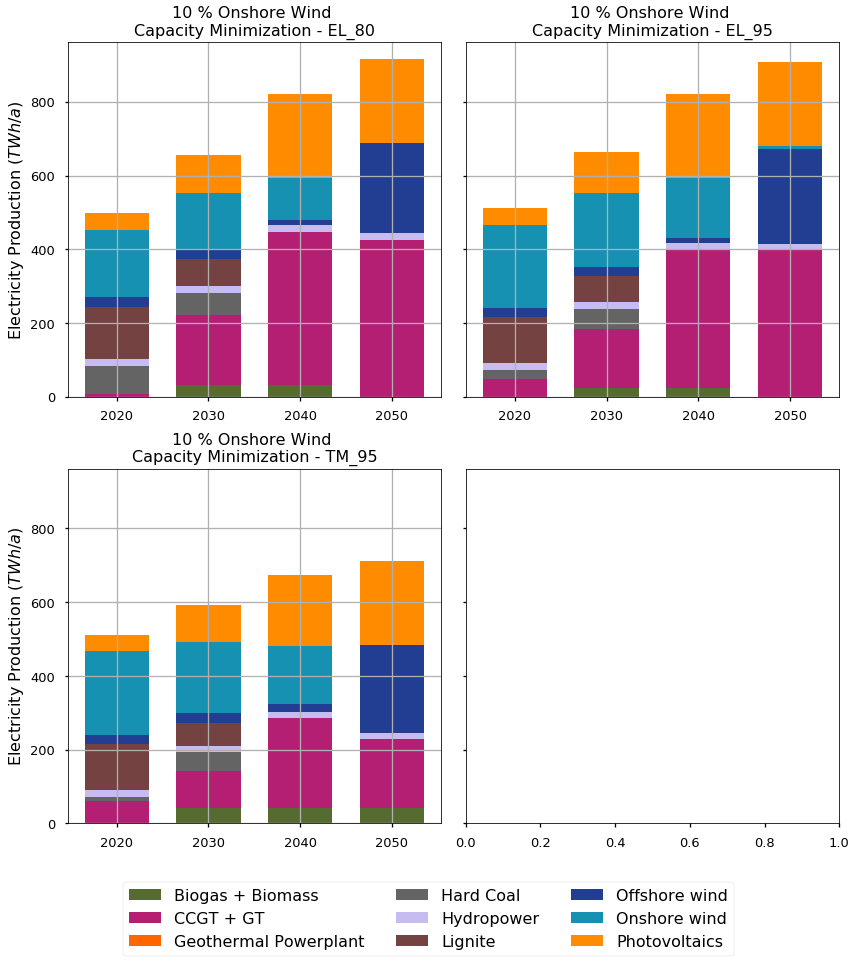

In [41]:
mpl.rcParams['figure.autolayout'] = True
plot_list=['Photovoltaics', 'Onshore wind', 'Offshore wind',
           'Biogas + Biomass',
           'Geothermal Powerplant',  'Hydropower','CCGT + GT', 'CCS NGCC',
           'Hard Coal', 'Lignite']
    


prod= elec[elec.Process.isin(plot_list)]


fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(12,12),sharey=True)
axes=[ax1,ax2,ax3,ax4]
for i,s in enumerate(sec):
    ax=axes[i]
    plot= prod[(prod.Slack==10)&(prod.Objective=='Min')&(prod.obj=='Onshore wind')&(prod.Sce==s)].copy(deep=True)
    plot['Capacities']=plot.Capacities/1000000
    plot_list=plot.Process.unique()
    ind=[1,2,3,4]
    barwidth = 0.7 
    bottom=pd.Series([0,0,0,0])
    for item in plot_list:
        ax.bar(ind,plot[plot.Process==item].Capacities,barwidth,bottom=bottom, color=to_color(item),label=item)
        bottom=bottom.reset_index(drop=True)
        a=plot[plot.Process==item].Capacities.reset_index(drop=True)
        bottom= bottom.add(a)
    ax.grid()

    ax.set_title('10 % Onshore Wind \nCapacity Minimization - '+s,fontsize=16)
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(sorted(list(str(int(x)) for x in list(pv.Stf.unique()))))
    #ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x)//1000, ',')))
#ax2.legend(title='Generation\nTechnologies',fontsize=16,title_fontsize=16,bbox_to_anchor=(1.05, 1), loc='upper left')
#ax3.set_xlabel('Modelled Years', fontsize=16)
#ax4.set_xlabel('Modelled Years', fontsize=16)
ax1.set_ylabel('Electricity Production ($TWh/a$)', fontsize=16)
ax3.set_ylabel('Electricity Production ($TWh/a$)', fontsize=16)
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles[:12], labels[:12],bbox_to_anchor=(0,0,1,0.2), loc='lower center',
           ncol=3,  fontsize=16,bbox_transform=fig.transFigure,borderaxespad=-6)#mode="expand",
result_dir= os.path.join(root,'result_plots')
fig_filename = os.path.join(result_dir,'10-onshore-min-elec.png')
#fig.savefig(fig_filename, bbox_inches='tight')


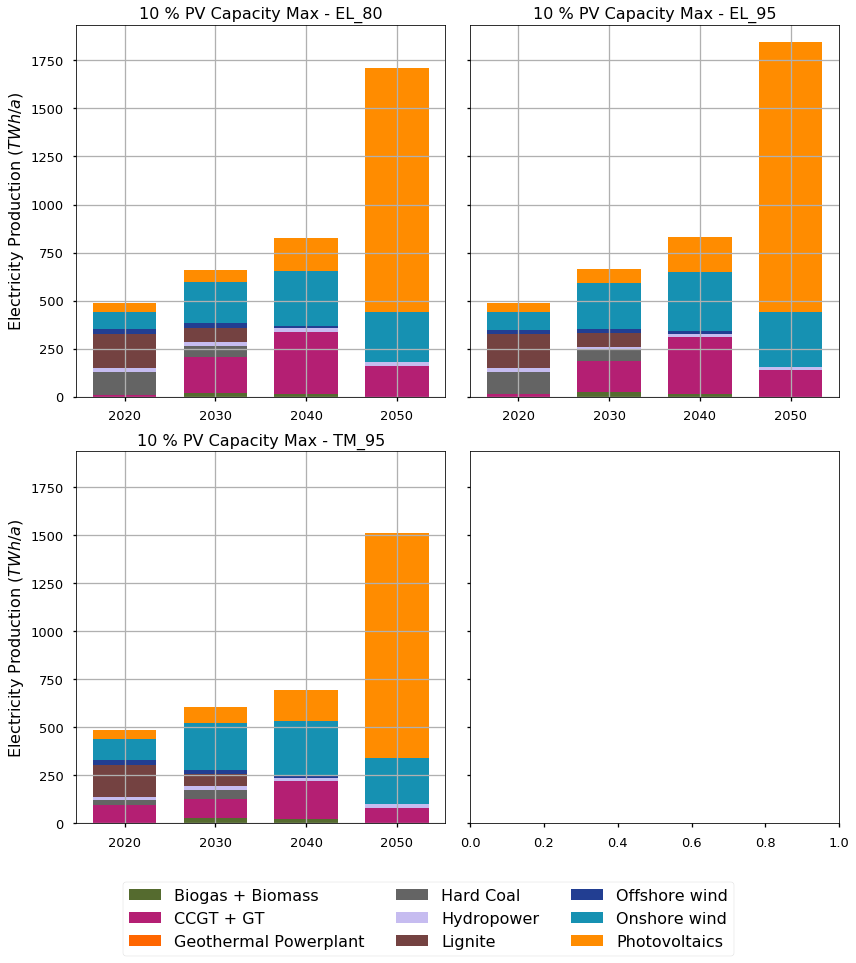

In [42]:
mpl.rcParams['figure.autolayout'] = True
plot_list=['Photovoltaics', 'Onshore wind', 'Offshore wind',
           'Biogas + Biomass',
           'Geothermal Powerplant',  'Hydropower','CCGT + GT', 'CCS NGCC',
           'Hard Coal', 'Lignite']
    


prod= elec[elec.Process.isin(plot_list)]


fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(12,12),sharey=True)
axes=[ax1,ax2,ax3,ax4]
for i,s in enumerate(sec):
    ax=axes[i]
    plot= prod[(prod.Slack==10)&(prod.Objective=='Max')&(prod.obj=='Photovoltaics')&(prod.Sce==s)].copy(deep=True)
    plot['Capacities']=plot.Capacities/1000000
    plot_list=plot.Process.unique()
    ind=[1,2,3,4]
    barwidth = 0.7 
    bottom=pd.Series([0,0,0,0])
    for item in plot_list:
        ax.bar(ind,plot[plot.Process==item].Capacities,barwidth,bottom=bottom, color=to_color(item),label=item)
        bottom=bottom.reset_index(drop=True)
        a=plot[plot.Process==item].Capacities.reset_index(drop=True)
        bottom= bottom.add(a)
    ax.grid()

    ax.set_title('10 % PV Capacity Max - '+s,fontsize=16)
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(sorted(list(str(int(x)) for x in list(pv.Stf.unique()))))
    #ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x)//1000, ',')))
#ax2.legend(title='Generation\nTechnologies',fontsize=16,title_fontsize=16,bbox_to_anchor=(1.05, 1), loc='upper left')
#ax3.set_xlabel('Modelled Years', fontsize=16)
#ax4.set_xlabel('Modelled Years', fontsize=16)
ax1.set_ylabel('Electricity Production ($TWh/a$)', fontsize=16)
ax3.set_ylabel('Electricity Production ($TWh/a$)', fontsize=16)
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles[:12], labels[:12],bbox_to_anchor=(0,0,1,0.2), loc='lower center',
           ncol=3,  fontsize=16,bbox_transform=fig.transFigure,borderaxespad=-6)#mode="expand",
result_dir= os.path.join(root,'result_plots')
fig_filename = os.path.join(result_dir,'10-pv-max-elec.png')
#fig.savefig(fig_filename, bbox_inches='tight')


## Demand and CALCULATIONS

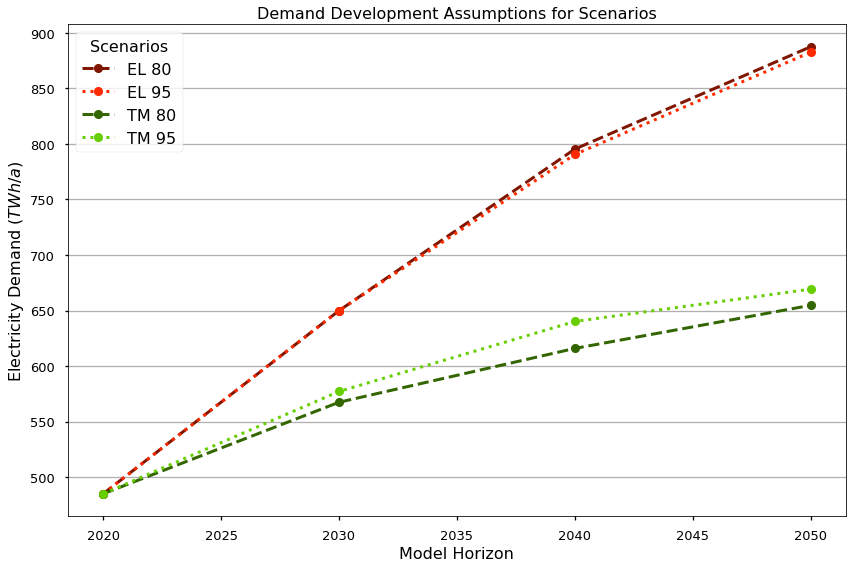

In [43]:
#Demand Plots
base=484983060.5000
EL_80=[base,base*1.34, base*1.64, base*1.83]
EL_80= [round(number/1000000,3) for number in EL_80]
EL_95=[base,base*1.34, base*1.63, base*1.82]
EL_95 = [round(number/1000000,3) for number in EL_95]
TM_80=[base,base*1.17, base*1.27, base*1.35]
TM_80 = [round(number/1000000,3) for number in TM_80]
TM_95=[base,base*1.19, base*1.32, base*1.38]
TM_95 = [round(number/1000000,3) for number in TM_95]
x=[2020,2030,2040,2050]
fig,ax=plt.subplots(figsize=(12, 8))
line1,=ax.plot(x,EL_80, color=to_color('EL_80'), label='EL 80',marker='o',linestyle='--',linewidth=3)
line2,=ax.plot(x,EL_95, color=to_color('EL_95'), label='EL 95',marker='o',linestyle=':',linewidth=3)
line3,=ax.plot(x,TM_80, color=to_color('TM_80'), label='TM 80',marker='o',linestyle='--',linewidth=3)
line4,=ax.plot(x,TM_95, color=to_color('TM_95'), label='TM 95',marker='o',linestyle=':',linewidth=3)
ax.grid(axis='y')
#ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x) // 1000, ',')))
ax.legend(loc='best', title='Scenarios', fontsize=16,title_fontsize=16)
ax.set_ylabel('Electricity Demand ($TWh/a$)', fontsize=16)
ax.set_xlabel('Model Horizon', fontsize=16)
ax.set_title('Demand Development Assumptions for Scenarios',fontsize=16)
result_dir= os.path.join(root,'result_plots')
fig_filename = os.path.join(result_dir,'demand.png')
fig.savefig(fig_filename, bbox_inches='tight')

In [44]:
EL_80=[base,base*1.34, base*1.64, base*1.83]
EL_95=[base,base*1.34, base*1.63, base*1.82]
TM_80=[base,base*1.17, base*1.27, base*1.35]
TM_95=[base,base*1.19, base*1.32, base*1.38]
print('2050 Demand for Electricity (MWh/a)')
print('EL_80: ',round(EL_80[3],2))
print('EL_95: ',round(EL_95[3],2))
print('TM_95: ',round(TM_95[3],2))

2050 Demand for Electricity (MWh/a)
EL_80:  887519000.72
EL_95:  882669170.11
TM_95:  669276623.49


In [45]:
EL_80=[base,base*1.34, base*1.64, base*1.83]
EL_95=[base,base*1.34, base*1.63, base*1.82]
TM_80=[base,base*1.17, base*1.27, base*1.35]
TM_95=[base,base*1.19, base*1.32, base*1.38]
EL_80_demand=pd.Series(EL_80).sum()
EL_95_demand=pd.Series(EL_95).sum()
TM_95_demand=pd.Series(TM_95).sum()
print('Total Demand for Electricity for Model Horizon (MWh)')
print('EL_80: ',round(EL_80_demand*10,2))
print('EL_95: ',round(EL_95_demand*10,2))
print('TM_95: ',round(TM_95_demand*10,2))

Total Demand for Electricity for Model Horizon (MWh)
EL_80:  28177515815.05
EL_95:  28080519202.95
TM_95:  23715671658.45


In [46]:
EL_80_c= 773995826403.5
EL_95_c =789168580367.2549
TM_95_c=  687229284902.1864
EL_80_d= 28177515815.05
EL_95_d= 28080519202.95
TM_95_d= 23715671658.45

print('Total System Cost / Electricity Demand for Model Horizon (Euros/MWh)')
print('EL_80: ',round(EL_80_c/EL_80_d,2))
print('EL_95: ',round(EL_95_c/EL_95_d,2))
print('TM_95: ',round(TM_95_c/TM_95_d,2))

Total System Cost / Electricity Demand for Model Horizon (Euros/MWh)
EL_80:  27.47
EL_95:  28.1
TM_95:  28.98


In [47]:
emm1990_total = 1248000000
#80  40% 55% 70% 80%
EL80=(((319/838)*(1-0.4)+(209/561)*(1-0.55)+(132/374)*(1-0.70)+ (76/250)*(1-0.80)) * 10 ) *emm1990_total
# 80  40% 55% 75% 95%
EL95 = (((319/838)*(1-0.4)+(209/561)*(1-0.55) + (114 / 305) * (1 - 0.75) + (0 / 64) * (1 - 0.95)) * 10) * emm1990_total  # Tonnes of CO2 eq
TM80= (((308/841)*(1-0.4)+(144/561)*(1-0.55)+(58/374)*(1-0.70) + (4/250)*(1-0.80)) * 10) *emm1990_total  # Tonnes of CO2 eq
TM95 = (((308/841)*(1-0.4)+(144/561)*(1-0.55)+(35/305)*(1-0.75) + (0/64)*(1-0.95)) * 10) *emm1990_total  # Tonnes of CO2 eq
   

In [48]:
print('CO2 budgets (Mtons of CO2 eq)')
print('EL_80: ',round(EL80/1000,2))
print('EL_95: ',round(EL95/1000,2))
print('TM_80: ',round(TM80/1000,2))
print('TM_95: ',round(TM95/1000,2))

CO2 budgets (Mtons of CO2 eq)
EL_80:  7022874.97
EL_95:  6108843.14
TM_80:  4804431.74
TM_95:  4541908.21


Text(0.5, 1.0, 'Budget Calculation for Scenarios')

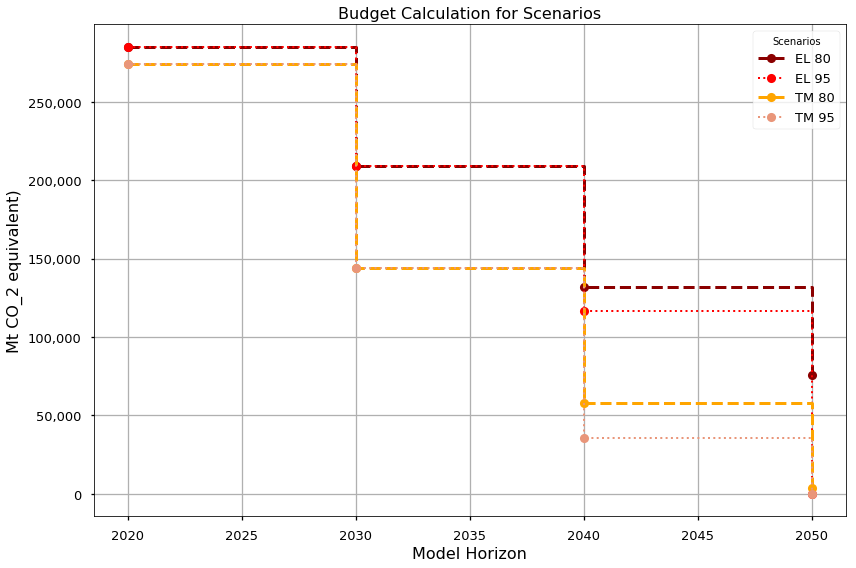

In [49]:
#Budget Plots
base=1248000000
EL_80=[(319/838)*(1-0.4)*base,(319/838)*(1-0.4)*base,
       (209/561)*(1-0.55)*base,(209/561)*(1-0.55)*base,
       (132/374)*(1-0.70)*base,(132/374)*(1-0.70)*base, (76/250)*(1-0.80)*base]
EL_95=[(319/838)*(1-0.4)*base,(319/838)*(1-0.4)*base,
       (209/561)*(1-0.55) *base,(209/561)*(1-0.55) *base,
       (114 / 305) * (1 - 0.75) *base, (114 / 305) * (1 - 0.75) *base, 
       (0 / 64) * (1 - 0.95)*base,]
TM_80=[(308/841)*(1-0.4)*base,(308/841)*(1-0.4)*base,(144/561)*(1-0.55)*base,
       (144/561)*(1-0.55)*base,(58/374)*(1-0.70)*base,(58/374)*(1-0.70)*base,
       (4/250)*(1-0.80)*base]
TM_95=[(308/841)*(1-0.4)*base,(308/841)*(1-0.4)*base,
       (144/561)*(1-0.55)*base,(144/561)*(1-0.55)*base,
       (35/305)*(1-0.75)*base,(35/305)*(1-0.75)*base, (0/64)*(1-0.95)*base,]
x=[2020,2030,2030,2040,2040,2050,2050]
fig,ax=plt.subplots(figsize=(12, 8))
line1,=ax.plot(x,EL_80, color='darkred', label='EL 80',marker='o',linestyle='--',linewidth=3,markevery=2)
line2,=ax.plot(x,EL_95, color='red', label='EL 95',marker='o',linestyle=':',linewidth=2,markevery=2)
line3,=ax.plot(x,TM_80, color='orange', label='TM 80',marker='o',linestyle='--',linewidth=3,markevery=2)
line4,=ax.plot(x,TM_95, color='darksalmon', label='TM 95',marker='o',linestyle=':',linewidth=2,markevery=2)
ax.grid()
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x) // 1000, ',')))
ax.legend(loc='best', title='Scenarios')
ax.set_ylabel('Mt CO_2 equivalent)', fontsize=16)
ax.set_xlabel('Model Horizon', fontsize=16)
ax.set_title('Budget Calculation for Scenarios',fontsize=16)
#ax.fill_between(x, TM_80, facecolor='darkblue', alpha=0.5)
#ax.fill_between(x, TM_95, facecolor='blue', alpha=0.3)

In [50]:
EL_80_mt = [round(number/1000000,3) for number in EL_80]
EL_95_mt = [round(number/1000000,3) for number in EL_95]
TM_80_mt = [round(number/1000000,3) for number in TM_80]
TM_95_mt = [round(number/1000000,3) for number in TM_95]

In [51]:
print(TM_95_mt)

[274.234, 274.234, 144.154, 144.154, 35.803, 35.803, 0.0]


In [52]:
emm1990_total = 1248000000 

In [53]:
budget = (((319/838)*(1-0.4)+(209/561)*(1-0.55)+(132/374)*(1-0.70)+ (76/250)*(1-0.80)) * 10 ) *emm1990_total  # Tonnes of CO2 eq
print(round(budget/1000000,3))

7022.875


## HEAT MAPS

### Heat Map 1

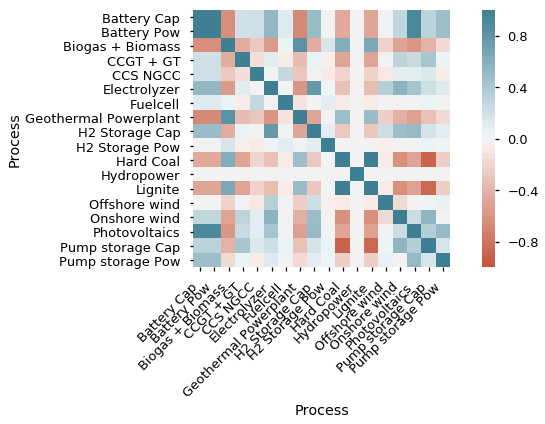

In [54]:
corrMatrix = solutions.corr(method='pearson')
corrMatrix.fillna(0,inplace=True)
corrMatrix.loc['Hydropower','Hydropower']=1
#corrMatrix
#corrMatrix
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corrMatrix, ax=ax,    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.subplots_adjust(bottom=0.13)
result_dir= os.path.join(root,'result_plots')
fig_filename = os.path.join(result_dir,'heatmap_1.png')
f.savefig(fig_filename, bbox_inches='tight')

### Heat Map 2

In [55]:
sns.set(color_codes=True, font_scale=1.2)
n_colors = 256 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]
def heatmap(x, y, size,color,size_scale = 600):
    plt.figure(figsize=(10,10))
    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x15 grid
    ax = plt.subplot(plot_grid[:,:-1]) 
    plt.style.use( 'seaborn-dark')
    # Mapping from column names to integer coordinates
    x_labels = [v for v in x.unique()]
    y_labels = [v for v in y.unique()]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, 
        c=color.apply(value_to_color),# Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

    col_x = [0]*len(palette) # Fixed x coordinate for the bars
    bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

    bar_height = bar_y[1] - bar_y[0]
    ax.barh(
        y=bar_y,
        width=[10]*len(palette), # Make bars 5 units wide
        left=col_x, # Make bars start at 0
        height=bar_height,
        color=palette,
        linewidth=0
    )
    ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
    ax.grid(False) # Hide grid
    ax.set_facecolor('white') # Make background white
    ax.set_xticks([]) # Remove horizontal ticks
    ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
    ax.yaxis.tick_right() # Show vertical ticks on the right 

TypeError: 'numpy.float64' object is not callable

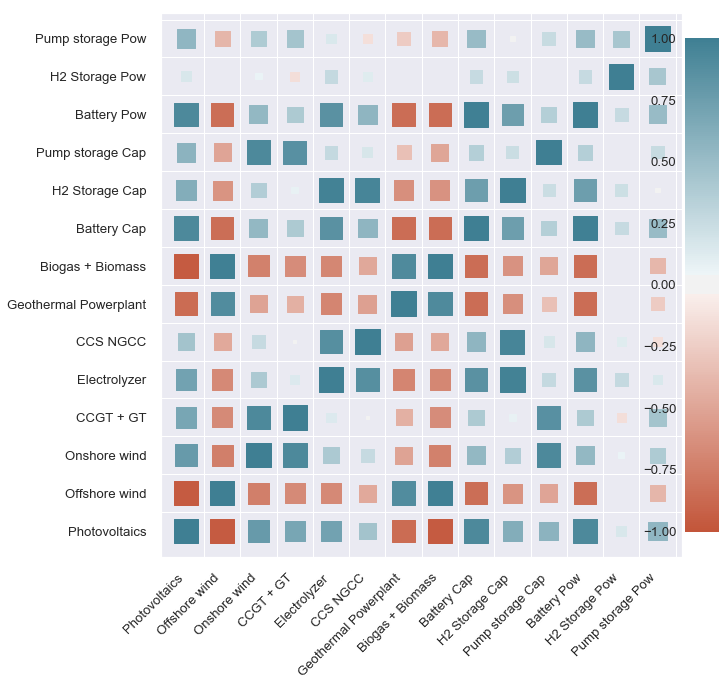

In [56]:
for sl in [0,10]:
    for direc in ['Min','Max']:
        for obj in ['Photovoltaics', 'Onshore wind', 'CCGT + GT']:
            if (sl==0)&(direc=='Max'):
                continue
            solutions_special=df_all[(df_all.Slack==sl)&(df_all.Objective==direc)&(df_all.obj==obj)].groupby(['Sce','obj','Slack','Objective','Stf','Process'])['Capacities'].aggregate('mean').unstack()
            data=solutions_special
            columns = ['Photovoltaics','Offshore wind', 'Onshore wind', 
                       'CCGT + GT','Electrolyzer', 'CCS NGCC', 
                    'Geothermal Powerplant','Biogas + Biomass',
                   'Battery Cap', 'H2 Storage Cap','Pump storage Cap', 
                       'Battery Pow', 'H2 Storage Pow','Pump storage Pow']
            corr = data[columns].corr()
            corr.index.rename('index',inplace=True)
            corr.fillna(0,inplace=True)
            corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
            corr.columns = ['x', 'y', 'value']
            heatmap(
                x=corr['x'],
                y=corr['y'],
                size=corr['value'].abs(),
                color=corr['value']
            )
            plt.subplots_adjust(bottom=0.13)
            result_dir= os.path.join(root,'result_plots','heat_maps')
            fig_filename = os.path.join(result_dir,'heat_map_'+str(sl)+direc+obj+'.png')
            plt.title(str(sl)+' % Slack ' +direc+'  obj: ' +obj+' Solution Correlations',x=-7)
            plt.savefig(fig_filename, bbox_inches='tight')
